# BFS Capstone Project

# Authors:

Ramesh. R

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

In this project, our task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, we need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

##### There are two data sets in this project: demographic and credit bureau data.  

##### 1) Demographic/application data:
This is obtained from the information provided by the applicants at the time of credit card application. It contains customer-level information on age, gender, income, marital status, etc.

##### 2) Credit bureau:
This is taken from the credit bureau and contains variables such as 'number of times 30 DPD or worse in last 3/6/12 months', 'outstanding balance', 'number of trades', etc.

##### Following tasks need to be perfomed as a part of this project:

1 ) Need to Perform WOE & IV analysis on the given datasets.
Apply WOE Transformation on the Demographics dataset and on the master dataset(combination of the two give datasets).

2 ) Build following models on WOE Transformed datasets:

    2.1) Demographic data model: Build a model to predict the likelihood of default using only the demographic data. This will give you a good idea about the predictive power of the application data. Obviously, the final model will use the credit bureau data as well, though this model is an important part of understanding the predictive power of application data.

    2.2) Model using both demographic and credit bureau data: Build a model to predict default using both the data sets. You may choose any type of model, though it is recommended to start with a logistic regression model first. Further, you can choose any type of model.


3) Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

4) We would be Assessing the financial benefit of our project.
We need to assess and explain the potential financial benefit of your project to the bank's management. From a P&L perspective, identify the metrics you are trying to optimise, explain (in simple terms) how the analysis and the model work, and share the results of the model. Finally, assess the financial benefit of the model and report the following:

    4.1) The implications of using the model for auto-approval or rejection, i.e., how many applicants on an average would the model automatically approve or reject

    4.2) The potential credit loss avoided with the help of the model

    4.3) Assumptions based on which the model was built

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Load demographic data

In [ ]:
demographic = pd.read_csv("Demographic data.csv")
demographic.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [ ]:
# lets check the dimensions of the data set
demographic.shape

(71295, 12)

In [ ]:
# lets check the dataset for numeric variables
demographic.describe()

Application ID           Age  No of dependents        Income  \
count    7.129500e+04  71295.000000      71292.000000  71295.000000   
mean     4.989601e+08     44.943039          2.865188     27.195224   
std      2.885905e+08      9.939211          1.382319     15.514626   
min      1.004500e+05     -3.000000          1.000000     -0.500000   
25%      2.483719e+08     37.000000          2.000000     14.000000   
50%      4.975698e+08     45.000000          3.000000     27.000000   
75%      7.495868e+08     53.000000          4.000000     40.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       71295.000000                     71295.000000   
mean                           34.563420                        33.958244   
std                            36.759758                        20.410824   
min                             6.000000                         3.000000   
25%                             6.000000                        16.000000   
50%                            11.000000                        34.000000   
75%                            60.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  
count     69870.000000  
mean          0.042193  
std           0.201030  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

Age & Income variables have negative values, we will treat them later

In [ ]:
# lets check the name of all the columns
print("Columns Name:",demographic.columns)

# Field "Profession " seems to have an extra space at the end, lets rename it
demographic = demographic.rename(columns = {"Profession " : "Profession"})

# lets rename 'Marital Status (at the time of application)' to Marital Status so that it can be used easily further
demographic = demographic.rename(columns = {"Marital Status (at the time of application)" : "Marital Status"})

print("\nColumns Names after renaming the columns:",demographic.columns)

Columns Name: Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

Columns Names after renaming the columns: Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')


In [ ]:
# checking number of unique entries for all the variables
print("No. of unique values - Column wise:\n",demographic.nunique())

No. of unique values - Column wise:
 Application ID                       71292
Age                                     53
Gender                                   2
Marital Status                           2
No of dependents                         5
Income                                  63
Education                                5
Profession                               3
Type of residence                        5
No of months in current residence      121
No of months in current company         83
Performance Tag                          2
dtype: int64


Looks like there are some duplicate application ids, lets check

In [ ]:
# lets display the duplicate records for application id
dup_app_id = demographic["Application ID"]
dup_customers = demographic[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

Application ID  Age Gender Marital Status  No of dependents  Income  \
5243        653287861   26      M        Married               3.0    25.0   
42637       653287861   40      M        Married               5.0    32.0   
48602       671989187   27      M        Married               2.0    35.0   
59022       671989187   57      M        Married               4.0     7.0   
24386       765011468   57      M         Single               4.0     4.5   
27586       765011468   38      M        Married               4.0     4.5   

          Education Profession    Type of residence  \
5243       Bachelor        SAL               Rented   
42637           Phd         SE               Rented   
48602  Professional        SAL  Living with Parents   
59022  Professional         SE               Rented   
24386      Bachelor        SAL     Company provided   
27586  Professional        SAL               Rented   

       No of months in current residence  No of months in current company  \
5243                                 112                               58   
42637                                 45                               46   
48602                                108                                7   
59022                                 42                                3   
24386                                  6                               56   
27586                                  6                               72   

       Performance Tag  
5243               0.0  
42637              1.0  
48602              0.0  
59022              0.0  
24386              0.0  
27586              0.0

### Observation:

Even though the application ids are same, the records are completely different, which means records belongs to different customers. We are assuming that the 2nd records here with the same application ids  are invalid entries and we are going to drop them.

In [ ]:
# lets drop the duplicates as discussed above
demographic.drop_duplicates("Application ID",inplace = True)

#check the dimensions of the dataset again
print ("Dimension of the dataset after dropping duplicates:",demographic.shape)

Dimension of the dataset after dropping duplicates: (71292, 12)


In [ ]:
# Check the column-wise info of the dataframe
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                       71292 non-null int64
Age                                  71292 non-null int64
Gender                               71290 non-null object
Marital Status                       71286 non-null object
No of dependents                     71289 non-null float64
Income                               71292 non-null float64
Education                            71173 non-null object
Profession                           71278 non-null object
Type of residence                    71284 non-null object
No of months in current residence    71292 non-null int64
No of months in current company      71292 non-null int64
Performance Tag                      69867 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


Above data shows that few fields have null values, lets check the details

In [ ]:
# lets check null values column wise
demographic.isnull().sum().sort_values(ascending = False)

Performance Tag                      1425
Education                             119
Profession                             14
Type of residence                       8
Marital Status                          6
No of dependents                        3
Gender                                  2
No of months in current company         0
No of months in current residence       0
Income                                  0
Age                                     0
Application ID                          0
dtype: int64

In [ ]:
# lets check the % of null values column wise
(round(100*(demographic.isnull().sum()/len(demographic.index)), 2)).sort_values(ascending = False)

Performance Tag                      2.00
Education                            0.17
Profession                           0.02
Type of residence                    0.01
Marital Status                       0.01
No of months in current company      0.00
No of months in current residence    0.00
Income                               0.00
No of dependents                     0.00
Gender                               0.00
Age                                  0.00
Application ID                       0.00
dtype: float64

Lets treat null values and missing values one by one

# Treat Null Values in the Demographic dataset

In [ ]:
# lets check variables except "Application ID"
cols = demographic.drop("Application ID",axis = 1)

print('\nUnique values in the datafram - column wise:')
for i in cols:
    print(i,demographic[i].unique(),'\n')


Unique values in the datafram - column wise:
Age [48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3] 

Gender ['F' 'M' nan] 

Marital Status ['Married' 'Single' nan] 

No of dependents [ 2.  4.  1.  5.  3. nan] 

Income [40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ] 

Education ['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan] 

Profession ['SAL' 'SE_PROF' 'SE' nan] 

Type of residence ['Rented' nan 'Owned' 'Others' 'Living with Parents' 'Company provided'] 

No of months in current residence [113 112 104  94 116 108 115 111  90  83 106  81 100 107  96  92 103  82
  97  80  77  76  86  54  93  98  64  58

### Observations:

1. Variable Age seems to have some invalid data (0 ,-3 and all values less than 18)
2. Variables Gender/Marital Status/No. Of dependents/Education/Profession/Type of residence/Performance Tag have few null values
3. Variable Income has a negative value

Lets correct them one by one

In [ ]:
# lets assume credit card can be given only to the customerers above 18 years of age, so, we will replace all the customers
# with age less than 18 to 18
demographic.loc[demographic.Age<18,'Age'] = 18
demographic.describe()

Application ID           Age  No of dependents        Income  \
count    7.129200e+04  71292.000000      71289.000000  71292.000000   
mean     4.989518e+08     44.949251          2.865126     27.195758   
std      2.885936e+08      9.917618          1.382312     15.514524   
min      1.004500e+05     18.000000          1.000000     -0.500000   
25%      2.483706e+08     37.000000          2.000000     14.000000   
50%      4.975655e+08     45.000000          3.000000     27.000000   
75%      7.495782e+08     53.000000          4.000000     40.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       71292.000000                     71292.000000   
mean                           34.563570                        33.957976   
std                            36.760345                        20.410377   
min                             6.000000                         3.000000   
25%                             6.000000                        16.000000   
50%                            11.000000                        34.000000   
75%                            60.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  
count     69867.000000  
mean          0.042180  
std           0.201001  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

Variable "Age" is corrected now

Describe Gender: count     71290
unique        2
top           M
freq      54453
Name: Gender, dtype: object

No. of Null Values: 2


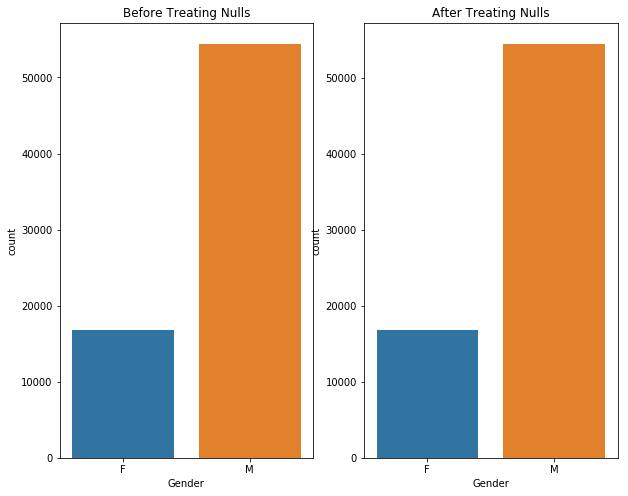

Describe Gender after treating null values: count     71292
unique        2
top           M
freq      54455
Name: Gender, dtype: object

No. of Null Values: 0


In [ ]:
print("Describe Gender:",demographic["Gender"].describe())

fig = plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.countplot(demographic["Gender"])
plt.title("Before Treating Nulls")

print("\nNo. of Null Values:",demographic["Gender"].isnull().sum())

# out of 71290 entries, 54453 are Male, which is approx 76% of the total entries
# lets imput null values with "M"
demographic["Gender"] = demographic["Gender"].replace(np.nan,"M")

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Gender"])
plt.title("After Treating Nulls")
plt.show()

print("Describe Gender after treating null values:",demographic["Gender"].describe())

print("\nNo. of Null Values:",demographic["Gender"].isnull().sum())

Describe Marital Status: count       71286
unique          2
top       Married
freq        60727
Name: Marital Status, dtype: object

No. of Null Values: 6


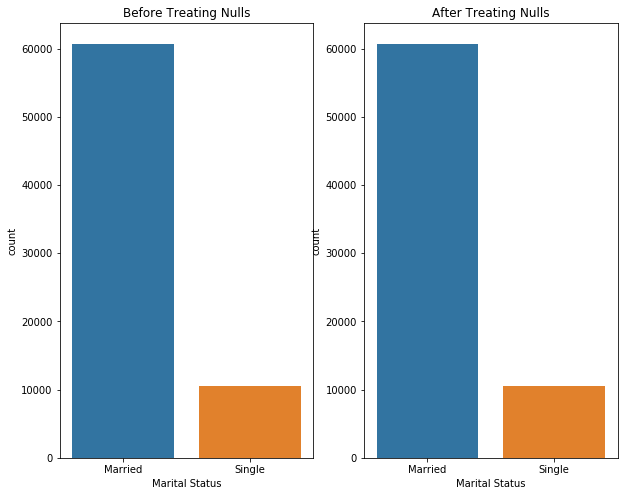

Describe Marital Status after treating null values:
 count       71292
unique          2
top       Married
freq        60733
Name: Marital Status, dtype: object

No. of Null Values: 0


In [ ]:
print("Describe Marital Status:",demographic["Marital Status"].describe())

print("\nNo. of Null Values:",demographic["Marital Status"].isnull().sum())

fig = plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.countplot(demographic["Marital Status"])
plt.title("Before Treating Nulls")

# out of 71286 entries, 60727 are Married, lets impute null values with "Married"
demographic["Marital Status"] = demographic["Marital Status"].replace(np.nan,"Married")

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Marital Status"])
plt.title("After Treating Nulls")
plt.show()

print("Describe Marital Status after treating null values:\n",demographic["Marital Status"].describe())

print("\nNo. of Null Values:",demographic["Marital Status"].isnull().sum())


Describe No of dependents: count    71289.000000
mean         2.865126
std          1.382312
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: No of dependents, dtype: float64

No. of Null Values: 3


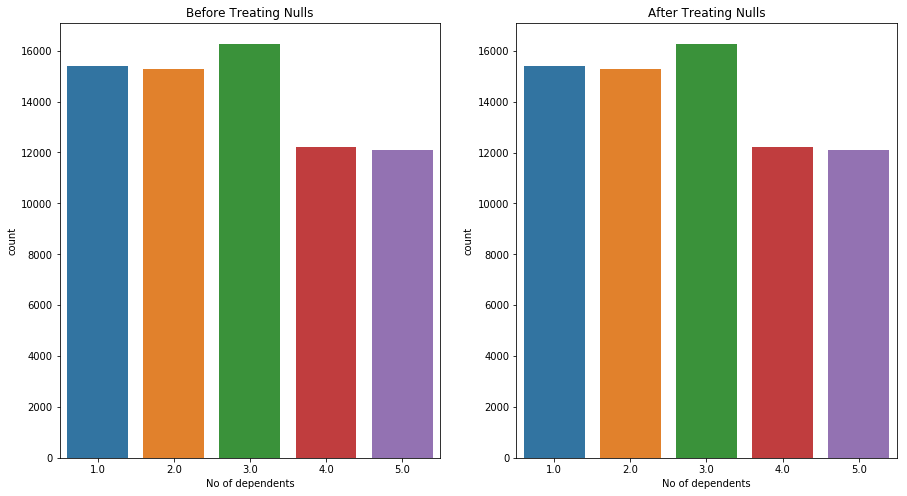

Describe No of dependents: count    71292.000000
mean         2.865132
std          1.382283
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: No of dependents, dtype: float64

No. of Null Values: 0


In [ ]:
print("Describe No of dependents:",demographic["No of dependents"].describe())

print("\nNo. of Null Values:",demographic["No of dependents"].isnull().sum())

fig = plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(demographic["No of dependents"])
plt.title("Before Treating Nulls")

# lets impute null values with median
demographic["No of dependents"] = demographic["No of dependents"].replace(np.nan,demographic["No of dependents"].median())

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["No of dependents"])
plt.title("After Treating Nulls")
plt.show()


print("Describe No of dependents:",demographic["No of dependents"].describe())

print("\nNo. of Null Values:",demographic["No of dependents"].isnull().sum())

In [ ]:
# Income
print("Income",demographic["Income"].describe())

# lets impute negatvie values with median
demographic["Income"][demographic["Income"]<0] = demographic["Income"].median()

print("\nIncome after treating negative values:",demographic["Income"].describe())

Income count    71292.000000
mean        27.195758
std         15.514524
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64

Income after treating negative values: count    71292.000000
mean        27.227003
std         15.486382
min          0.000000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64


Describe Education: count            71173
unique               5
top       Professional
freq             24837
Name: Education, dtype: object

No. of Null Values: 119

Different values for Education with count:
 Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: Education, dtype: int64


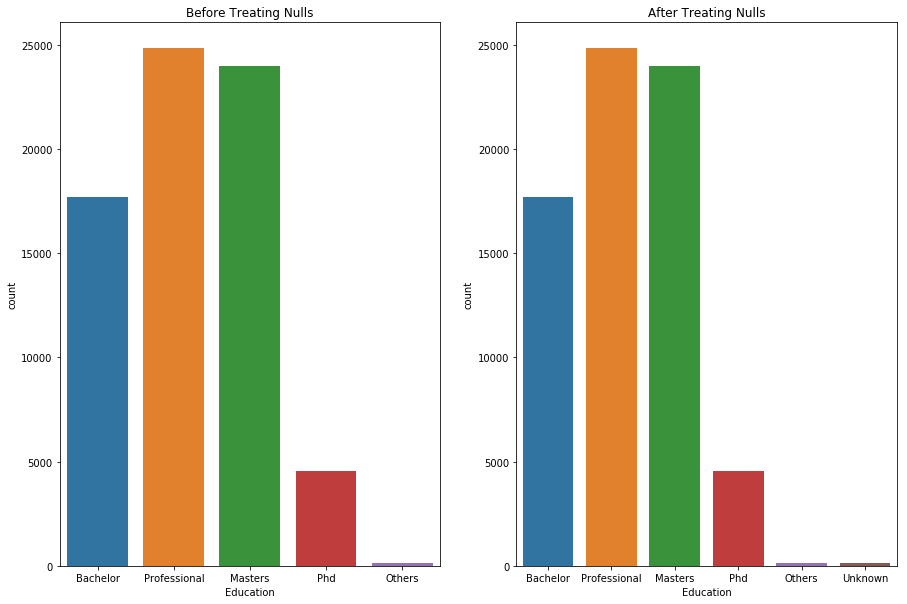

Describe Education after treating nulls: count            71292
unique               6
top       Professional
freq             24837
Name: Education, dtype: object

No. of Null Values: 0


In [ ]:
print("Describe Education:",demographic["Education"].describe())

print("\nNo. of Null Values:",demographic["Education"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(demographic["Education"])
plt.title("Before Treating Nulls")

# out of 71173 entries, max is 24837, which  belongs to "Professional", this is not a clear cut winner

# lets check the count of each value for Education
print("\nDifferent values for Education with count:\n",demographic["Education"].value_counts())

# since the frequency for 2 - 3 values for the education is very close, we will impute this with "Unknown"
demographic["Education"] = demographic["Education"].replace(np.nan,"Unknown")

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Education"])
plt.title("After Treating Nulls")
plt.show()

print("Describe Education after treating nulls:",demographic["Education"].describe())

print("\nNo. of Null Values:",demographic["Education"].isnull().sum())

Describe Profession: count     71278
unique        3
top         SAL
freq      40438
Name: Profession, dtype: object

No. of Null Values: 14


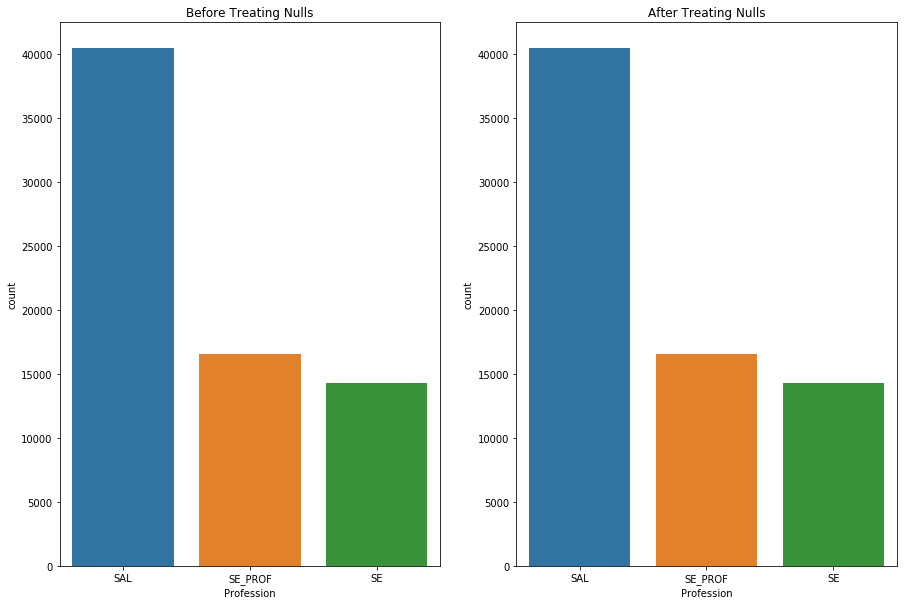

Describe Profession after null values: count     71292
unique        3
top         SAL
freq      40452
Name: Profession, dtype: object

No. of Null Values: 0


In [ ]:
print("Describe Profession:",demographic["Profession"].describe())

print("\nNo. of Null Values:",demographic["Profession"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(demographic["Profession"])
plt.title("Before Treating Nulls")

# out of 71278 entries, more than 40000 entries belongs to "SAL",lets imput null values with "SAL"

demographic["Profession"] = demographic["Profession"].replace(np.nan,"SAL")

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Profession"])
plt.title("After Treating Nulls")
plt.show()

print("Describe Profession after null values:",demographic["Profession"].describe())

print("\nNo. of Null Values:",demographic["Profession"].isnull().sum())

Describe Type of Residence: count      71284
unique         5
top       Rented
freq       53394
Name: Type of residence, dtype: object

No. of Null Values: 8


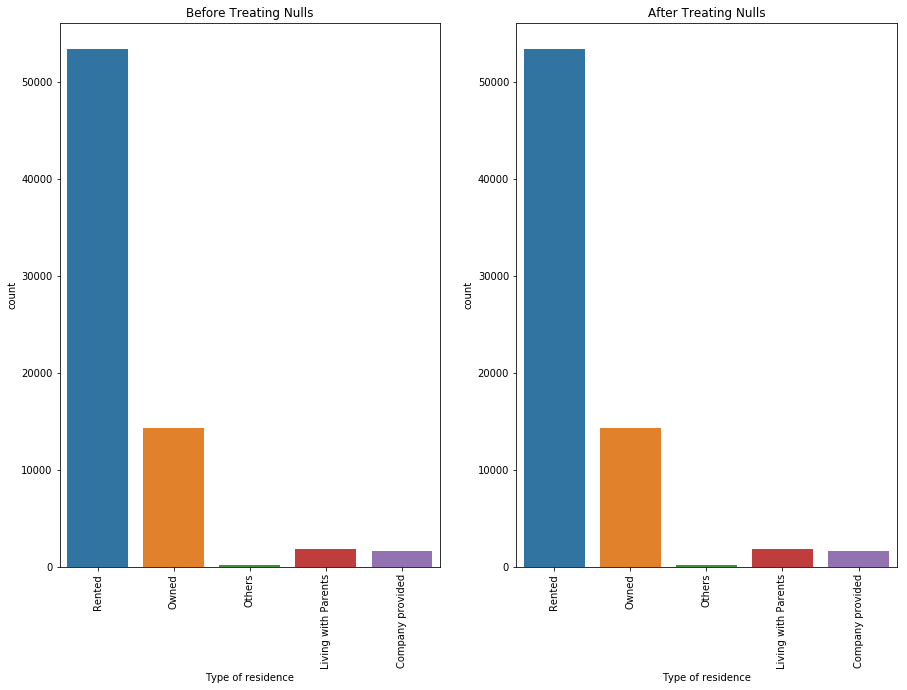

Describe Type of Residence after treating nulls: count      71292
unique         5
top       Rented
freq       53402
Name: Type of residence, dtype: object

No. of Null Values: 0


In [ ]:
print("Describe Type of Residence:",demographic["Type of residence"].describe())

print("\nNo. of Null Values:",demographic["Type of residence"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(demographic["Type of residence"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)
# out of 71278 entries, more than 50000 entries belongs to "Rented",lets imput null values with "Rented"

demographic["Type of residence"] = demographic["Type of residence"].replace(np.nan,"Rented")

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Type of residence"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()

print("Describe Type of Residence after treating nulls:",demographic["Type of residence"].describe())

print("\nNo. of Null Values:",demographic["Type of residence"].isnull().sum())

Describe Performance Tag: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

No. of Null Values: 1425


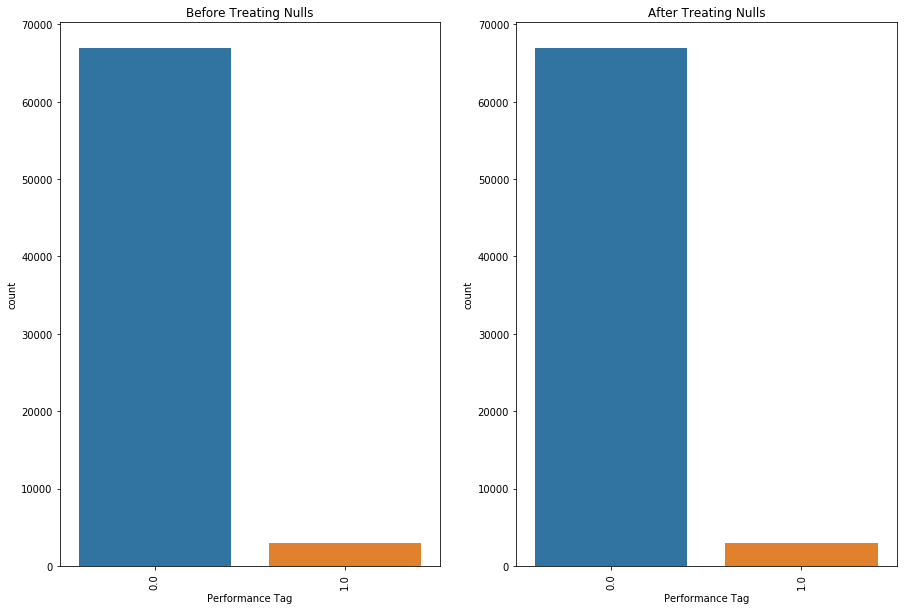

Describe Performance Tag after removing nulls: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

No. of Null Values: 0


In [ ]:
print("Describe Performance Tag:",demographic["Performance Tag"].describe())

print("\nNo. of Null Values:",demographic["Performance Tag"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(demographic["Performance Tag"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)

# there are 1425 null values for performance tag, a null value for this field means credit card was never used
# these records belongs to rejected applicants, lets remove them from demographic dataset and also save them in a seperate
# dataset for later use
rejected_demo = demographic[demographic["Performance Tag"].isnull()]
demographic = demographic[~demographic["Performance Tag"].isnull()]

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(demographic["Performance Tag"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()

print("Describe Performance Tag after removing nulls:",demographic["Performance Tag"].describe())

print("\nNo. of Null Values:",demographic["Performance Tag"].isnull().sum())

In [ ]:
# We have treated all the null values, lets check the null values in the dataset now
print("Column wise null values:\n",demographic.isnull().sum().sort_values(ascending = False))

# no more null values, dataset is in a good shape now, lets check the dimension
print ("\ndimension of the cleaned dataset:",demographic.shape)

#lets display few rows of the dataset
demographic.head()

Column wise null values:
 Performance Tag                      0
No of months in current company      0
No of months in current residence    0
Type of residence                    0
Profession                           0
Education                            0
Income                               0
No of dependents                     0
Marital Status                       0
Gender                               0
Age                                  0
Application ID                       0
dtype: int64

dimension of the cleaned dataset: (69867, 12)


Application ID  Age Gender Marital Status  No of dependents  Income  \
0       954457215   48      F        Married               2.0    40.0   
1       432830445   31      M        Married               4.0    55.0   
2       941387308   32      M         Single               2.0    46.0   
3       392161677   43      M        Married               1.0    53.0   
4       182011211   35      F        Married               5.0    44.0   

      Education Profession Type of residence  \
0      Bachelor        SAL            Rented   
1  Professional    SE_PROF            Rented   
2      Bachelor    SE_PROF            Rented   
3      Bachelor         SE            Rented   
4  Professional        SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

# Load creditbureau data set

In [ ]:
# load Credit Bureau data
creditbureau = pd.read_csv("Credit Bureau data.csv")
creditbureau.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [ ]:
# lets check the dimensions of the dataset
creditbureau.shape

(71295, 19)

In [ ]:
# lets check the dataset for numeric variables
creditbureau.describe()

Application ID  No of times 90 DPD or worse in last 6 months  \
count    7.129500e+04                                  71295.000000   
mean     4.989601e+08                                      0.270313   
std      2.885905e+08                                      0.534166   
min      1.004500e+05                                      0.000000   
25%      2.483719e+08                                      0.000000   
50%      4.975698e+08                                      0.000000   
75%      7.495868e+08                                      0.000000   
max      1.000084e+09                                      3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.430535   
std                                        0.825334   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.577207   
std                                        1.074436   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.450340   
std                                         0.808387   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         5.000000   

       No of times 60 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.655488   
std                                         1.089535   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         7.000000   

       No of times 30 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.800912   
std                                         1.331940   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         9.000000   

       Avgas CC Utilization in last 12 months  \
count                            70237.000000   
mean                                29.696926   
std                                 29.533308   
min                                  0.000000   
25%                                  8.000000   
50%                                 15.000000   
75%                                 46.000000   
max                                113.000000   

       No of trades opened in last 6 months  \
count                          71294.000000   
mean                               2.298048   
std                                2.070191   
min                                0.000000   
25%                                1.000000   
50%                                2.000000   
75%                                3.000000   
max                               12.00000

In [ ]:
# lets check all column names
print("Columns Names:",creditbureau.columns)

Columns Names: Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')


In [ ]:
# checking number of unique entries for all the variables
print("No. of unique values - Column wise:\n",creditbureau.nunique())

No. of unique values - Column wise:
 Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquirie

Looks like there are some duplicate application ids, lets check

In [ ]:
# lets display the duplicate records for application id
dup_app_id = creditbureau["Application ID"]
dup_customers = creditbureau[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

Application ID  No of times 90 DPD or worse in last 6 months  \
5243        653287861                                             0   
42637       653287861                                             1   
48602       671989187                                             1   
59022       671989187                                             0   
24386       765011468                                             0   
27586       765011468                                             0   

       No of times 60 DPD or worse in last 6 months  \
5243                                              0   
42637                                             1   
48602                                             2   
59022                                             1   
24386                                             0   
27586                                             0   

       No of times 30 DPD or worse in last 6 months  \
5243                                              0   
42637                                             1   
48602                                             3   
59022                                             2   
24386                                             0   
27586                                             0   

       No of times 90 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              2   
59022                                              0   
24386                                              0   
27586                                              0   

       No of times 60 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              2   
59022                                              2   
24386                                              0   
27586                                              0   

       No of times 30 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              3   
59022                                              3   
24386                                              0   
27586                                              0   

       Avgas CC Utilization in last 12 months  \
5243                                     15.0   
42637                                   113.0   
48602                                    63.0   
59022                                    76.0   
24386                                    11.0   
27586                                    11.0   

       No of trades opened in last 6 months  \
5243                                    0.0   
42637                                   2.0   
48602                                   2.0   
59022                                   3.0   
24386                                   1.0   
27586                                   1.0   

       No of trades opened in last 12 months  \
5243                                       0   
42637                                      5   
48602                                      6   
59022                                      7   
24386                                      2   
27586                                      3   

       No of PL trades opened in last 6 months  \
5243                                         0   
42637                                        1   
48602                                        1   
59022                                        1   
24386                                        0   
27586                                        0   

       No of PL trades opened in last 12 months  \
5243                                          0   
42637                                         3   
48602                                      

### Observation:

Even though the application ids are same, the records are completely different, which means records belongs to different customers. We are assuming that the 2nd records here with the same application ids are invalid entries and we are going to drop them.

In [ ]:
# lets drop the duplicates as discussed above
creditbureau.drop_duplicates("Application ID",inplace = True)

#check the dimensions of the dataset again
print ("Dimension of the dataset after dropping duplicates:",creditbureau.shape)

Dimension of the dataset after dropping duplicates: (71292, 19)


In [ ]:
# Check the column-wise info of the dataframe
creditbureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71292 non-null int64
No of times 90 DPD or worse in last 6 months                       71292 non-null int64
No of times 60 DPD or worse in last 6 months                       71292 non-null int64
No of times 30 DPD or worse in last 6 months                       71292 non-null int64
No of times 90 DPD or worse in last 12 months                      71292 non-null int64
No of times 60 DPD or worse in last 12 months                      71292 non-null int64
No of times 30 DPD or worse in last 12 months                      71292 non-null int64
Avgas CC Utilization in last 12 months                             70234 non-null float64
No of trades opened in last 6 months                               71291 non-null float64
No of trades opened in last 12 months                              71292 non-null int64
No of P

Above data shows that few fields have null values, lets check the details

In [ ]:
# lets check null values column wise
creditbureau.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    1425
Avgas CC Utilization in last 12 months                             1058
Outstanding Balance                                                 272
Presence of open home loan                                          272
No of trades opened in last 6 months                                  1
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
No of trades opened in last 12 months                                 0
Presence of open auto loan                                            0
No of PL trades opened in last 6 months                         

In [ ]:
# lets check the % of null values column wise
(round(100*(creditbureau.isnull().sum()/len(creditbureau.index)), 2)).sort_values(ascending = False)

Performance Tag                                                    2.00
Avgas CC Utilization in last 12 months                             1.48
Outstanding Balance                                                0.38
Presence of open home loan                                         0.38
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
No of trades opened in last 12 months                              0.00
No of trades opened in last 6 months                               0.00
Presence of open auto loan                                         0.00
No of PL trades opened in last 6 months                         

Lets treat null values and missing values one by one

In [ ]:
# lets check for other variables except "Application ID"
cols = creditbureau.drop("Application ID",axis = 1)

print('\nUnique values in the datafram - column wise:')
for i in cols:
    print(i,creditbureau[i].unique(),'\n')


Unique values in the datafram - column wise:
No of times 90 DPD or worse in last 6 months [0 1 2 3] 

No of times 60 DPD or worse in last 6 months [0 1 2 3 4 5] 

No of times 30 DPD or worse in last 6 months [0 1 2 3 4 5 6 7] 

No of times 90 DPD or worse in last 12 months [0 1 2 3 4 5] 

No of times 60 DPD or worse in last 12 months [0 1 2 3 4 5 6 7] 

No of times 30 DPD or worse in last 12 months [0 1 2 3 4 5 6 7 8 9] 

Avgas CC Utilization in last 12 months [  4.   3.   7.  11.  12.  10.  13.   9.   6.   5.   2.  14.   0.   8.
  nan  15.   1.  16.  19.  18.  17.  20.  26.  24.  23.  22.  21.  27.
  25.  28.  29. 113.  83. 111.  43. 103.  98.  97.  37.  45.  80.  57.
  94.  40.  34.  41. 105.  59.  81.  75.  56.  88.  70.  95.  65. 102.
  85. 112.  32.  73.  58. 104.  77.  35. 100.  49. 110.  96.  79.  68.
  90.  93.  33.  60. 106.  91.  64. 107.  72.  74. 101.  39.  71.  36.
  99.  38.  84.  86.  46.  50.  48.  51.  53.  42.  66.  78.  61.  44.
  54.  92.  62.  82. 109.  76.  31.  

There are null values present in the followng variables as shown above

1. Avgas CC Utilization in last 12 months
2. Outstanding Balance
3. Presence of open home loan
4. Performance Tag

All other fields are good

# Treat Null values in creditbureau data set

Describe Performance Tag: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

No. of Null Values: 1425


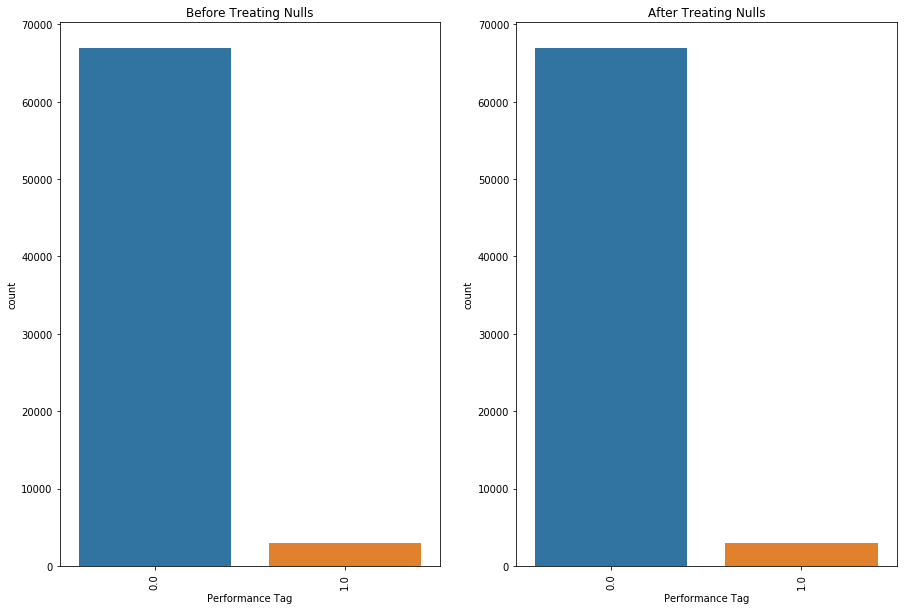

Describe Performance Tag after removing nulls: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

No. of Null Values: 0


In [ ]:
print("Describe Performance Tag:",creditbureau["Performance Tag"].describe())

print("\nNo. of Null Values:",creditbureau["Performance Tag"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(creditbureau["Performance Tag"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)

# there are 1425 null values for performance tag, a null value for this field means credit card was never used
# these records belongs to rejected applicants, lets remove them from creditbureau dataset and also save them in a seperate
# dataset for later use
rejected_creditb = creditbureau[creditbureau["Performance Tag"].isnull()]
creditbureau = creditbureau[~creditbureau["Performance Tag"].isnull()]

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(creditbureau["Performance Tag"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()

print("Describe Performance Tag after removing nulls:",creditbureau["Performance Tag"].describe())

print("\nNo. of Null Values:",creditbureau["Performance Tag"].isnull().sum())

Describe No of trades opened in last 6 months: count    69866.000000
mean         2.285117
std          2.081900
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64

No. of Null Values: 1


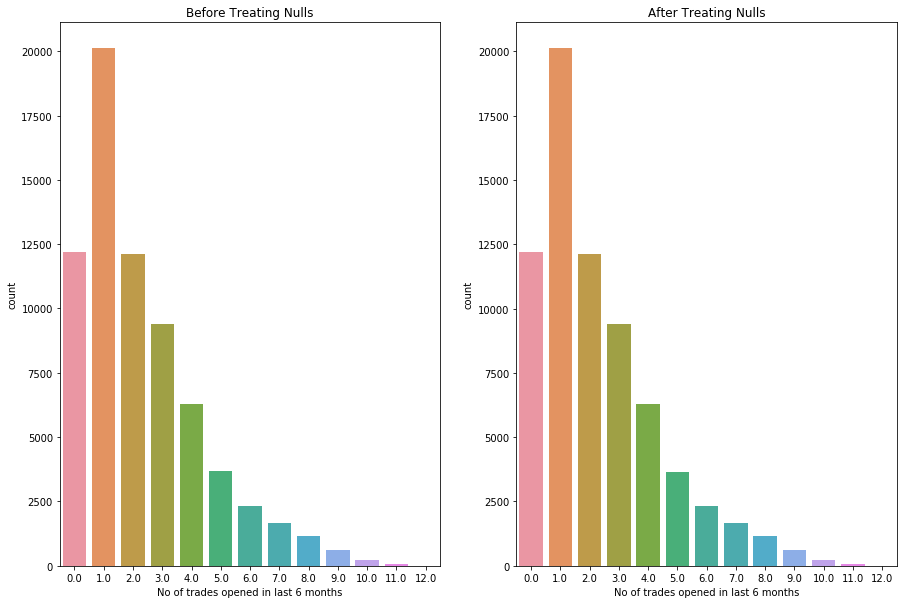


No. of Null Values after treating nulls: 0


In [ ]:
print("Describe No of trades opened in last 6 months:",creditbureau["No of trades opened in last 6 months"].describe())

print("\nNo. of Null Values:",creditbureau["No of trades opened in last 6 months"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(creditbureau["No of trades opened in last 6 months"])
plt.title("Before Treating Nulls")

# Out of 71291 records, more than 20000 has a value 1.0, lets impute the null value with 1.0
creditbureau["No of trades opened in last 6 months"] = creditbureau["No of trades opened in last 6 months"].replace(np.nan,1.0)

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(creditbureau["No of trades opened in last 6 months"])
plt.title("After Treating Nulls")
plt.show()

print("\nNo. of Null Values after treating nulls:",creditbureau["No of trades opened in last 6 months"].isnull().sum())

Presence of open home loan: count    69595.000000
mean         0.259659
std          0.438451
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Presence of open home loan, dtype: float64

No. of Null Values: 272


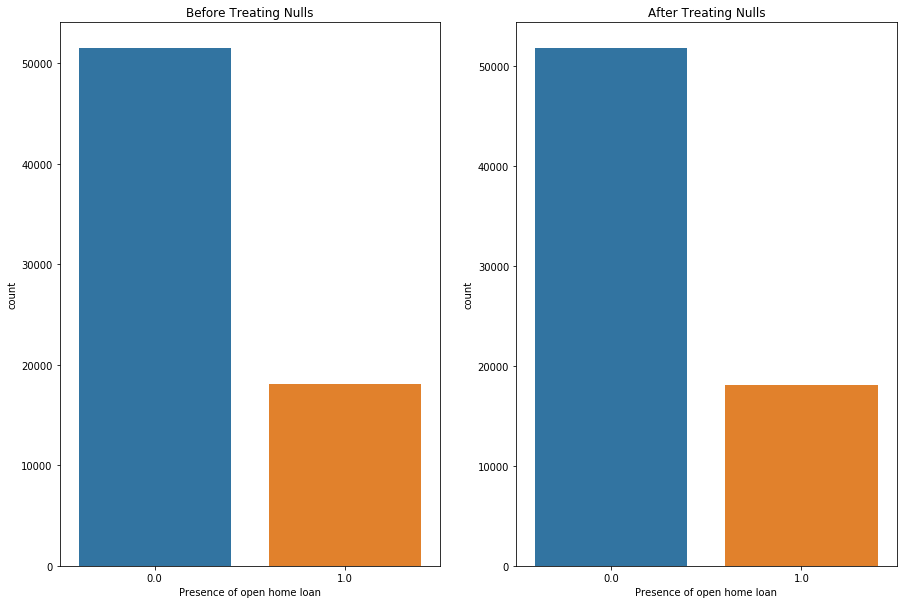


No. of Null Values after treating nulls: 0


In [ ]:
print("Presence of open home loan:",creditbureau["Presence of open home loan"].describe())

print("\nNo. of Null Values:",creditbureau["Presence of open home loan"].isnull().sum())

fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(creditbureau["Presence of open home loan"])
plt.title("Before Treating Nulls")

# Out of 71020 records, more than 50000 has a value 0, lets impute the null value with 0
creditbureau["Presence of open home loan"] = creditbureau["Presence of open home loan"].replace(np.nan,0)

# plot after treating null values
plt.subplot(1,2,2)
sns.countplot(creditbureau["Presence of open home loan"])
plt.title("After Treating Nulls")
plt.show()

print("\nNo. of Null Values after treating nulls:",creditbureau["Presence of open home loan"].isnull().sum())

In [ ]:
# lets analyse Avgas CC Utilization in last 12 months and Outstanding Balance

# lets see the no. of null values for outstanding balance
print("\nNo. of Null Values for Outstanding Balance:",creditbureau["Outstanding Balance"].isnull().sum())

# lets check the records where outstanding balance has null values
creditbureau.loc[creditbureau["Outstanding Balance"].isnull()]


No. of Null Values for Outstanding Balance: 272


Application ID  No of times 90 DPD or worse in last 6 months  \
10509       479431469                                             0   
10560       369436570                                             0   
10583       198567793                                             0   
10594       771962421                                             0   
10763       124126752                                             0   
10785       897124363                                             0   
10821       127042017                                             0   
10952       252694179                                             0   
10958       377993668                                             0   
10965       757235320                                             0   
10966       548942415                                             0   
10999        84058197                                             0   
11067       752148797                                             0   
11138        49012122                                             0   
11196       503318401                                             0   
11216       591055764                                             0   
11232       388514432                                             0   
11300       542714178                                             0   
11343       916223895                                             0   
11392       744687272                                             0   
11447       668785489                                             0   
11461       649053029                                             0   
11485       929601043                                             0   
11630       309853573                                             0   
11640       569827778                                             0   
11692       883384468                                             0   
11707       221899432                                             0   
11727       911725818                                             0   
11732       434467018                                             0   
11755       481295026                                             0   
...               ...                                           ...   
25802       343704509                                             0   
25848       470164270                                             0   
26077       166911794                                             0   
26102         4287141                                             0   
28167       427587624                                             0   
28191       773993075                                             0   
28512       780094408                                             0   
28673       609912804                                             0   
28832       691808613                                             0   
29071       186583338                                             0   
40744       626657043                                             0   
42032       241072102                                             0   
42235       413752978                                             0   
42673        51310669                                             0   
42956       263952556                                             0   
43533       818409028                                             0   
43673       363282014                                             0   
43858       897195362                                             0   
44507       389294717                                             0   
44649       313402761                                             0   
44707       268999172                                             0   
44929        87199412                                             0   
45736       926395581                                             0   
46198       253104378                                             0   
46339       557891345          

"Total no. of trades" is 0 for all the records for which "Outstanding Balance" & "Avgas CC Utilization in last 12 months" has null values. which means credit card has never been utilized, we can safely replace these nan value with 0.

In [ ]:
# replacing null values for Avgas CC Utilization in last 12 months & Outstanding Balance to 0
creditbureau.loc[creditbureau["Avgas CC Utilization in last 12 months"].isnull(),"Avgas CC Utilization in last 12 months"] = 0
creditbureau.loc[creditbureau["Outstanding Balance"].isnull(),'Outstanding Balance'] = 0

In [ ]:
# lets check the null values again
creditbureau.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    0
No of trades opened in last 6 months                               0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 12 months                              0
Presence of open auto loan                                         0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months 

We have treated all the null values now

In [ ]:
# lets check the dimensions of the cleaned dataset
creditbureau.shape

(69867, 19)

# EDA for Demographic Data

In [ ]:
# lets create a copy of the demographic dataset to perform EDA
demographic_eda = pd.DataFrame(demographic).copy()

Count of different values for Performance Tag:
 0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64


Text(0,0.5,'Frequency')

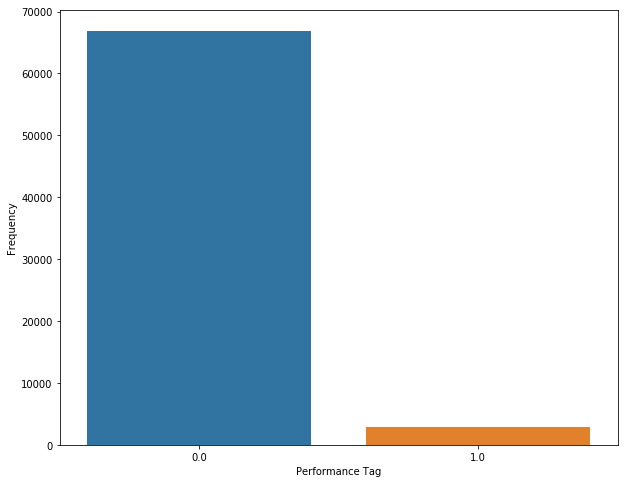

In [ ]:
# lets check count of different values for performance tag
print("Count of different values for Performance Tag:\n",demographic_eda["Performance Tag"].value_counts())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic_eda["Performance Tag"])
plt.ylabel('Frequency')

Data set is highly imbalanced as majority of the customers have a performance tag of 0 which means they are good customers.

In [ ]:
# % of good and bad customers in the dataset

print("Percentage of Defaulters:",(demographic_eda['Performance Tag'].sum()/demographic_eda['Performance Tag'].count())*100)

Percentage of Defaulters: 4.218014227031359


In [ ]:
#seperating numerical data from categorical data

print("Total no. of columns in demographic_eda dataset:",len(demographic_eda.columns))

# numerical columns
num_cols =  demographic_eda.select_dtypes(include=[np.number]).columns.tolist()
print("\nNo. of numeric variable in demographic_eda dataset:",len(num_cols))

# categorical columns
cat_cols = list(set(demographic_eda.columns) - set(num_cols))
print("\nNo. of categorical variable in demographic_eda dataset:",len(cat_cols))

print("\nList of categorical variables:",cat_cols)
print("\nList of numeric variables:",num_cols)

Total no. of columns in demographic_eda dataset: 12

No. of numeric variable in demographic_eda dataset: 7

No. of categorical variable in demographic_eda dataset: 5

List of categorical variables: ['Gender', 'Type of residence', 'Profession', 'Education', 'Marital Status']

List of numeric variables: ['Application ID', 'Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company', 'Performance Tag']


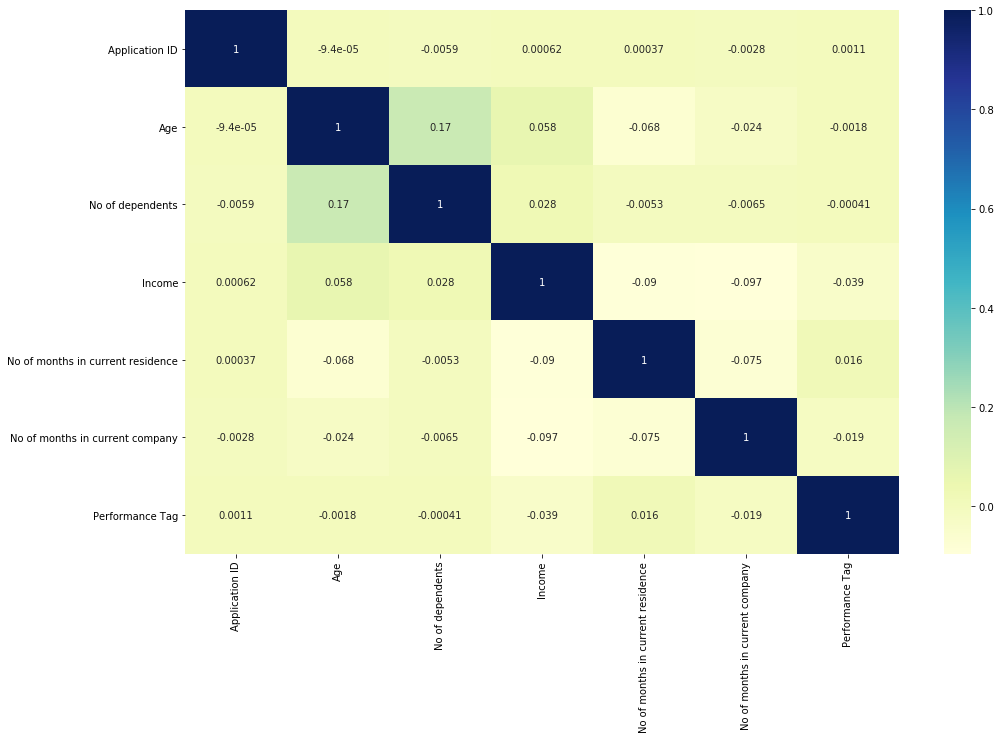

In [ ]:
#Correlations between numerical variables
plt.figure(figsize = (16, 10))
sns.heatmap(demographic_eda[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

The Target variable, Performance Tag is not much dependant with any numerical data

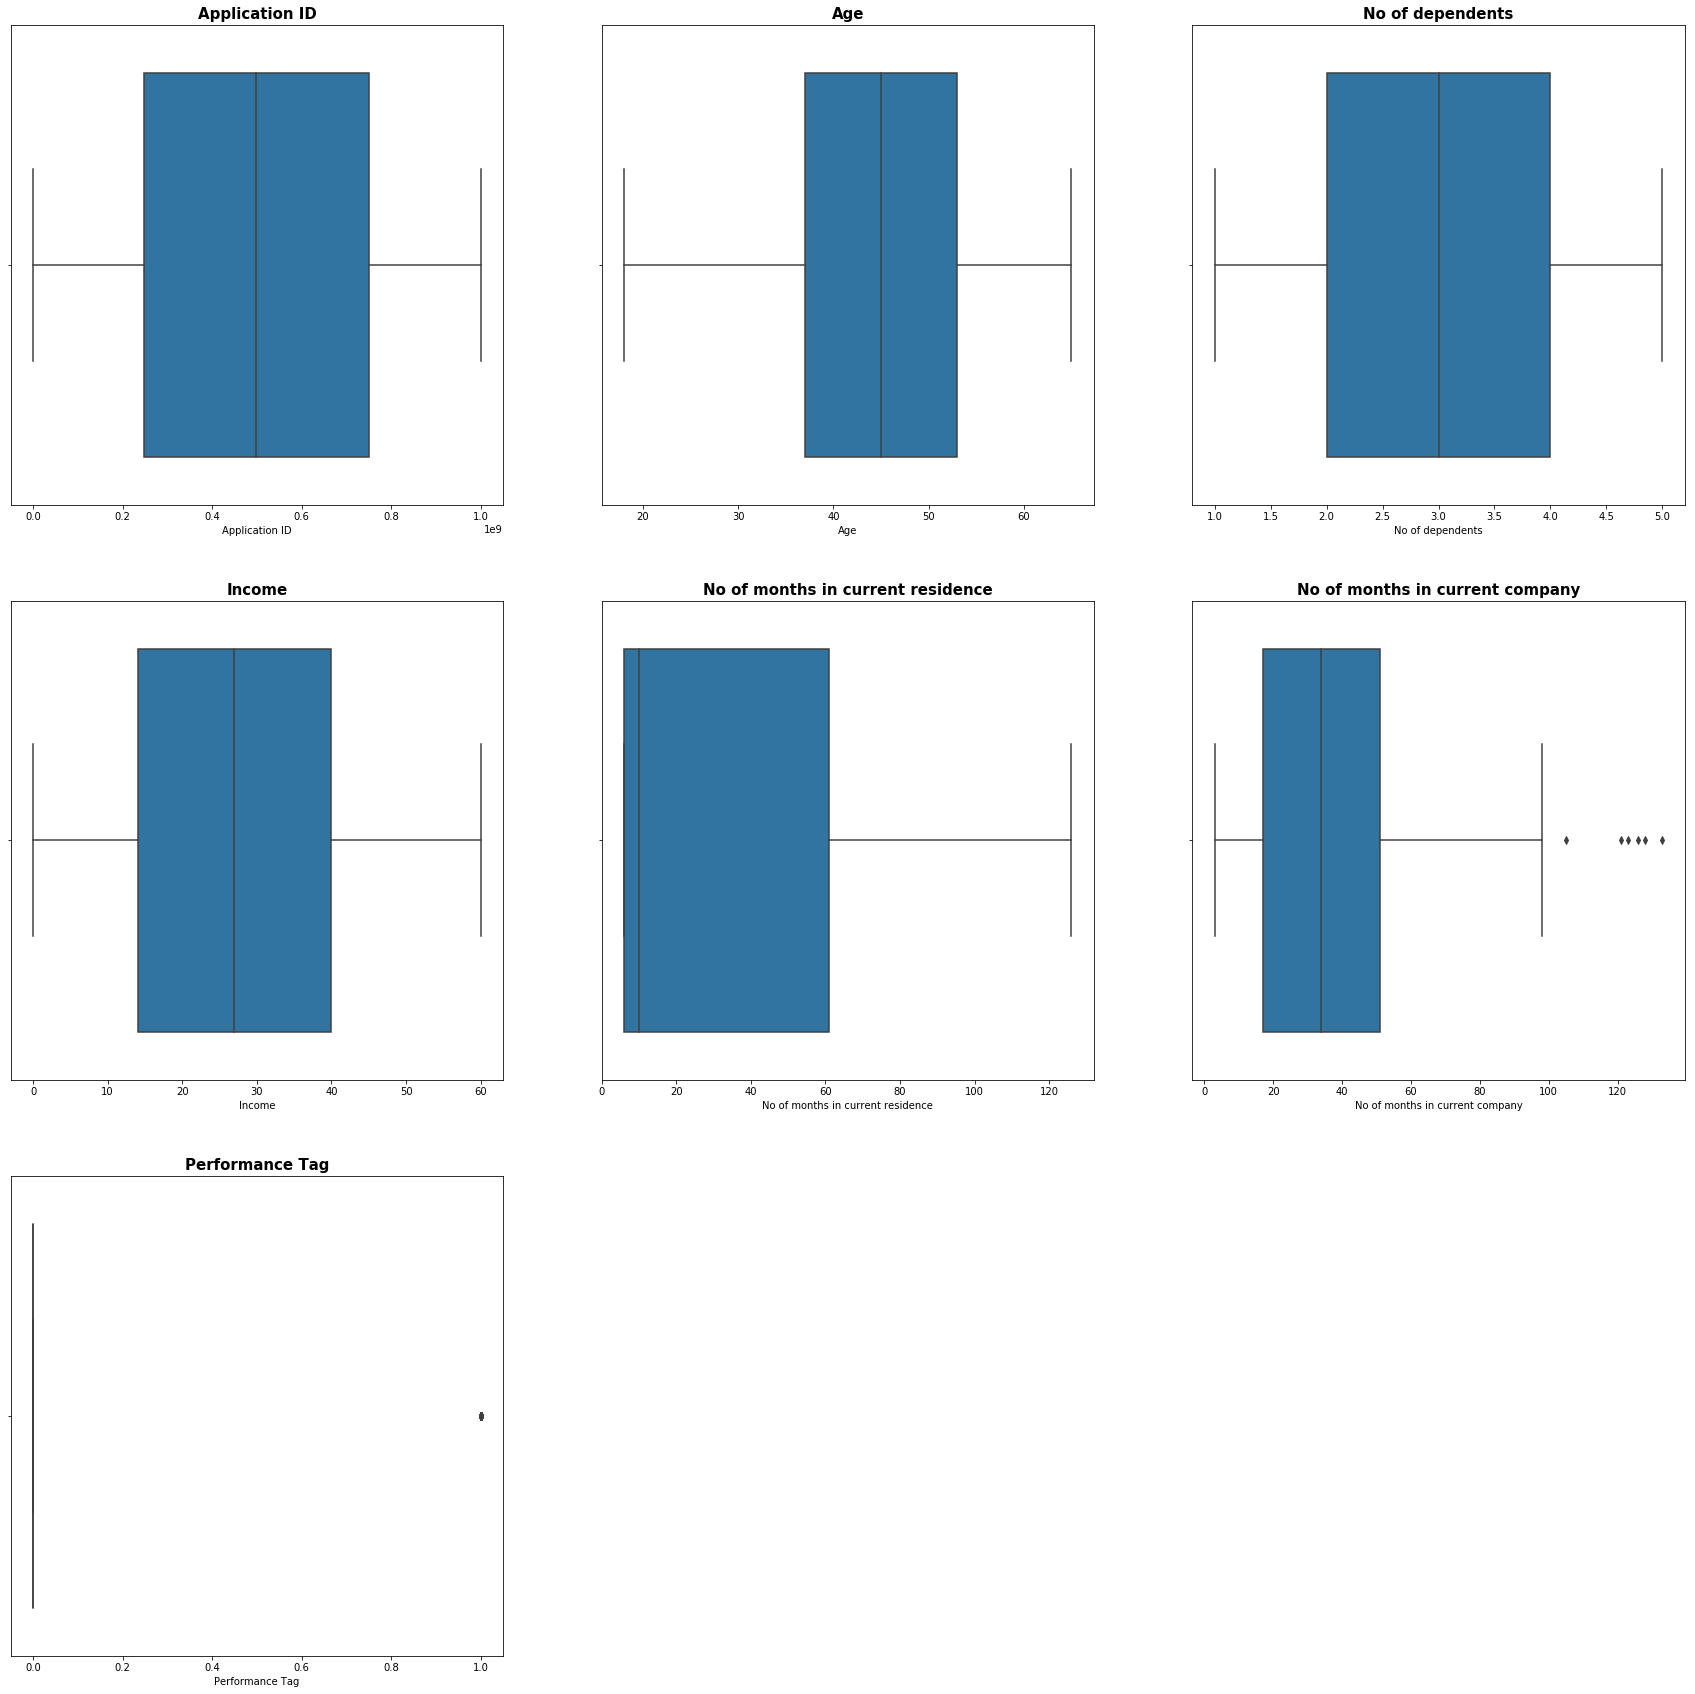

In [ ]:
# lets check for outliers in the demographic dataset
fig= plt.figure(figsize = (30,30))

i = 1
for col in num_cols:
    plt.subplot(3,3,i)
    sns.boxplot(demographic_eda[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1

plt.show()

There seems to be no outliers in the demographic dataset except for the field "No of months in current company", lets check
available statistic for this field

In [ ]:
# Lets check the available statistics for the field "No of months in current company"
demographic_eda["No of months in current company"].describe()

count    69867.000000
mean        34.198921
std         20.349768
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No of months in current company, dtype: float64

As per the above data, Minimum value for the variable "No of months in current company" is 3 whereas the maximum value is 133 , this data seems realistic, organizations can have new joinees as well as tenured employees, so lets keep the data as it is.

In [ ]:
# function for univariate analysis
# if a variable has more than 15 unique values, we will create bins for the variable
def univariate_plot(data,col):
    plt.figure(figsize=(10,8))
    if data[col].nunique() > 15:
        col_bins = col+"_bins"
        data[col_bins] = pd.cut(data[col], 8, duplicates = 'drop') # creating bins
        sns.countplot(data[col_bins]) # plot for binned variables
        plt.xlabel(col_bins,fontsize = 25)
    else:
        print("\nDifferent values for",col, "with count:\n",data[col].value_counts())
        sns.countplot(data[col]) # plot for non binned variables
        plt.xlabel(col,fontsize = 25)

    plt.ylabel('Frequency',fontsize = 25)
    xticks(rotation = 30)

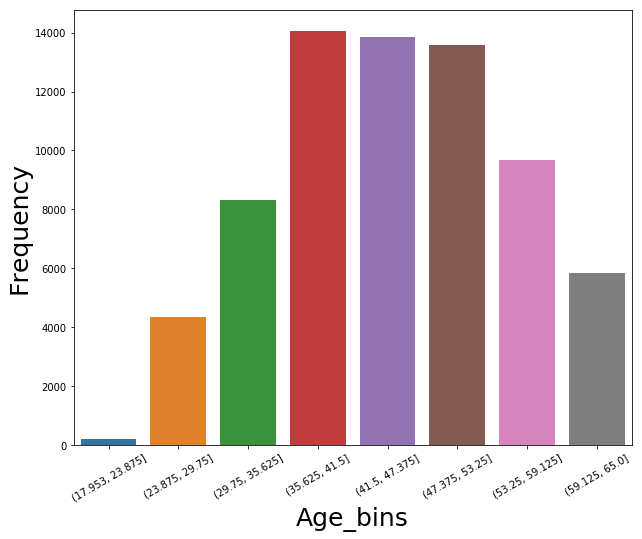

In [ ]:
univariate_plot(demographic_eda, "Age")

Very few customers are less than 24 years of age, majority of the customers falls in the range 35 to 53 years of age group


Different values for Gender with count:
 M    53361
F    16506
Name: Gender, dtype: int64


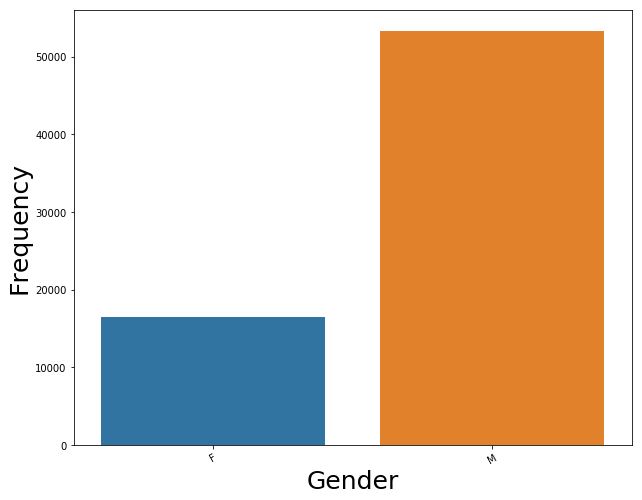

In [ ]:
# Univariate analysis for Gender
univariate_plot(demographic_eda,"Gender")

Above graph shows that there are more males than females in the given dataset.


Different values for Marital Status with count:
 Married    59550
Single     10317
Name: Marital Status, dtype: int64


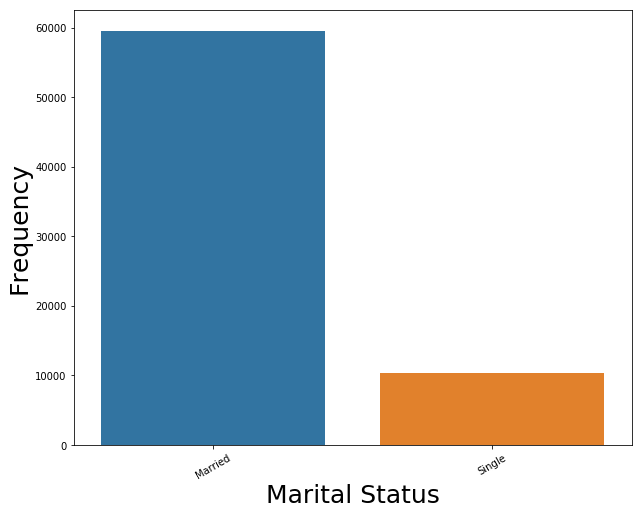

In [ ]:
# Univariate analysis for Marital Status
univariate_plot(demographic_eda,"Marital Status")

Above graph shows that there are more married people than Singles in the given dataset.


Different values for No of dependents with count:
 3.0    15648
1.0    15218
2.0    15128
4.0    11998
5.0    11875
Name: No of dependents, dtype: int64


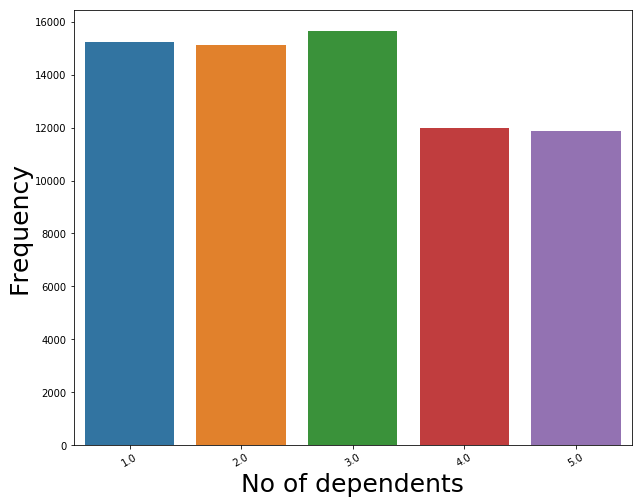

In [ ]:
# Univariate analysis for No. of dependents
univariate_plot(demographic_eda,"No of dependents")

Above graph shows data is almost evenly distributed for all the no. of dependent field, but people with 4 and 5 dependents are lesser than the people with no. of dependents as 1 to 3.

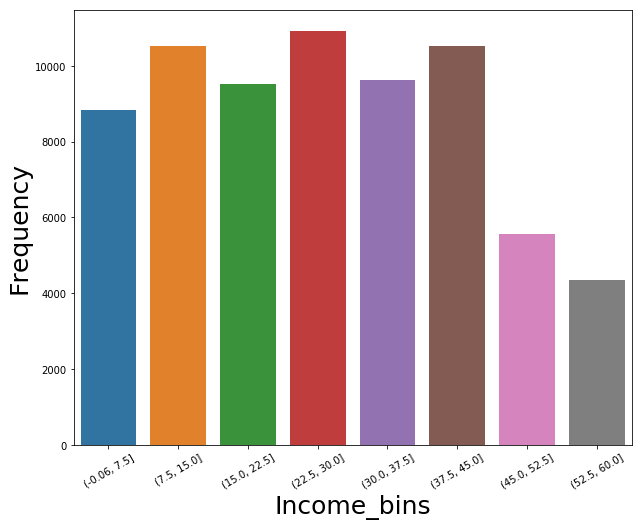

In [ ]:
# Univariate analysis for Income
univariate_plot(demographic_eda,"Income")

Very few customers have income more that 45, for all other bins , no. of customers vary falls between 8500 to 10500.


Different values for Education with count:
 Professional    24384
Masters         23481
Bachelor        17302
Phd              4463
Others            119
Unknown           118
Name: Education, dtype: int64


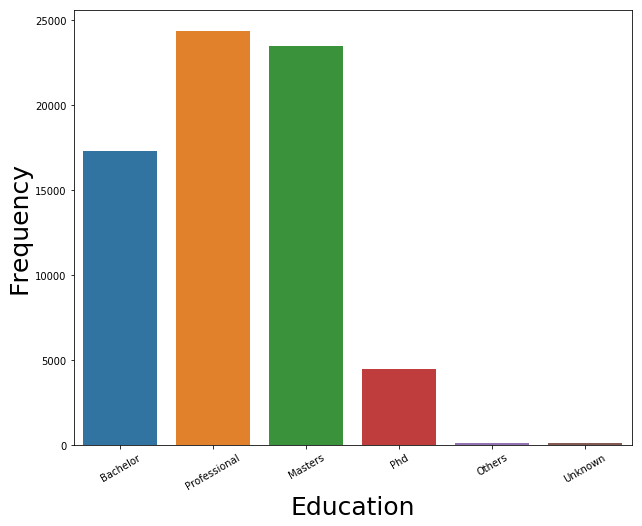

In [ ]:
# Univariate analysis for Education
univariate_plot(demographic_eda,"Education")

Above graph shows that following are the top 3 categories for Education:

1. Bachelor
2. Professional
3. Masters

Few people have done their phd, rest of the population belongs to others or unknown


Different values for Profession with count:
 SAL        39686
SE_PROF    16256
SE         13925
Name: Profession, dtype: int64


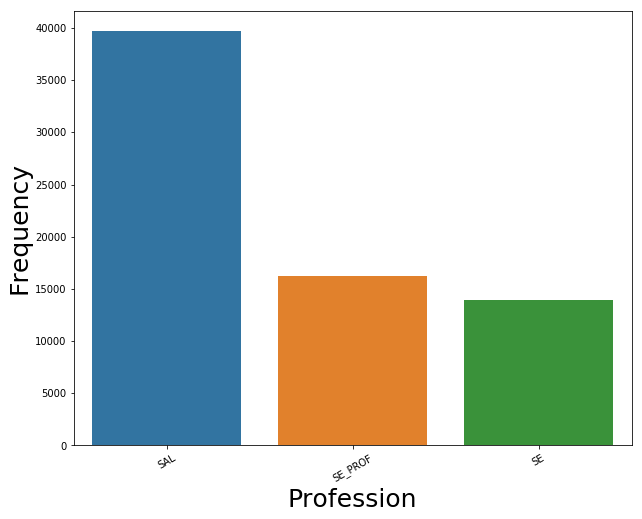

In [ ]:
# Univariate analysis for Profession
univariate_plot(demographic_eda,"Profession")

Above graph shows most of the people are Salaried employees


Different values for Type of residence with count:
 Rented                 52285
Owned                  14003
Living with Parents     1778
Company provided        1603
Others                   198
Name: Type of residence, dtype: int64


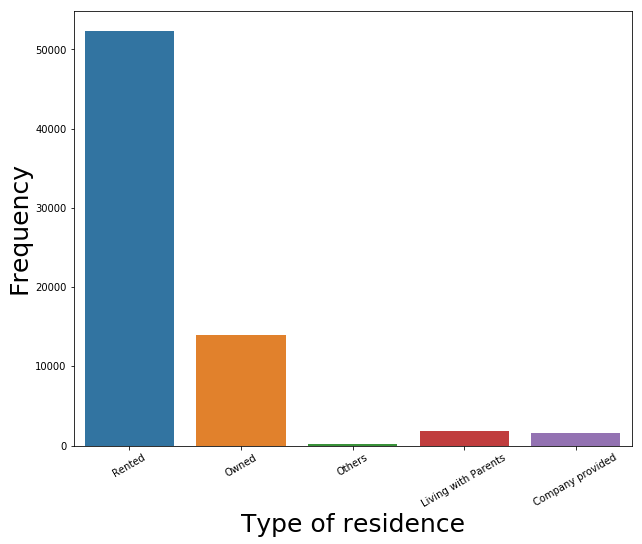

In [ ]:
# Univariate analysis for Type of residence
univariate_plot(demographic_eda,"Type of residence")

Above graph shows most of the people lives in Rented houses, followed by houses owned by them.

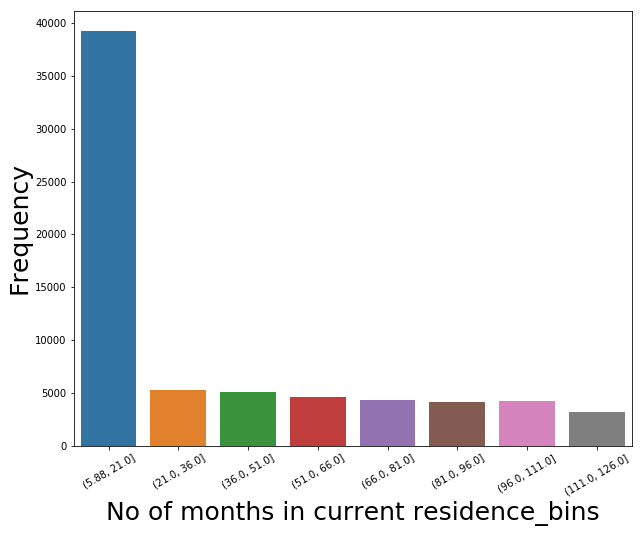

In [ ]:
# Univariate analysis for No of months in current residence
univariate_plot(demographic_eda,"No of months in current residence")

The univariate analysis for the Months in Current Residence shows that relatively very high frequency of the population for the 6 to 21 months

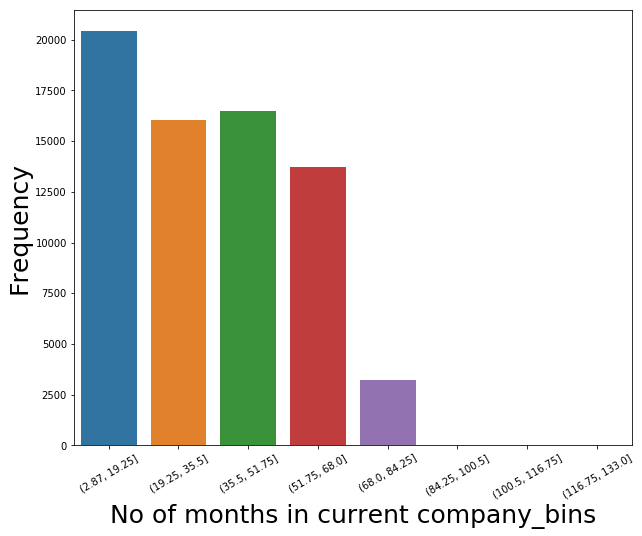

In [ ]:
# Univariate analysis for No of months in current residence
univariate_plot(demographic_eda,"No of months in current company")

As the no. of months in the current company increases , frequency of the customers belonging to that bin decreases.


Different values for Performance Tag with count:
 0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64


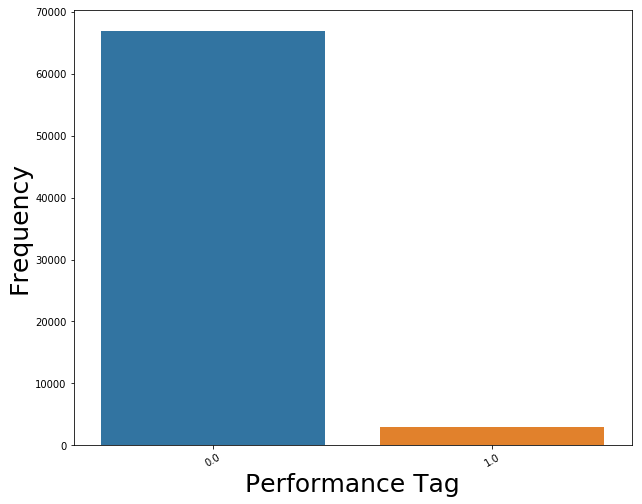

In [ ]:
# Univariate analysis for Performance Tag
univariate_plot(demographic_eda,"Performance Tag")

Above graph shows, dataset has very few default customers (performance tag = 0)

### Lets perform Bivariate Analysis with the target variable

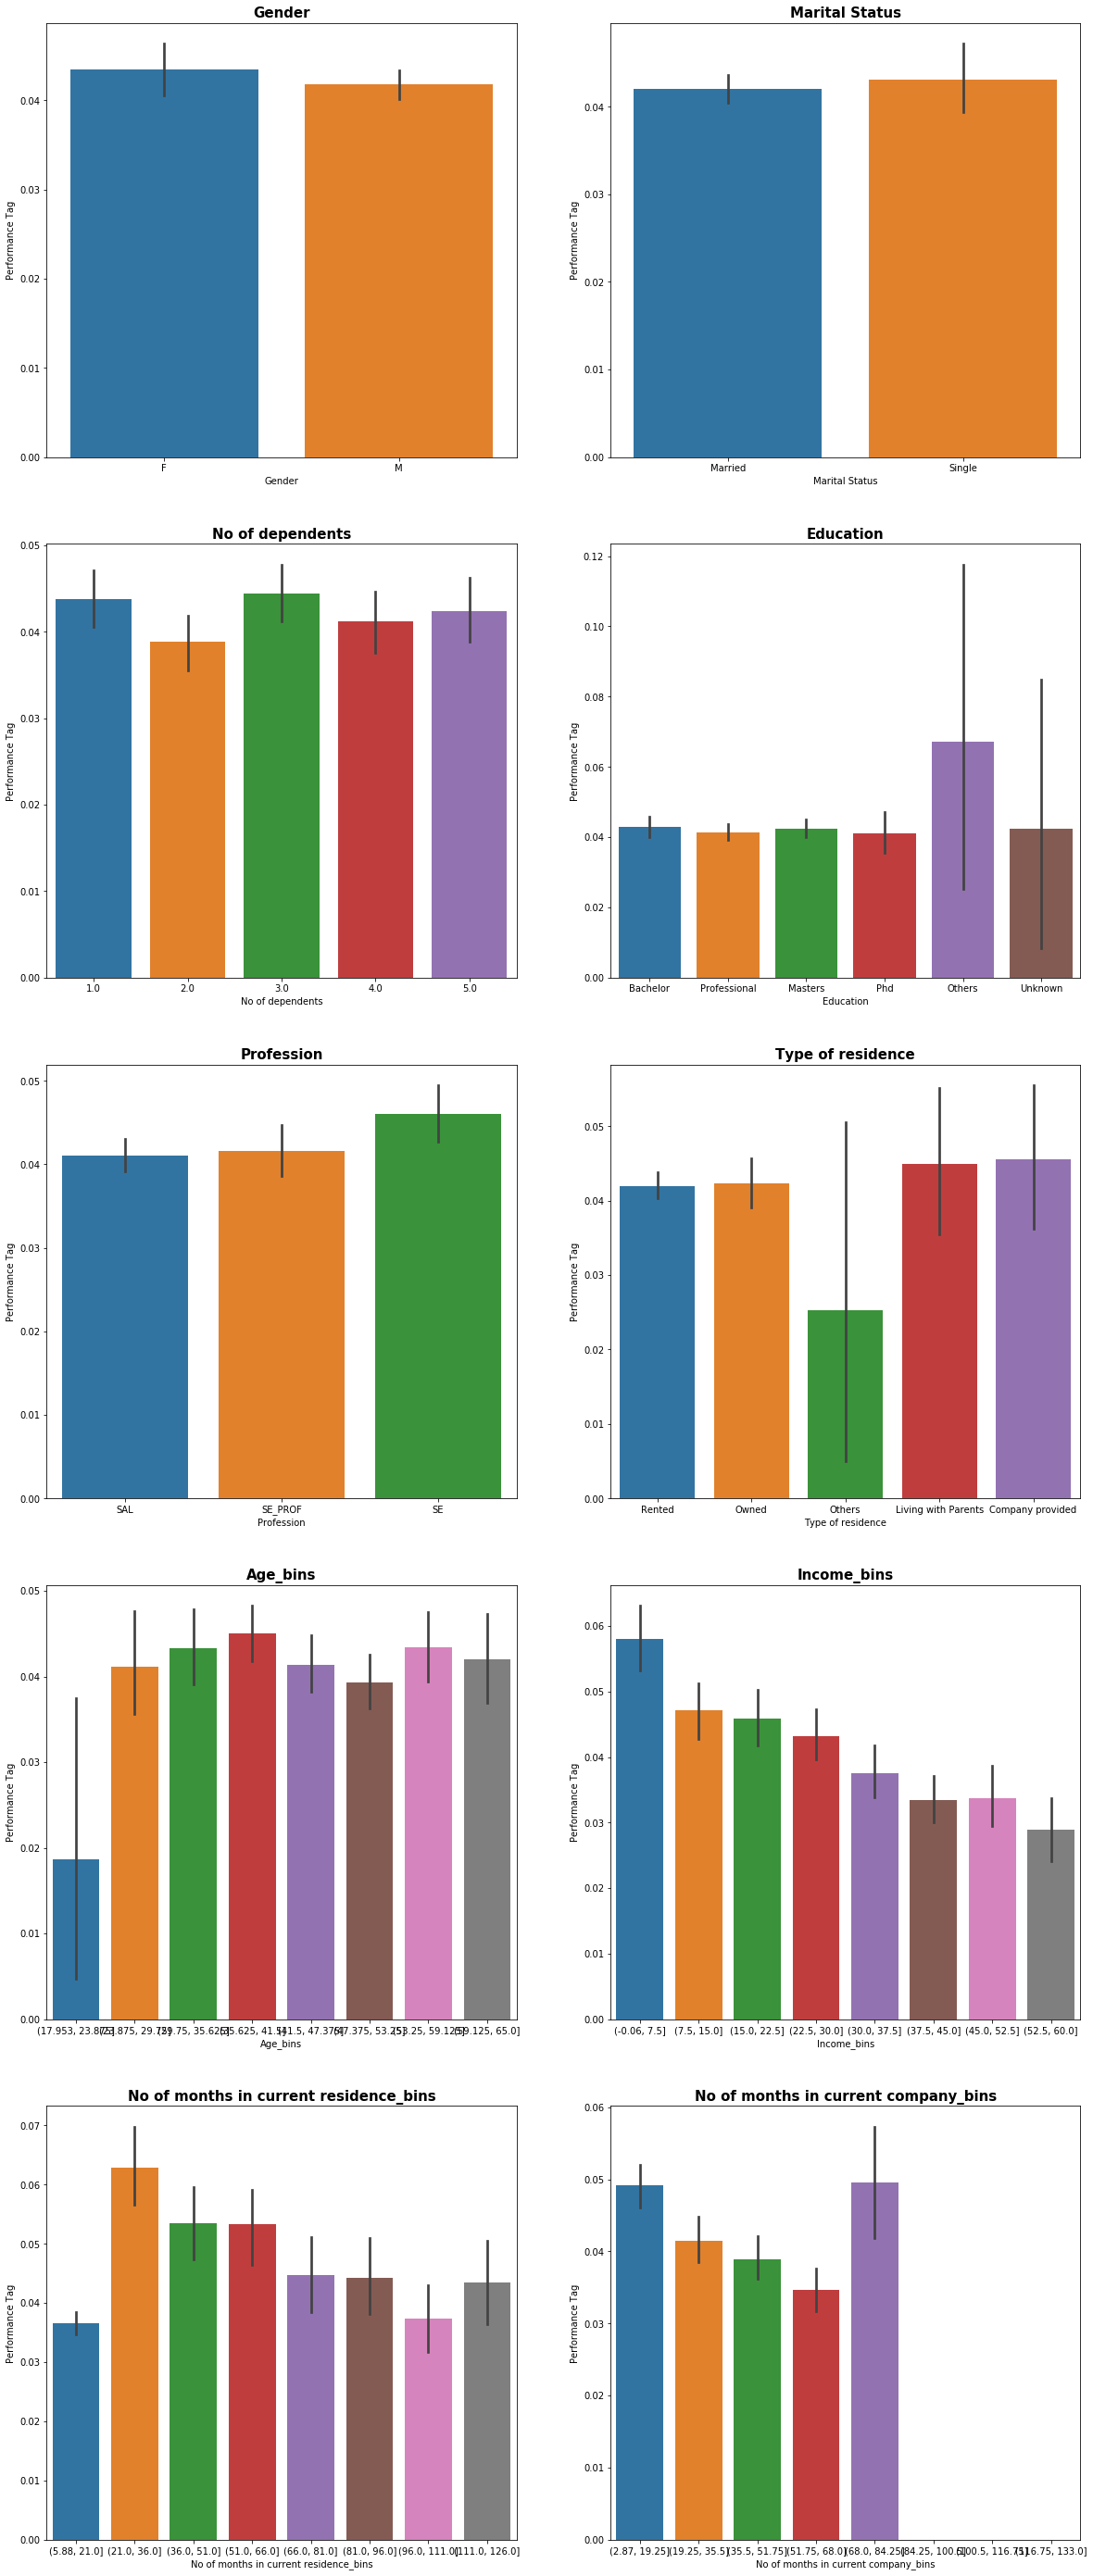

In [ ]:
# lets plot the target variable against availabe predictor variables
fig= plt.figure(figsize = (20,50))

# lets filter columns for which we want to see plots against the target variable
# lets remov application id, target variable, variables for which binning variable has been created
cols = demographic_eda.drop(["Application ID",
                             "Performance Tag",
                             "Age",
                             "Income",
                             "No of months in current residence",
                             "No of months in current company"], axis = 1)

i = 1
for col in cols:
    plt.subplot(5,2,i)
    bin_col = col + "_bins"
    if demographic_eda[col].nunique() > 15:
        sns.barplot(x = bin_col, y = "Performance Tag", data = demographic_eda) # plot for binned variables
    else:
        sns.barplot(x = col, y = "Performance Tag", data = demographic_eda) # plot for non-binned variables
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1

plt.show()

Above graphs demonstrates the relation of the targe variable with the predictor variables

In [ ]:
# function to calculate default rate for the variable passed and show them visually

def bivariate_plot(data,col):
    print("\nDifferent values for",col, "with count:\n",data[col].value_counts())
    fig = plt.figure(1,figsize=(12,8))
    agg_col = "agg_"+col
    # col vs default rate calculations
    No_of_prospect = data.groupby(col)['Performance Tag'].count().reset_index(name = 'No.of_prospect')
    count_prospects = data[data['Performance Tag']==1].groupby(col)['Performance Tag'].count().reset_index(name = 'count_prospects')
    agg_col = No_of_prospect.merge(count_prospects, on=col)
    agg_col['default_rate'] = 100*(agg_col['count_prospects']/agg_col['No.of_prospect']).round(3)
    # col vs default rate visualization
    ax = sns.barplot(x=col, y='default_rate', data=agg_col)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    for i in agg_col.index:
          plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_col['default_rate'][i].round(3))+' %',fontsize=15)
    plt.xlabel(col,fontsize = 25)
    plt.ylabel('Default Rate',fontsize = 25)

# display the dataframe created above
    agg_col


Different values for Gender with count:
 M    53361
F    16506
Name: Gender, dtype: int64


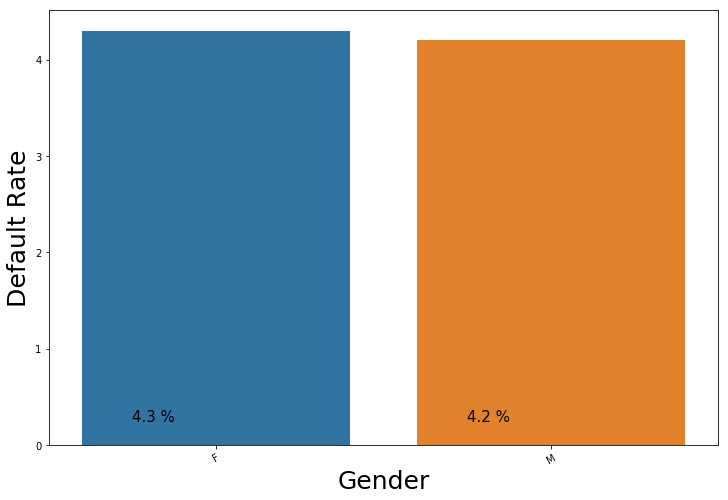

In [ ]:
# lets check the default rate for different values of Gender
bivariate_plot(demographic_eda,"Gender")

Even though % of males (76%) is much higher than % of females, Default rate is almost same for both male and female customers.


Different values for Age_bins with count:
 (35.625, 41.5]      14053
(41.5, 47.375]      13837
(47.375, 53.25]     13584
(53.25, 59.125]      9661
(29.75, 35.625]      8315
(59.125, 65.0]       5857
(23.875, 29.75]      4346
(17.953, 23.875]      214
Name: Age_bins, dtype: int64


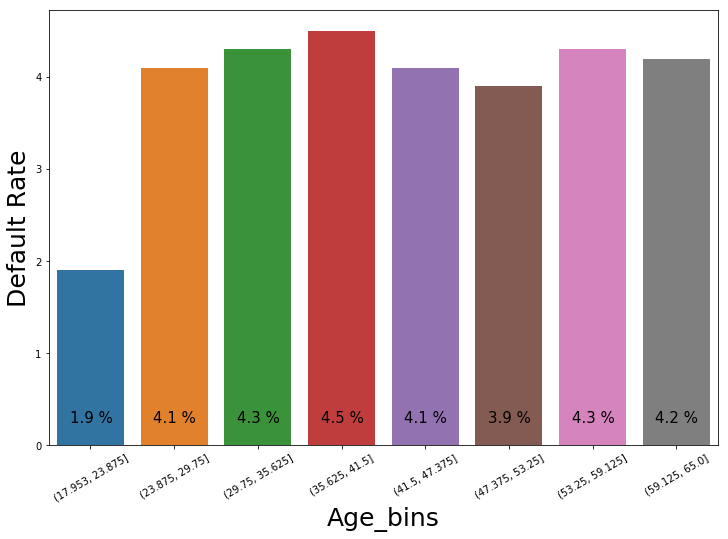

In [ ]:
# lets check the default rate for different values of Age bins
bivariate_plot(demographic_eda,"Age_bins")

Default rate for all the income bins is almost the same except for the first bin 18 to 24. Remember, no of customers belonging to the same category is also very low.


Different values for Marital Status with count:
 Married    59550
Single     10317
Name: Marital Status, dtype: int64


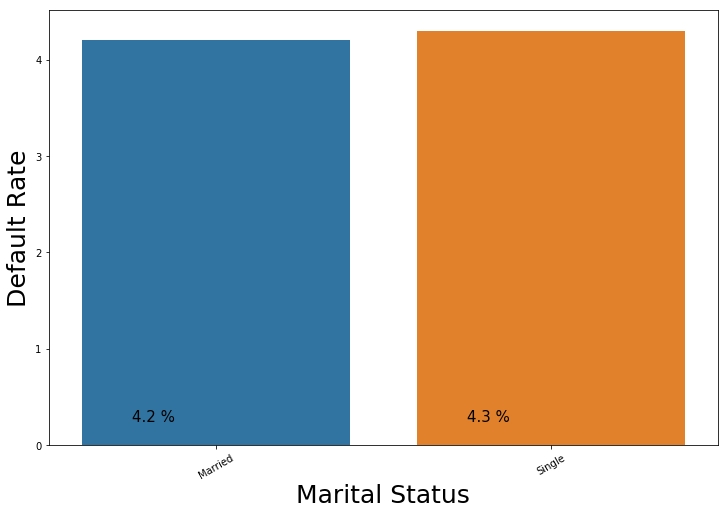

In [ ]:
# lets check the default rate for different values of Marital Status
bivariate_plot(demographic_eda,"Marital Status")

Even though % of married customers is much higher than % of unmarried customers, Default rate is almost same for both type of customers.


Different values for No of dependents with count:
 3.0    15648
1.0    15218
2.0    15128
4.0    11998
5.0    11875
Name: No of dependents, dtype: int64


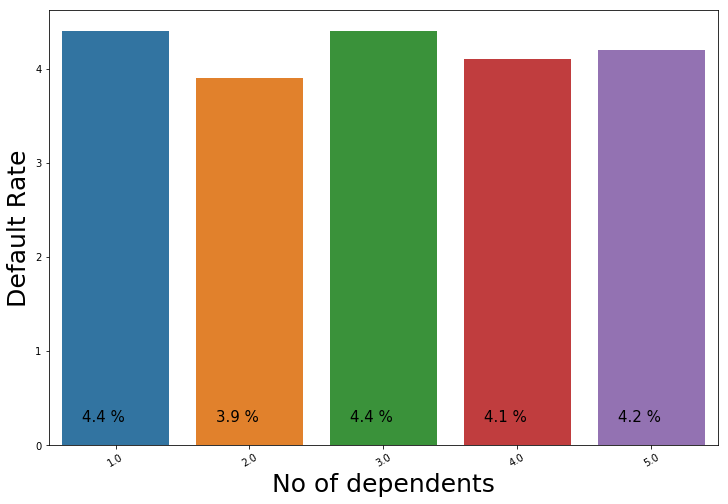

In [ ]:
# lets check the default rate for different values of no of dependents
bivariate_plot(demographic_eda,"No of dependents")

Above graph shows that the distribution for No of dependents is more or less equal in terms of percentage for values 1 to 5. However, customers with no of dependents as 2 shows lesser default rate in comparision to others.


Different values for Income_bins with count:
 (22.5, 30.0]    10927
(37.5, 45.0]    10535
(7.5, 15.0]     10509
(30.0, 37.5]     9635
(15.0, 22.5]     9512
(-0.06, 7.5]     8828
(45.0, 52.5]     5564
(52.5, 60.0]     4357
Name: Income_bins, dtype: int64


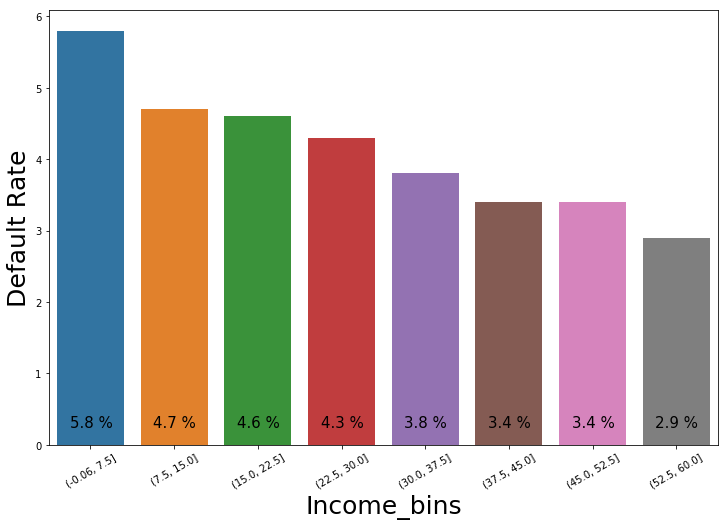

In [ ]:
# lets check the default rate for different values of Income bins
bivariate_plot(demographic_eda,"Income_bins")

Above graph shows default rate decreases with the rise in income levels.


Different values for Education with count:
 Professional    24384
Masters         23481
Bachelor        17302
Phd              4463
Others            119
Unknown           118
Name: Education, dtype: int64


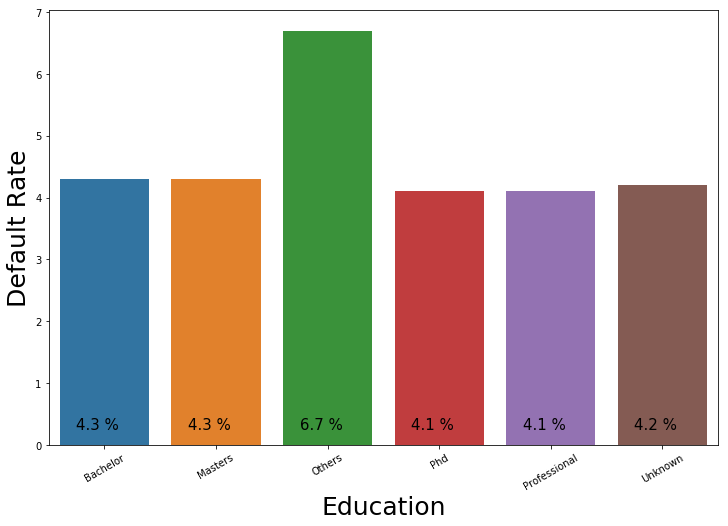

In [ ]:
# lets check the default rate for different values of Education
bivariate_plot(demographic_eda,"Education")

Default rate is for others is little higher than the other education types, but the population belongs to others category is very less.


Different values for Profession with count:
 SAL        39686
SE_PROF    16256
SE         13925
Name: Profession, dtype: int64


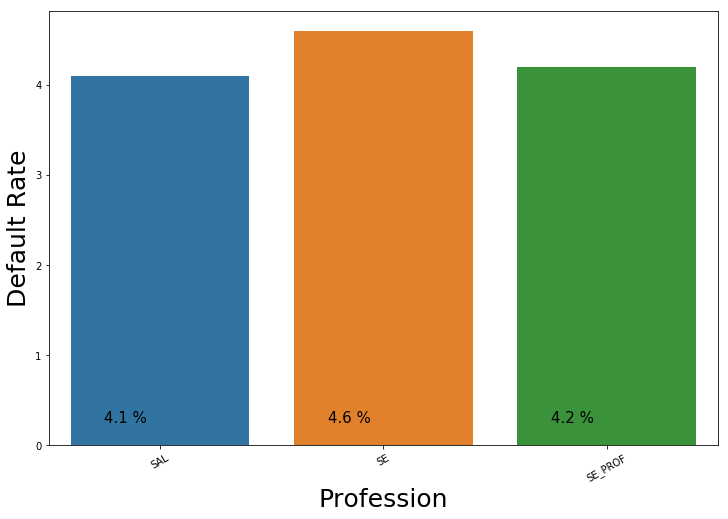

In [ ]:
# lets check the default rate for different values of Profession
bivariate_plot(demographic_eda,"Profession")

Even though % of salaried customers is much higher than % of other profession types, Default rate is almost same for SAL & SE_PROF, whereas it is slightly higher for profession type SE.


Different values for Type of residence with count:
 Rented                 52285
Owned                  14003
Living with Parents     1778
Company provided        1603
Others                   198
Name: Type of residence, dtype: int64


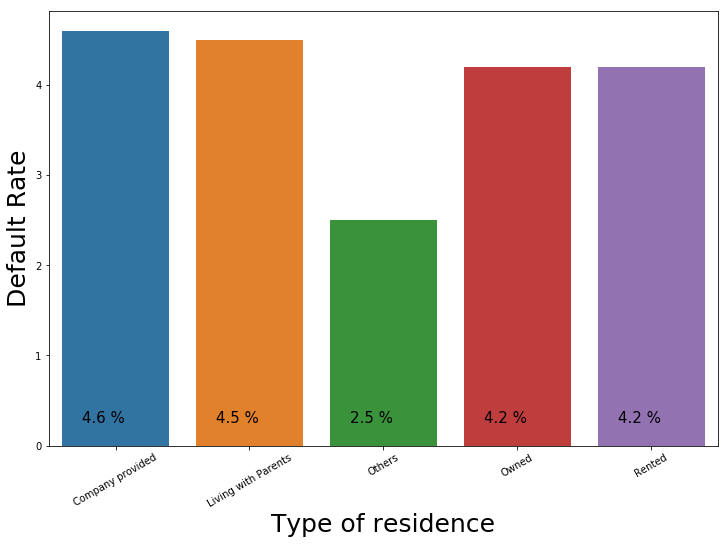

In [ ]:
# lets check the default rate for different values of Type of residence
bivariate_plot(demographic_eda,"Type of residence")

Default Rate is lowest for "Others" but it has very less no. of customers.
Default rate for all other types is almost the same.


Different values for No of months in current residence_bins with count:
 (5.88, 21.0]      39222
(21.0, 36.0]       5214
(36.0, 51.0]       5064
(51.0, 66.0]       4582
(66.0, 81.0]       4267
(96.0, 111.0]      4253
(81.0, 96.0]       4138
(111.0, 126.0]     3127
Name: No of months in current residence_bins, dtype: int64


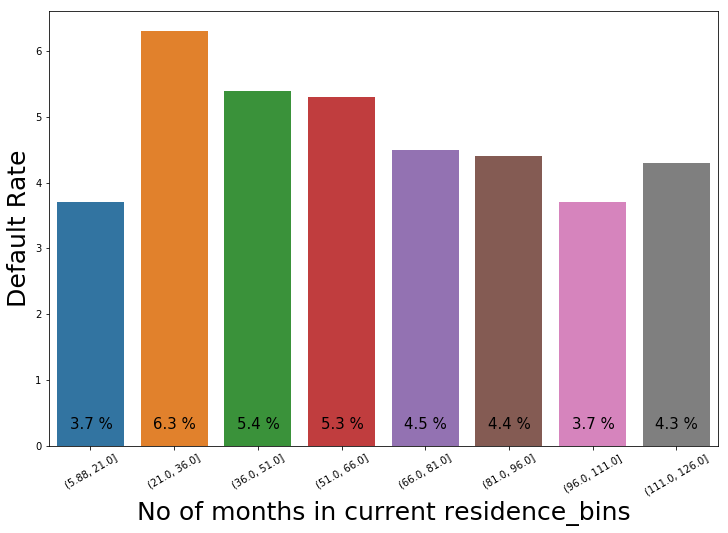

In [ ]:
# lets check the default rate for different values of No of months in current residence_bins
bivariate_plot(demographic_eda,"No of months in current residence_bins")

default rate for the initial bin(6 to 21) & bin(96 to 111) is the lowest.
default rate for the the bin 21 to 36 is the highest.
default rate for all other bins ranges from 4.4 to 5.4%


Different values for No of months in current company_bins with count:
 (2.87, 19.25]      20420
(35.5, 51.75]      16487
(19.25, 35.5]      16018
(51.75, 68.0]      13705
(68.0, 84.25]       3228
(116.75, 133.0]        5
(84.25, 100.5]         3
(100.5, 116.75]        1
Name: No of months in current company_bins, dtype: int64


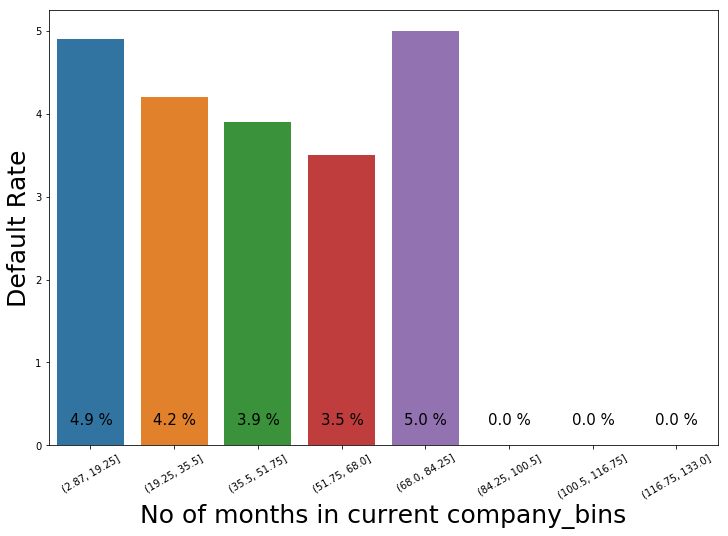

In [ ]:
# lets check the default rate for different values of No of months in current company_bins
bivariate_plot(demographic_eda,"No of months in current company_bins")

Default decreases as the no of months in the current company increases except for the last bin

# EDA for Credit Bureau Dataset

In [ ]:
# lets create a copy of the demographic dataset to perform EDA
creditbureau_eda = pd.DataFrame(creditbureau).copy()


Different values for Performance Tag with count:
 0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64


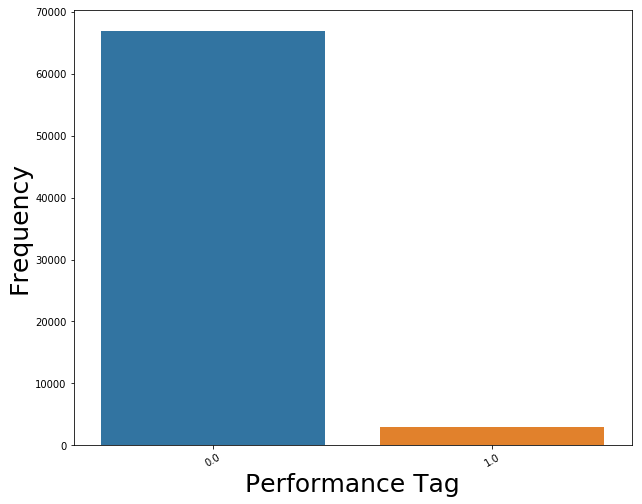

In [ ]:
univariate_plot(creditbureau_eda,"Performance Tag")

In [ ]:
# percentage of defaulters

print("Percentage of Defaulters in creditbureau dataset:",(creditbureau_eda['Performance Tag'].sum()/creditbureau_eda['Performance Tag'].count())*100)

Percentage of Defaulters in creditbureau dataset: 4.218014227031359


In [ ]:
# lets check the type of variables present in the dataset
creditbureau_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     69867 non-null int64
No of times 90 DPD or worse in last 6 months                       69867 non-null int64
No of times 60 DPD or worse in last 6 months                       69867 non-null int64
No of times 30 DPD or worse in last 6 months                       69867 non-null int64
No of times 90 DPD or worse in last 12 months                      69867 non-null int64
No of times 60 DPD or worse in last 12 months                      69867 non-null int64
No of times 30 DPD or worse in last 12 months                      69867 non-null int64
Avgas CC Utilization in last 12 months                             69867 non-null float64
No of trades opened in last 6 months                               69867 non-null float64
No of trades opened in last 12 months                              69867 non-null int64
No of P

### Observation:
Creditbureau dataset contains only numeric variables

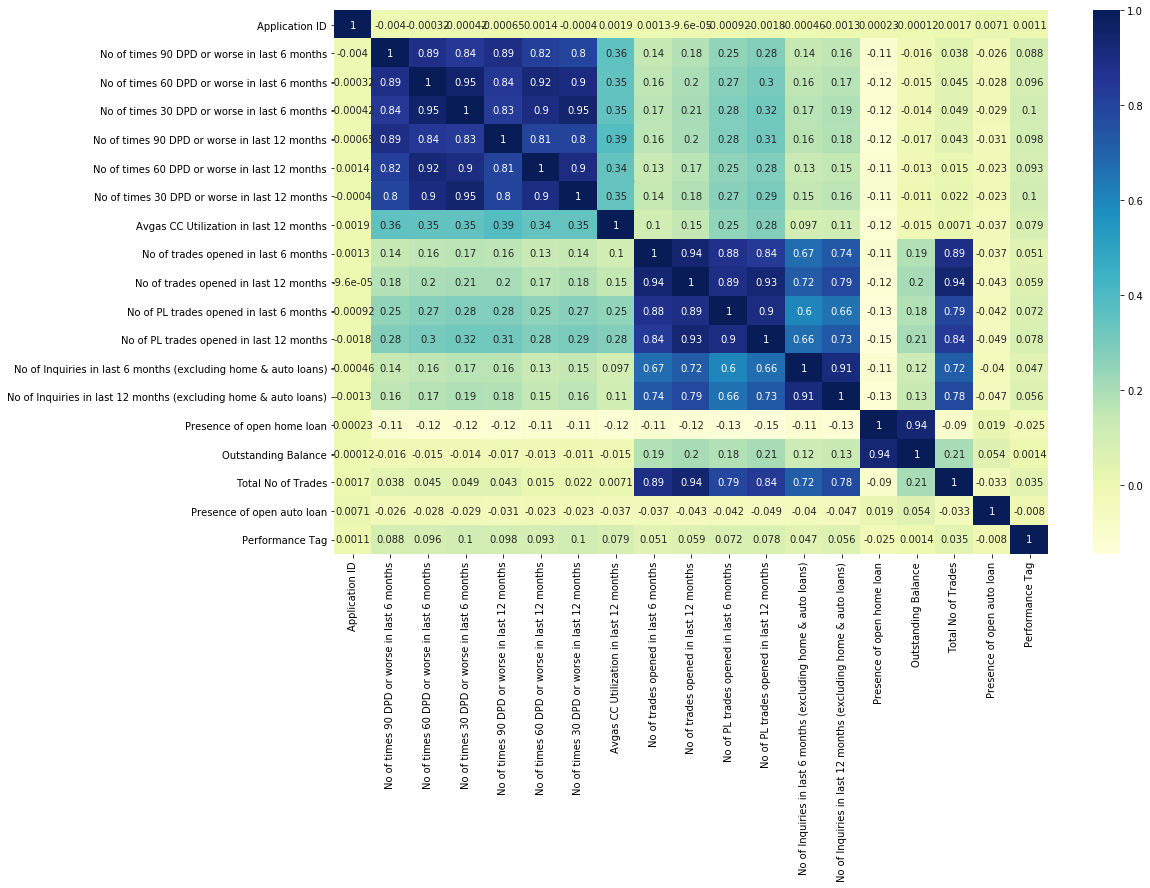

In [ ]:
#Correlations of only numerical data
plt.figure(figsize = (16, 10))
sns.heatmap(creditbureau[creditbureau_eda.columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

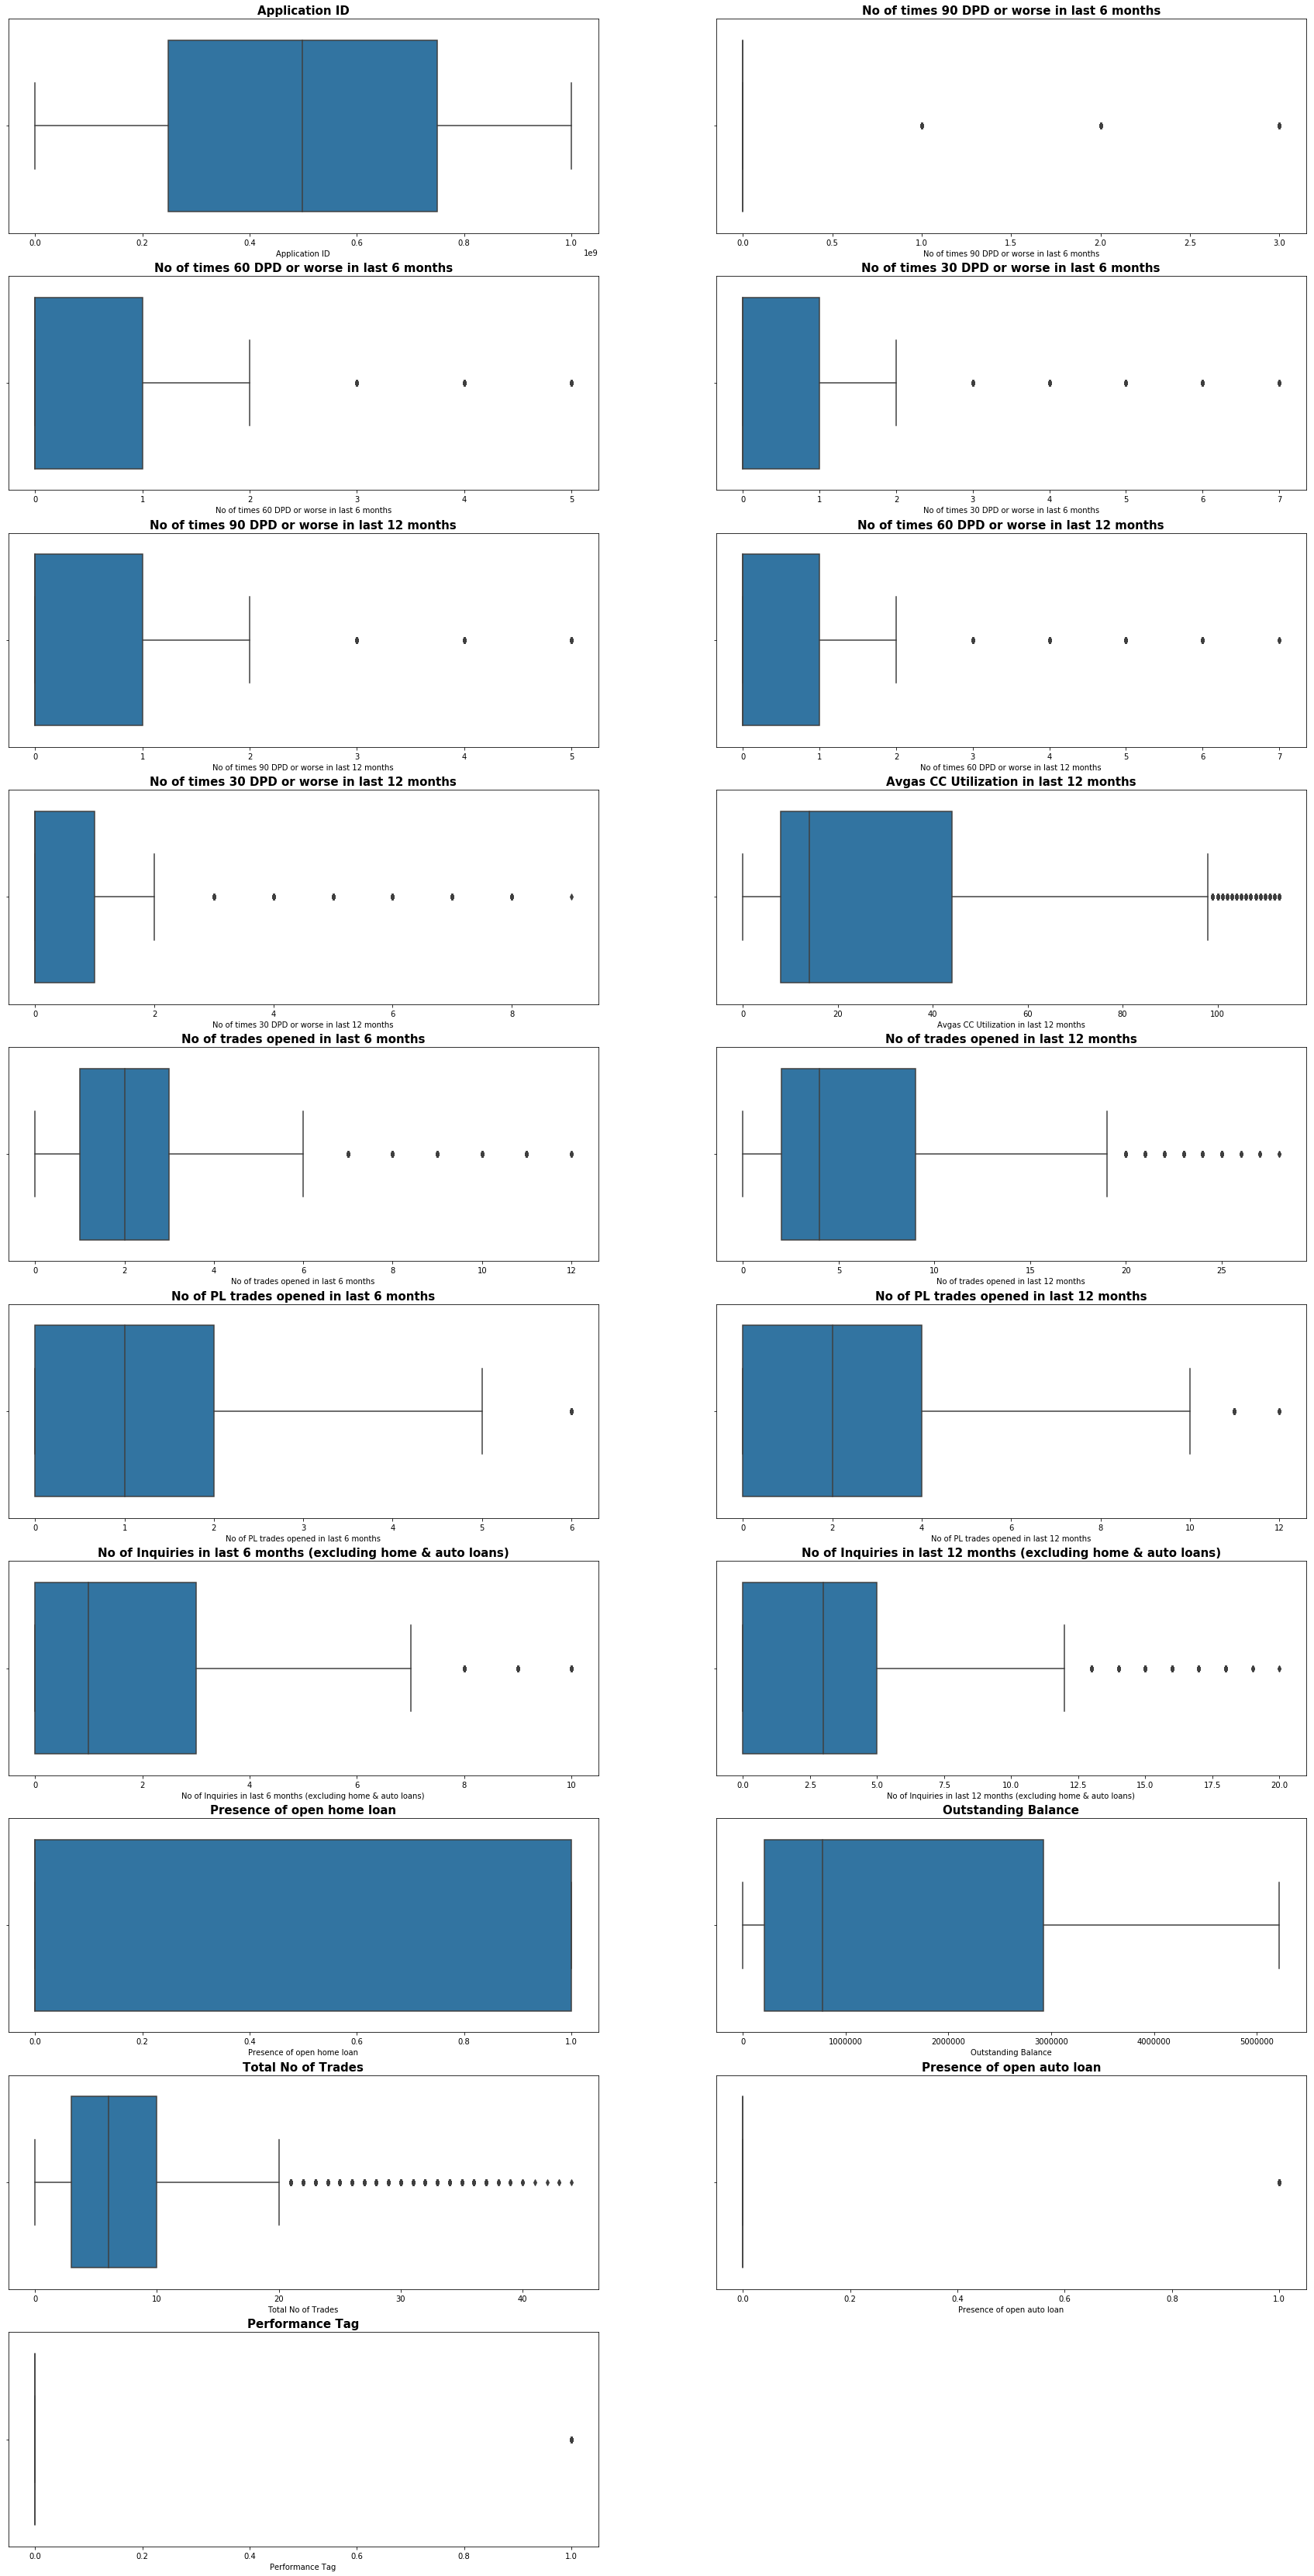

In [ ]:
# lets check for outliers in the creditbureau dataset
fig= plt.figure(figsize = (30,60))

i = 1
for col in creditbureau_eda.columns:
    plt.subplot(10,2,i)
    sns.boxplot(creditbureau_eda[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1

plt.show()

In [ ]:
#Above graph shows a possibility of some outliers in the dataset, lets take a closer look

for col in creditbureau.columns:
    print("Describe Variable",col,":\n",creditbureau[col].describe(),"\n")

Describe Variable Application ID :
 count    6.986700e+04
mean     4.992179e+08
std      2.885551e+08
min      1.004500e+05
25%      2.485673e+08
50%      4.980015e+08
75%      7.498625e+08
max      1.000084e+09
Name: Application ID, dtype: float64 

Describe Variable No of times 90 DPD or worse in last 6 months :
 count    69867.000000
mean         0.248973
std          0.505659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: No of times 90 DPD or worse in last 6 months, dtype: float64 

Describe Variable No of times 60 DPD or worse in last 6 months :
 count    69867.000000
mean         0.391673
std          0.771887
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: No of times 60 DPD or worse in last 6 months, dtype: float64 

Describe Variable No of times 30 DPD or worse in last 6 months :
 count    69867.000000
mean         0.523495
std          1.00

By closely reviewing above data, we can conclude that there are no outliers present in the dataset and the data looks pretty much realistic.


Different values for No of times 90 DPD or worse in last 6 months with count:
 0    54664
1    13219
2     1776
3      208
Name: No of times 90 DPD or worse in last 6 months, dtype: int64


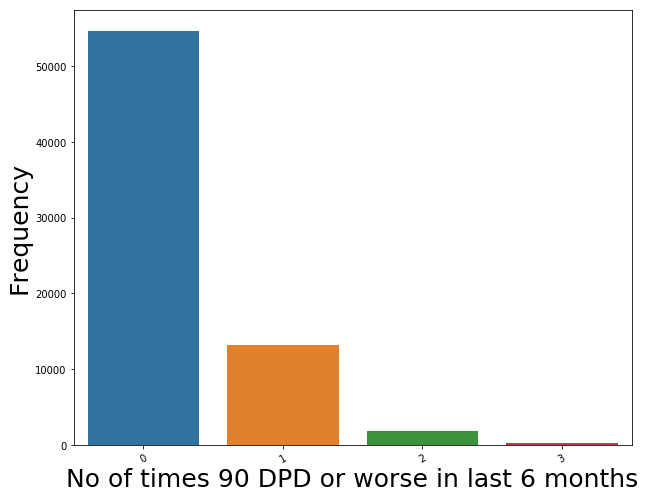

In [ ]:
# Univariate Analysis for No of times 90 DPD or worse in last 6 months
univariate_plot(creditbureau_eda, "No of times 90 DPD or worse in last 6 months")

Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 90 DPD)


Different values for No of times 60 DPD or worse in last 6 months with count:
 0    51870
1    11130
2     4917
3     1469
4      411
5       70
Name: No of times 60 DPD or worse in last 6 months, dtype: int64


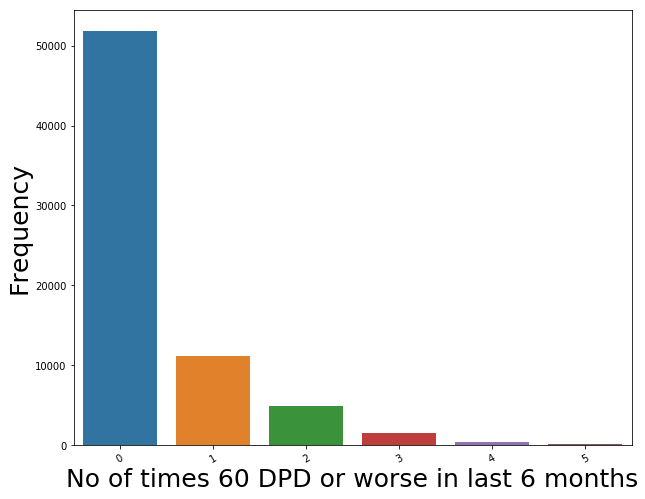

In [ ]:
# Univariate Analysis for No of times 60 DPD or worse in last 6 months
univariate_plot(creditbureau_eda, "No of times 60 DPD or worse in last 6 months")

Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 60 DPD)


Different values for No of times 30 DPD or worse in last 6 months with count:
 0    50098
1     9500
2     5897
3     2830
4     1045
5      386
6       96
7       15
Name: No of times 30 DPD or worse in last 6 months, dtype: int64


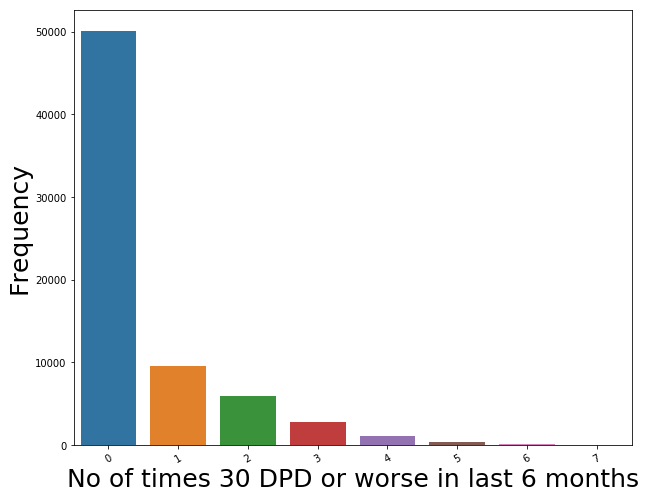

In [ ]:
# Univariate Analysis for No of times 30 DPD or worse in last 6 months
univariate_plot(creditbureau_eda, "No of times 30 DPD or worse in last 6 months")

Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 30 DPD)


Different values for No of times 90 DPD or worse in last 12 months with count:
 0    50492
1    11663
2     6160
3     1244
4      272
5       36
Name: No of times 90 DPD or worse in last 12 months, dtype: int64


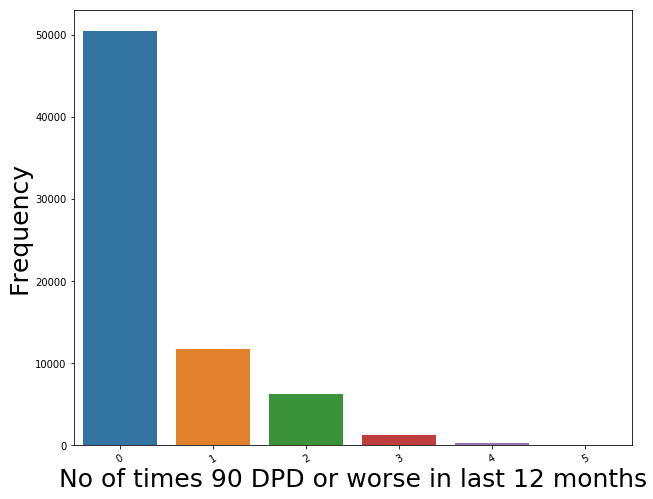

In [ ]:
# Univariate Analysis for No of times 90 DPD or worse in last 12 months
univariate_plot(creditbureau_eda, "No of times 90 DPD or worse in last 12 months")

Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 90 DPD)


Different values for No of times 60 DPD or worse in last 12 months with count:
 0    45868
1    12816
2     6414
3     3205
4     1048
5      398
6      111
7        7
Name: No of times 60 DPD or worse in last 12 months, dtype: int64


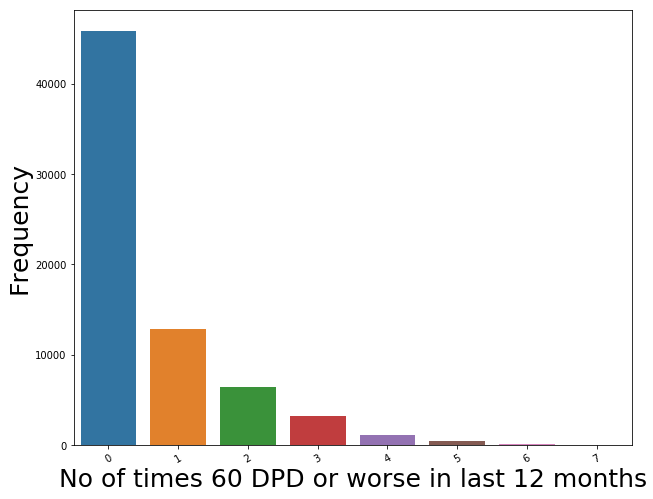

In [ ]:
# Univariate Analysis for No of times 60 DPD or worse in last 12 months
univariate_plot(creditbureau_eda, "No of times 60 DPD or worse in last 12 months")

Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 60 DPD)


Different values for No of times 30 DPD or worse in last 12 months with count:
 0    44857
1    11474
2     6116
3     4136
4     1924
5      853
6      376
7      107
8       23
9        1
Name: No of times 30 DPD or worse in last 12 months, dtype: int64


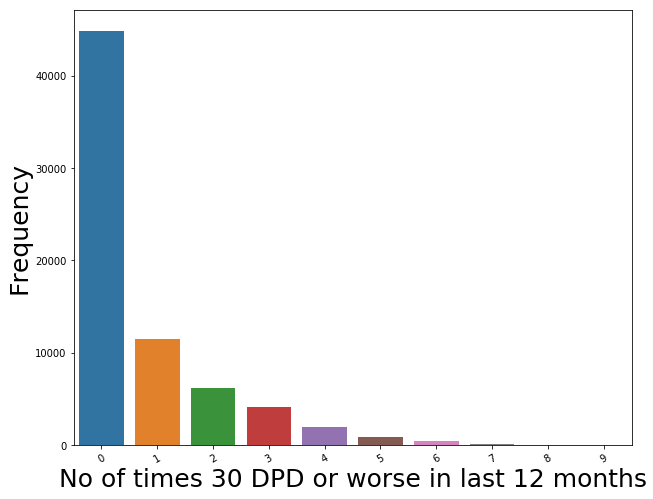

In [ ]:
# Univariate Analysis for No of times 30 DPD or worse in last 12 months
univariate_plot(creditbureau_eda, "No of times 30 DPD or worse in last 12 months")

Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 30 DPD)

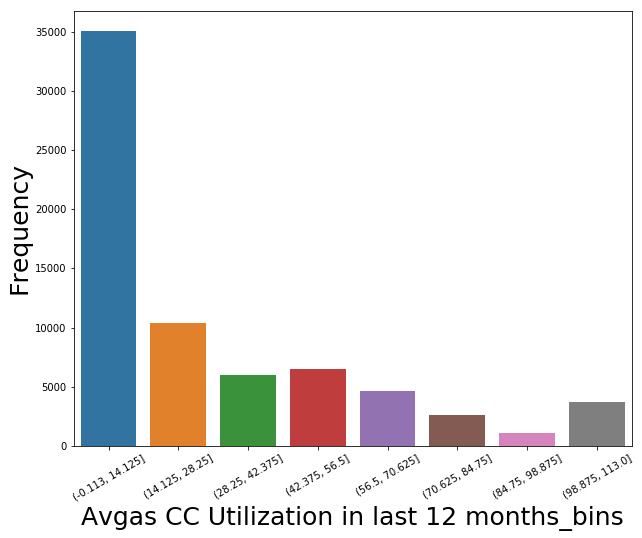

In [ ]:
# Univariate Analysis for Avgas CC Utilization in last 12 months
univariate_plot(creditbureau_eda, "Avgas CC Utilization in last 12 months")

Above graph indicates that as the value of the said field increases, frequency of the customers belonging to that bin decreases.


Different values for No of trades opened in last 6 months with count:
 1.0     20122
0.0     12194
2.0     12116
3.0      9402
4.0      6297
5.0      3665
6.0      2336
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: No of trades opened in last 6 months, dtype: int64


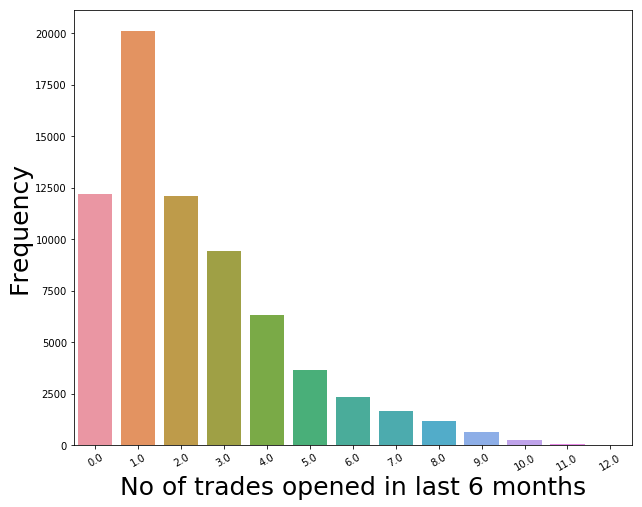

In [ ]:
# Univariate Analysis for No of trades opened in last 6 months
univariate_plot(creditbureau_eda, "No of trades opened in last 6 months")

Most of the customers have value 1, significant customers have 0, 2, 3 trades opened. rest are low in numbers

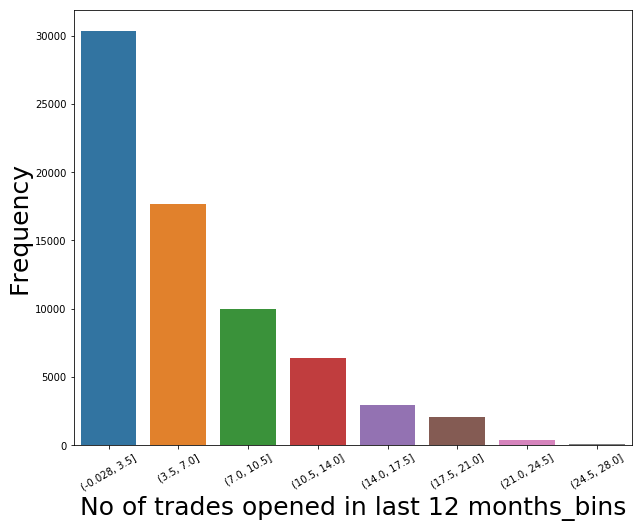

In [ ]:
# Univariate Analysis for No of trades opened in last 12 months
univariate_plot(creditbureau_eda, "No of trades opened in last 12 months")

As the value of the said field increases frequency of the customers decreases.


Different values for No of PL trades opened in last 6 months with count:
 0    31080
1    13546
2    12565
3     7949
4     3341
5     1090
6      296
Name: No of PL trades opened in last 6 months, dtype: int64


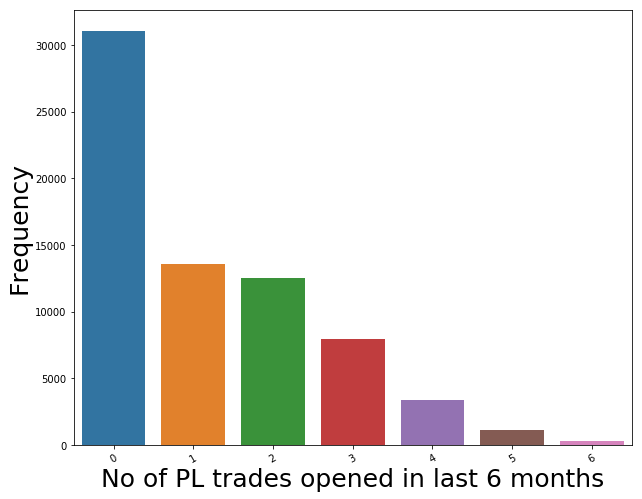

In [ ]:
# Univariate Analysis for No of PL trades opened in last 6 months
univariate_plot(creditbureau_eda, "No of PL trades opened in last 6 months")

Frequency of no. of pl trade opened in the last 6 months decreases as the value of the said field increases.


Different values for No of PL trades opened in last 12 months with count:
 0     25824
3      8130
4      7903
2      6830
1      6641
5      6189
6      4023
7      2223
8      1172
9       601
10      255
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64


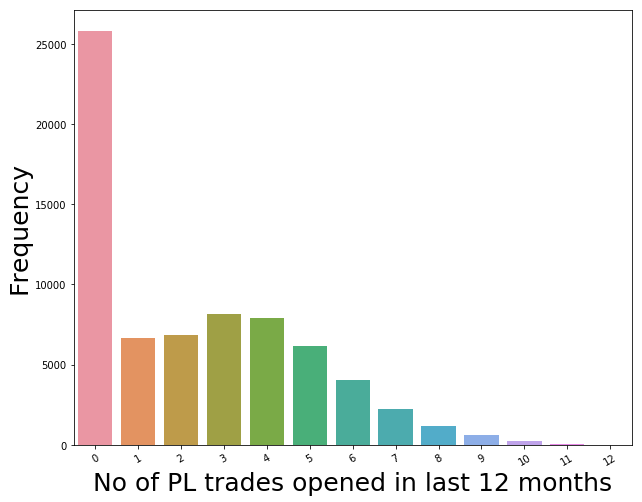

In [ ]:
# Univariate Analysis for No of PL trades opened in last 12 months
univariate_plot(creditbureau_eda, "No of PL trades opened in last 12 months")

Frequency of no. of pl trade opened in the last 12 months decreases as the value of the said field increases.


Different values for No of Inquiries in last 6 months (excluding home & auto loans) with count:
 0     25069
1     13175
2     12831
3      7258
4      4248
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64


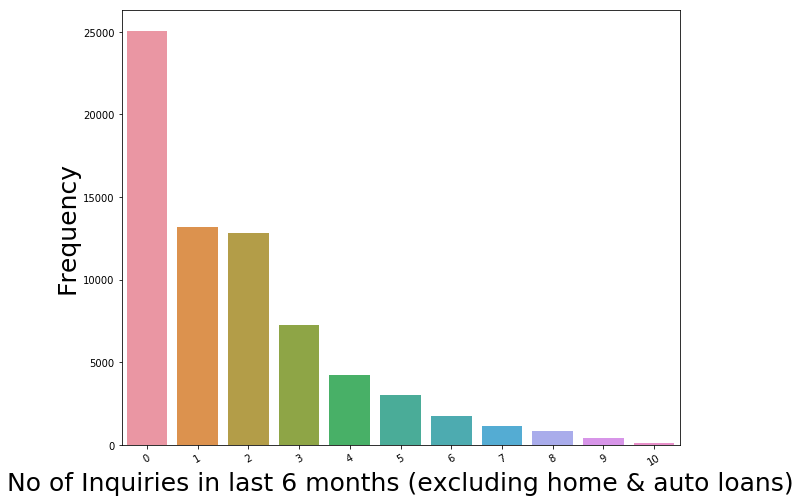

In [ ]:
# Univariate Analysis for No of Inquiries in last 6 months (excluding home & auto loans)
univariate_plot(creditbureau_eda, "No of Inquiries in last 6 months (excluding home & auto loans)")

Frequency of the said field decreases as its value increases.

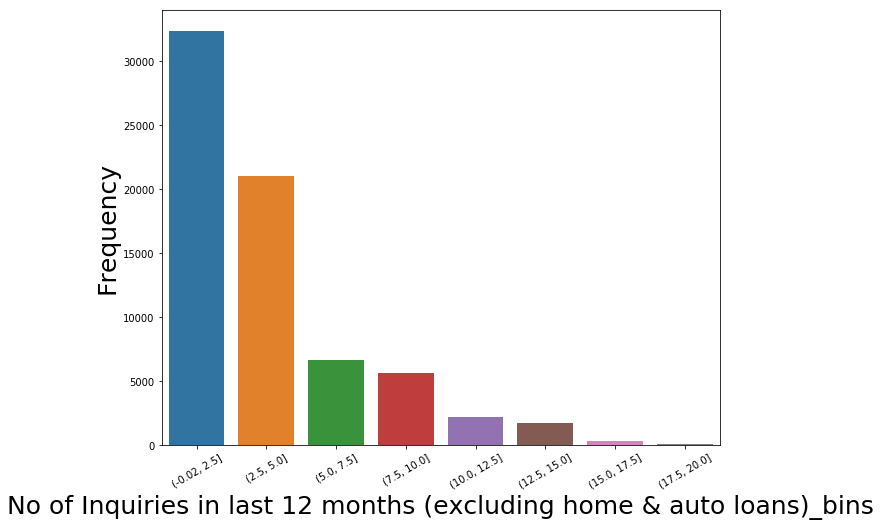

In [ ]:
# Univariate Analysis for No of Inquiries in last 12 months (excluding home & auto loans)
univariate_plot(creditbureau_eda, "No of Inquiries in last 12 months (excluding home & auto loans)")

Frequency of the said field decreases as its value increases.


Different values for Presence of open home loan with count:
 0.0    51796
1.0    18071
Name: Presence of open home loan, dtype: int64


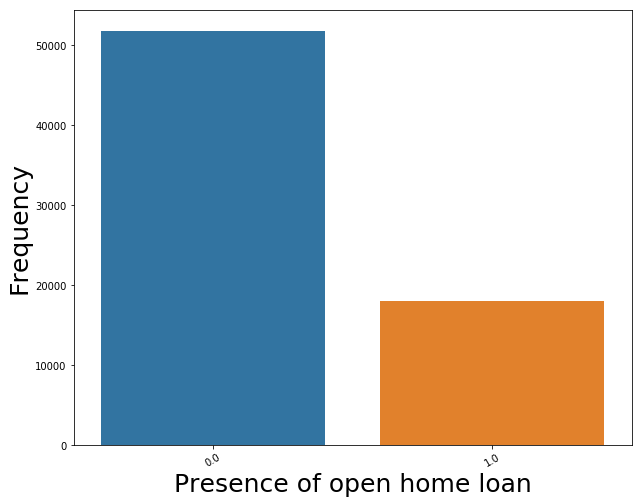

In [ ]:
# Univariate Analysis for Presence of open home loan
univariate_plot(creditbureau_eda, "Presence of open home loan")

Majority of the customers do not have any open home loan

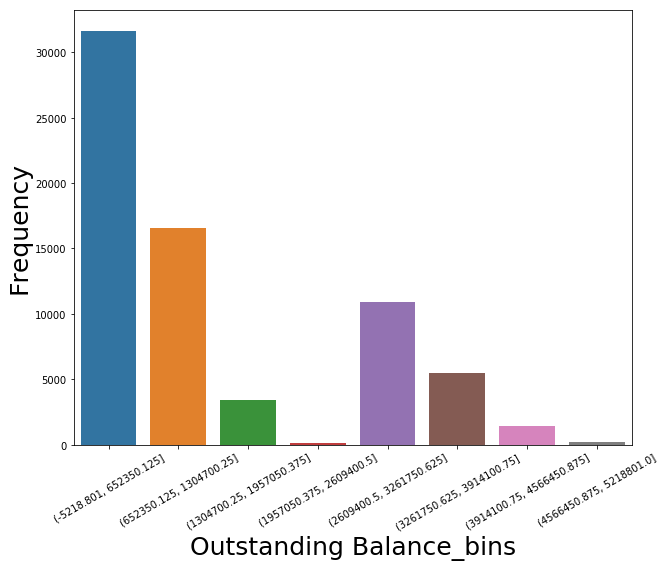

In [ ]:
# Univariate Analysis for Outstanding Balance
univariate_plot(creditbureau_eda, "Outstanding Balance")

Majority of the customers belongs to the 1st bin.

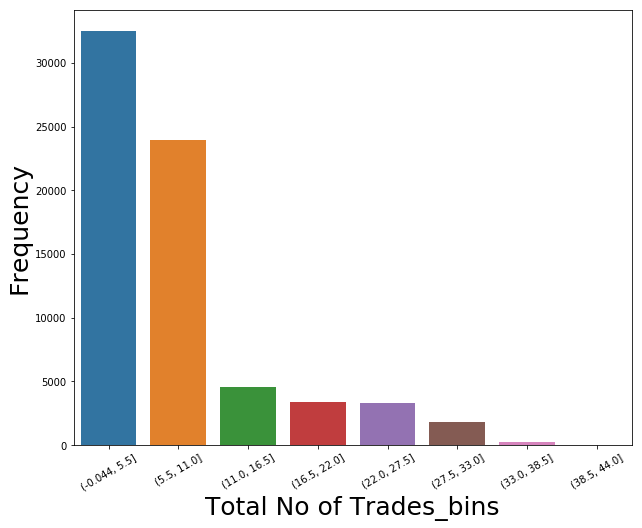

In [ ]:
# Univariate Analysis for Total No of Trades
univariate_plot(creditbureau_eda, "Total No of Trades")

Majority of the customers belongs to the first 2 bins.


Different values for Presence of open auto loan with count:
 0    63937
1     5930
Name: Presence of open auto loan, dtype: int64


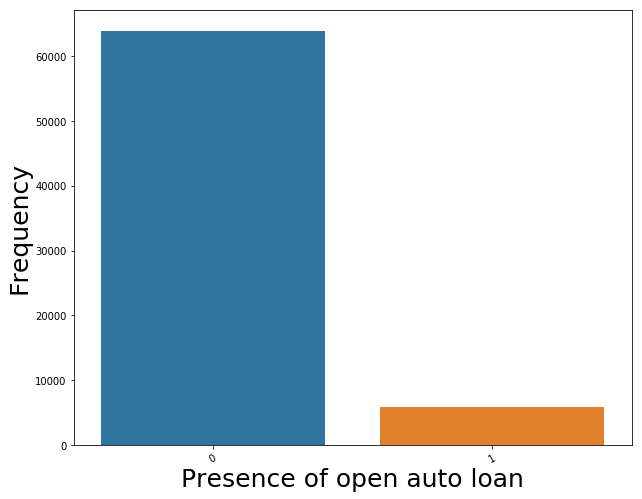

In [ ]:
# Univariate Analysis for Presence of open auto loan
univariate_plot(creditbureau_eda, "Presence of open auto loan")

Most customers do not have any open home loan or auto loan

## Bivariate analysis for Credit Bureau data set

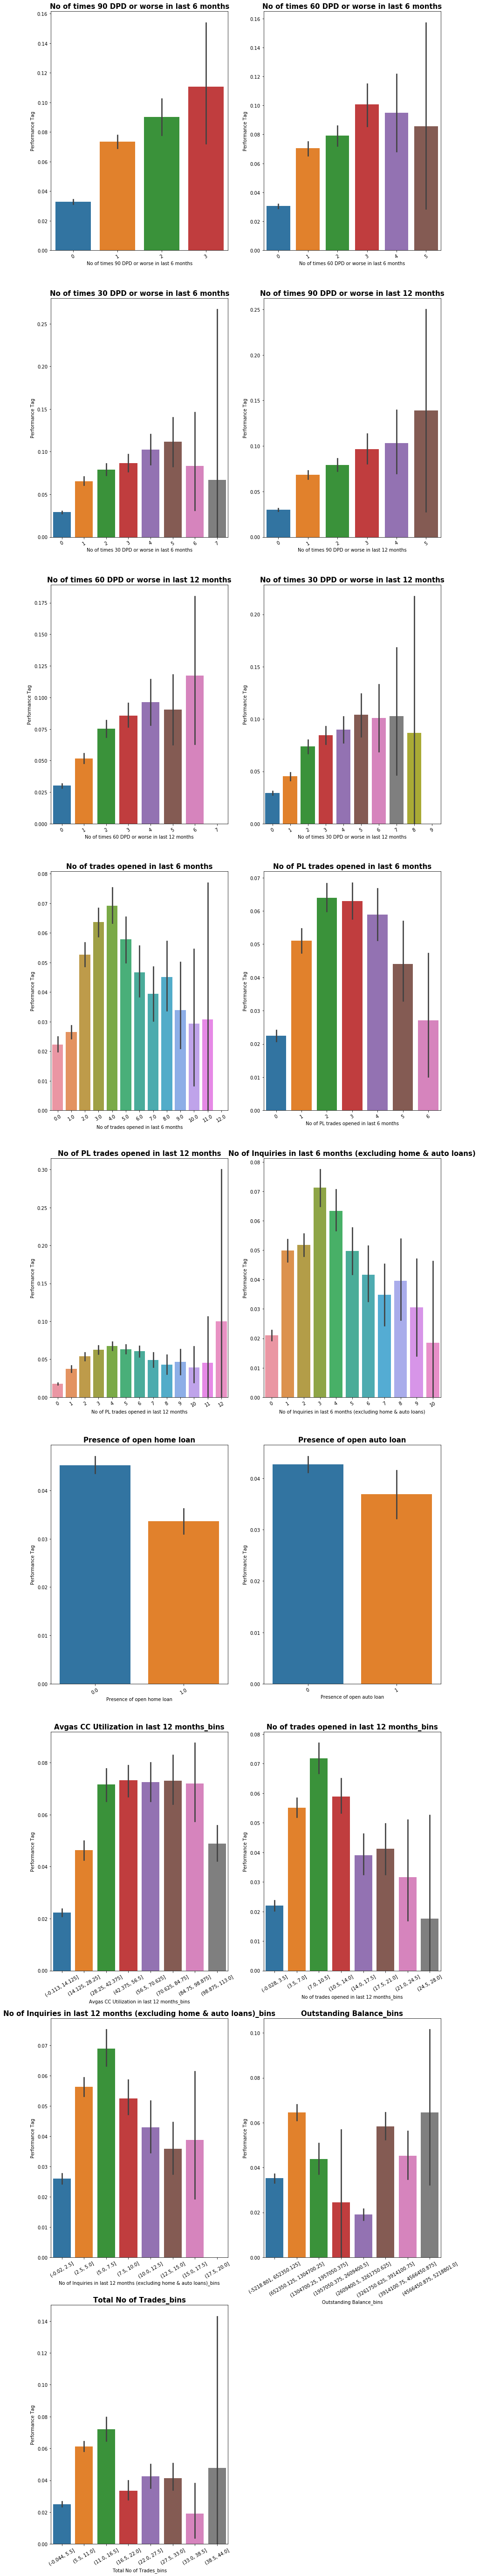

In [ ]:
# lets plot the target variable against availabe predictor variables
fig= plt.figure(figsize = (15,100))

# lets filter columns for which we want to see plots against the target variable
# lets remov application id, target variable, variables for which binning variable has been created
cols = creditbureau_eda.drop(["Application ID",
                              "Performance Tag",
                              "Avgas CC Utilization in last 12 months",
                              "No of trades opened in last 12 months",
                              "No of Inquiries in last 12 months (excluding home & auto loans)",
                              "Outstanding Balance",
                              "Total No of Trades"], axis = 1)

i = 1
for col in cols:
    plt.subplot(9,2,i)
    bin_col = col + "_bins"
    if creditbureau_eda[col].nunique() > 15:
        sns.barplot(x = bin_col, y = "Performance Tag", data = creditbureau_eda) # plot for binned variables
    else:
        sns.barplot(x = col, y = "Performance Tag", data = creditbureau_eda) # plot for non-binned variables
    plt.title(col,fontsize = 15,fontweight='bold')
    xticks(rotation = 30)
    i = i + 1

plt.show()

Above graphs demonstrates the relation of the target variable (Performance Tag) with the different predictor variables.


Different values for No of times 90 DPD or worse in last 6 months with count:
 0    54664
1    13219
2     1776
3      208
Name: No of times 90 DPD or worse in last 6 months, dtype: int64


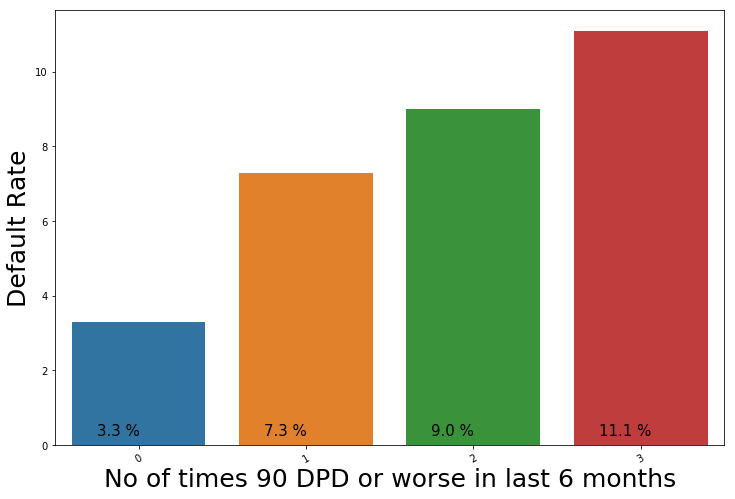

In [ ]:
# Now lets check the relation between the default rate (calculated in the function defined) and different features

# Default Rate vs No of  90 DPD or worse in last 6 monthss
bivariate_plot(creditbureau_eda,"No of times 90 DPD or worse in last 6 months")

Default rate increases as the value of the said field increases.


Different values for No of times 60 DPD or worse in last 6 months with count:
 0    51870
1    11130
2     4917
3     1469
4      411
5       70
Name: No of times 60 DPD or worse in last 6 months, dtype: int64


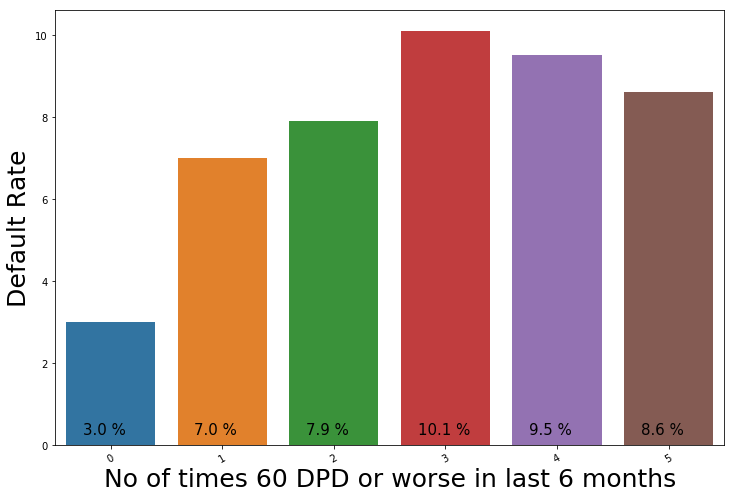

In [ ]:
# Default Rate vs No of  60 DPD or worse in last 6 monthss
bivariate_plot(creditbureau_eda,"No of times 60 DPD or worse in last 6 months")

Default rate increases as the value of the said field increases except for the values 4 & 5.


Different values for No of times 30 DPD or worse in last 6 months with count:
 0    50098
1     9500
2     5897
3     2830
4     1045
5      386
6       96
7       15
Name: No of times 30 DPD or worse in last 6 months, dtype: int64


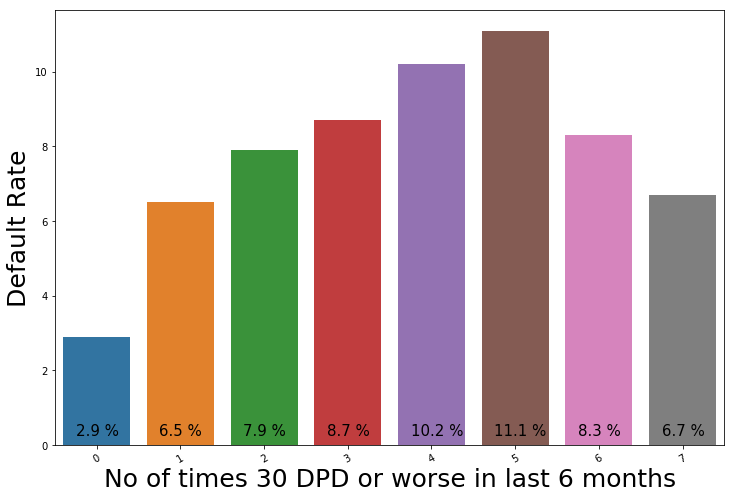

In [ ]:
# Default Rate vs No of  30 DPD or worse in last 6 monthss
bivariate_plot(creditbureau_eda,"No of times 30 DPD or worse in last 6 months")

Default rate increases as the value of the said field increases except for the last 2 values 6 & 7


Different values for No of times 90 DPD or worse in last 12 months with count:
 0    50492
1    11663
2     6160
3     1244
4      272
5       36
Name: No of times 90 DPD or worse in last 12 months, dtype: int64


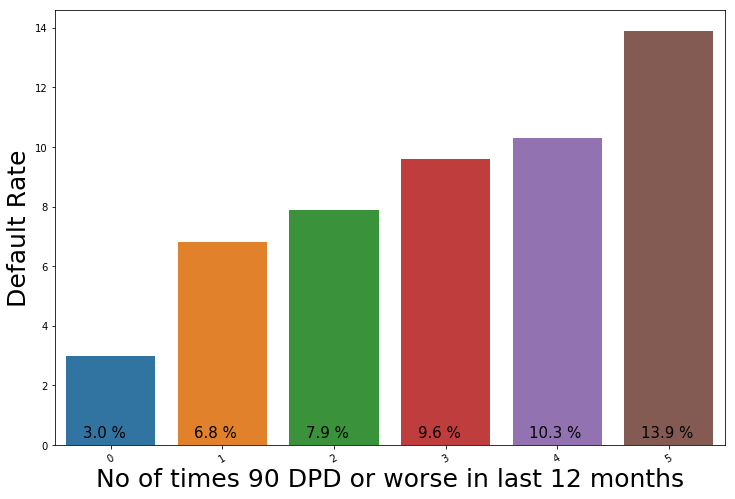

In [ ]:
# Default Rate vs No of  90 DPD or worse in last 12 monthss
bivariate_plot(creditbureau_eda,"No of times 90 DPD or worse in last 12 months")

Default rate increases as the value of the said field increases


Different values for No of times 60 DPD or worse in last 12 months with count:
 0    45868
1    12816
2     6414
3     3205
4     1048
5      398
6      111
7        7
Name: No of times 60 DPD or worse in last 12 months, dtype: int64


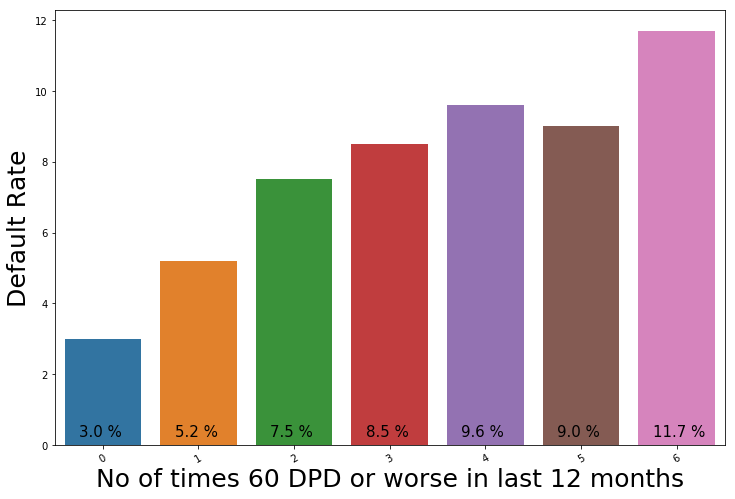

In [ ]:
#performace vs No of  60 DPD or worse in last 12 monthss
bivariate_plot(creditbureau_eda,"No of times 60 DPD or worse in last 12 months")

Default rate increases as the value of the said field increases


Different values for No of times 30 DPD or worse in last 12 months with count:
 0    44857
1    11474
2     6116
3     4136
4     1924
5      853
6      376
7      107
8       23
9        1
Name: No of times 30 DPD or worse in last 12 months, dtype: int64


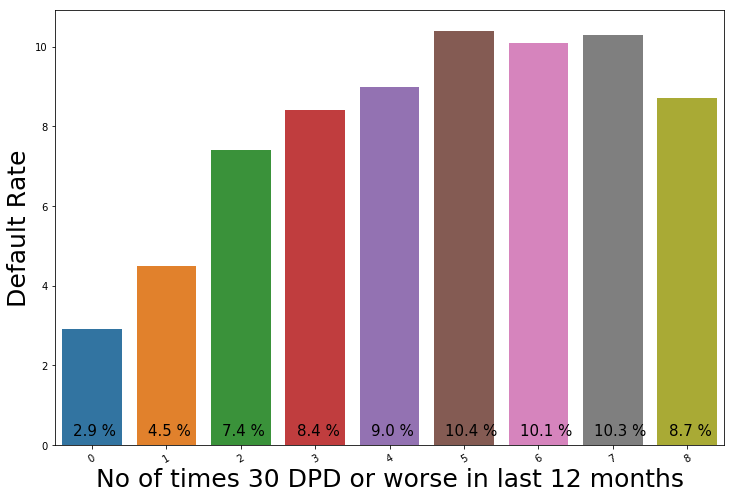

In [ ]:
#performace vs No of  30 DPD or worse in last 12 monthss
bivariate_plot(creditbureau_eda,"No of times 30 DPD or worse in last 12 months")

Default rate increases as the value of the said field increases with few exceptions.


Different values for Avgas CC Utilization in last 12 months_bins with count:
 (-0.113, 14.125]    35079
(14.125, 28.25]     10373
(42.375, 56.5]       6456
(28.25, 42.375]      5995
(56.5, 70.625]       4663
(98.875, 113.0]      3702
(70.625, 84.75]      2571
(84.75, 98.875]      1028
Name: Avgas CC Utilization in last 12 months_bins, dtype: int64


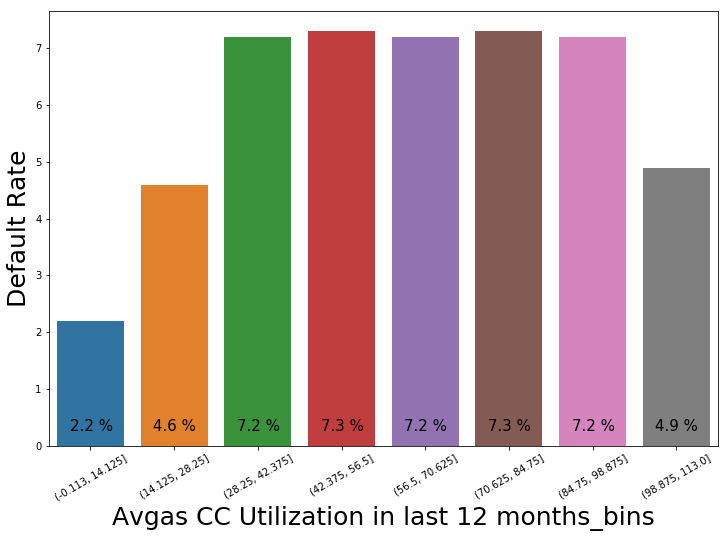

In [ ]:
#performace vs No of  30 DPD or worse in last 12 monthss
bivariate_plot(creditbureau_eda,"Avgas CC Utilization in last 12 months_bins")

Default rate increases as the value of the said field increases except the last bin


Different values for No of trades opened in last 6 months with count:
 1.0     20122
0.0     12194
2.0     12116
3.0      9402
4.0      6297
5.0      3665
6.0      2336
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: No of trades opened in last 6 months, dtype: int64


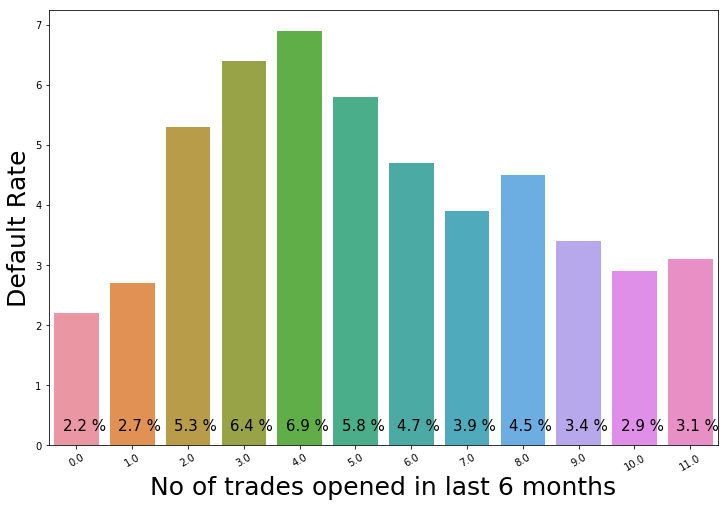

In [ ]:
#performace vs No of trades opened in last 6 months
bivariate_plot(creditbureau_eda,"No of trades opened in last 6 months")

Default rate is maximum for the values 3 & 4 and minimum for the values 0, 1, 10 & 11


Different values for No of trades opened in last 12 months_bins with count:
 (-0.028, 3.5]    30334
(3.5, 7.0]       17694
(7.0, 10.5]       9991
(10.5, 14.0]      6369
(14.0, 17.5]      2920
(17.5, 21.0]      2090
(21.0, 24.5]       412
(24.5, 28.0]        57
Name: No of trades opened in last 12 months_bins, dtype: int64


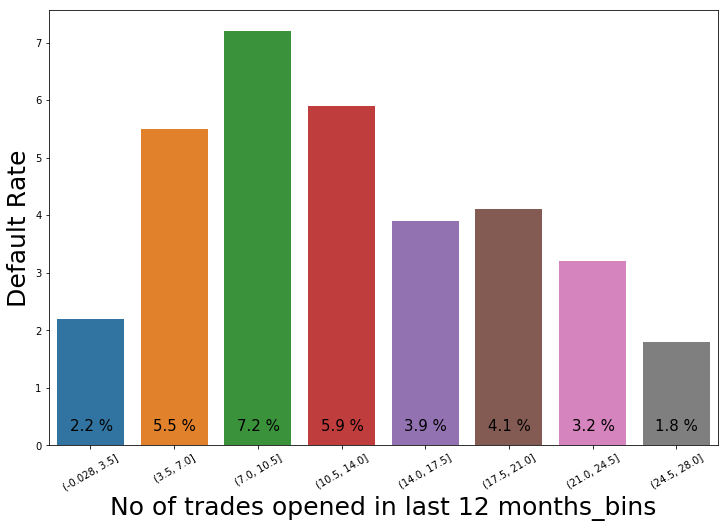

In [ ]:
#performace vs No of trades opened in last 12 months
bivariate_plot(creditbureau_eda,"No of trades opened in last 12 months_bins")

Default rate is the lowest for the bin 0 to 3.5 & 24.5 to 28

Default rate is maximum for the bins (3.5 to 14)

For rest of the bins default rate varies from 3.9 to 4.1


Different values for No of PL trades opened in last 6 months with count:
 0    31080
1    13546
2    12565
3     7949
4     3341
5     1090
6      296
Name: No of PL trades opened in last 6 months, dtype: int64


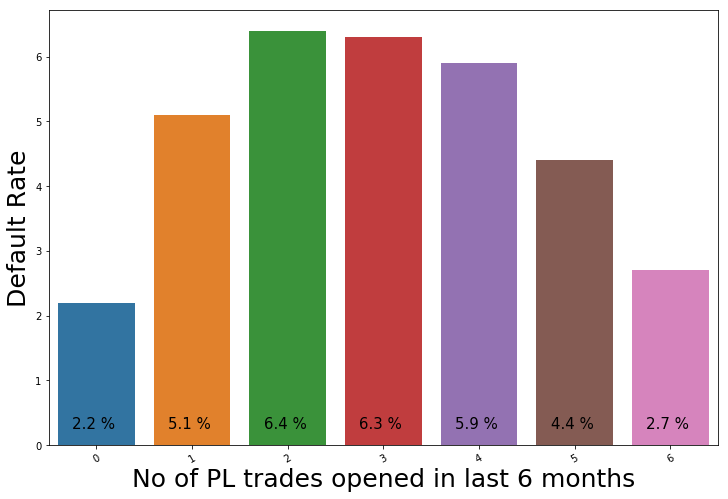

In [ ]:
#performace vs No of PL trades opened in last 6 months
bivariate_plot(creditbureau_eda,"No of PL trades opened in last 6 months")

Initially default rate increases and the value of the said field increases, then for the higher values default rate decreases


Different values for No of PL trades opened in last 12 months with count:
 0     25824
3      8130
4      7903
2      6830
1      6641
5      6189
6      4023
7      2223
8      1172
9       601
10      255
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64


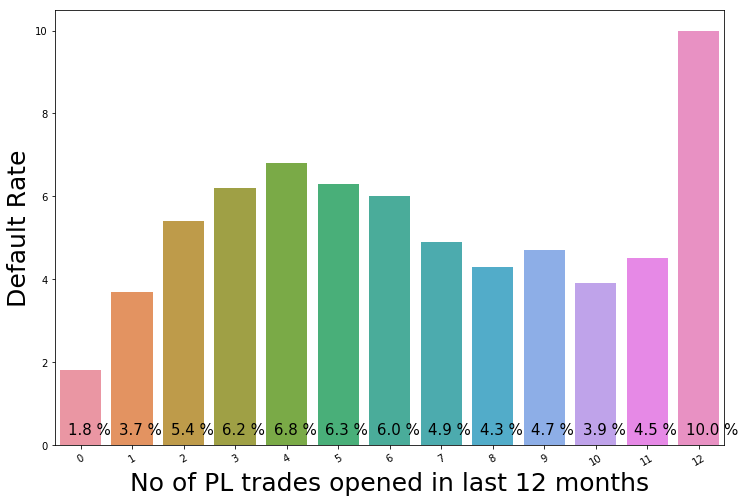

In [ ]:
#performace vs No of PL trades opened in last 12 months
bivariate_plot(creditbureau_eda,"No of PL trades opened in last 12 months")

Default rate increases initially, it then decreases in the middle and ends up with a spike.


Different values for No of Inquiries in last 6 months (excluding home & auto loans) with count:
 0     25069
1     13175
2     12831
3      7258
4      4248
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64


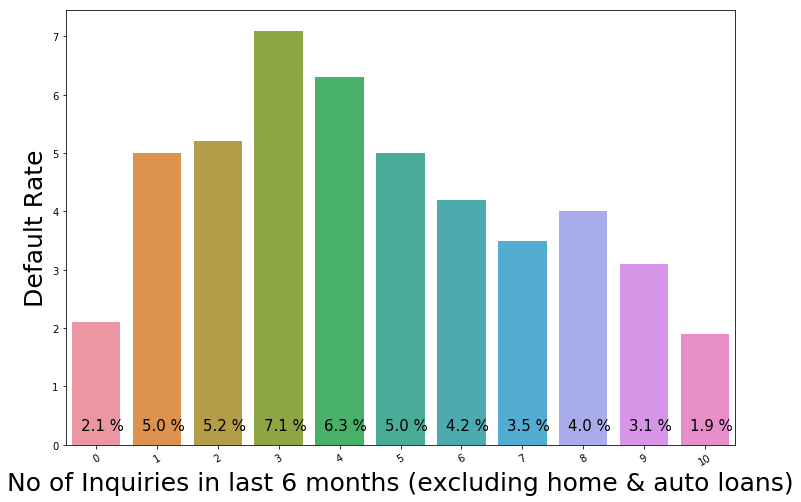

In [ ]:
#performace vs No of PL trades opened in last 6 months
bivariate_plot(creditbureau_eda,"No of Inquiries in last 6 months (excluding home & auto loans)")

Default rates increases for the values 0 to 2, it then decreases for the higher values.


Different values for No of Inquiries in last 12 months (excluding home & auto loans)_bins with count:
 (-0.02, 2.5]    32387
(2.5, 5.0]      21018
(5.0, 7.5]       6606
(7.5, 10.0]      5630
(10.0, 12.5]     2167
(12.5, 15.0]     1702
(15.0, 17.5]      309
(17.5, 20.0]       48
Name: No of Inquiries in last 12 months (excluding home & auto loans)_bins, dtype: int64


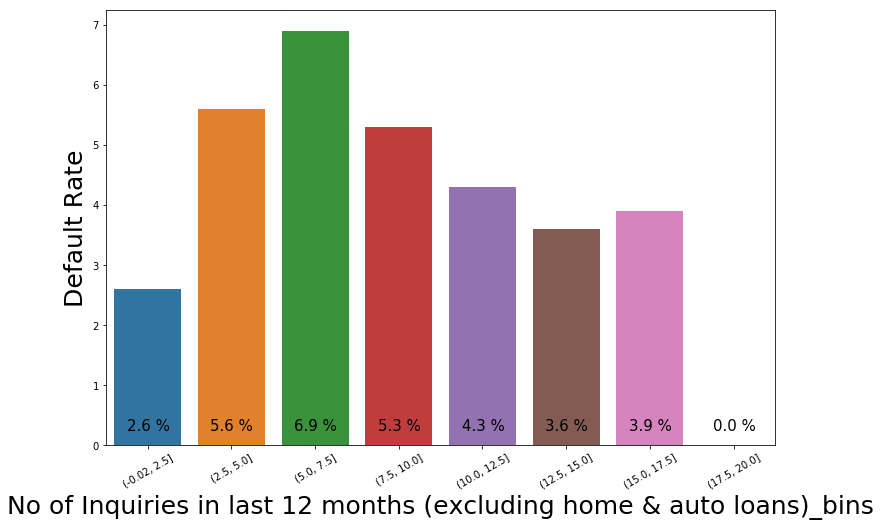

In [ ]:
#performace vs No of PL trades opened in last 12 months
bivariate_plot(creditbureau_eda,"No of Inquiries in last 12 months (excluding home & auto loans)_bins")

Default rate increases initially, then it starts decreasing except for the bin 15 to 17.5


Different values for Presence of open home loan with count:
 0.0    51796
1.0    18071
Name: Presence of open home loan, dtype: int64


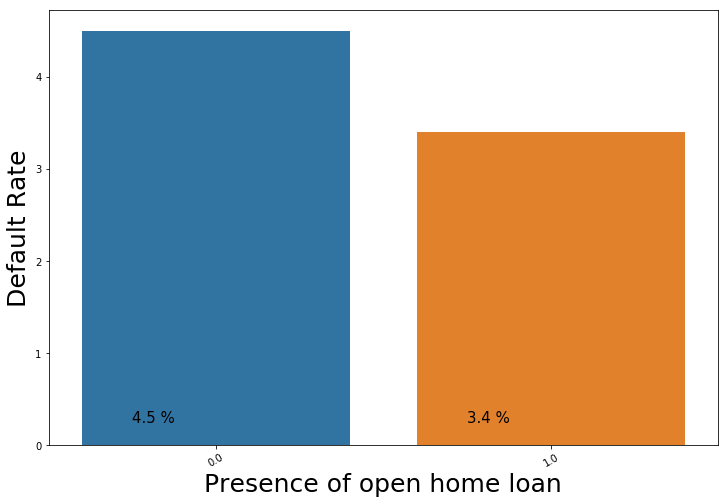

In [ ]:
#performace vs Presence of open home loan
bivariate_plot(creditbureau_eda,"Presence of open home loan")

Default rate is more for the customers who do not have any open home loan.


Different values for Outstanding Balance_bins with count:
 (-5218.801, 652350.125]      31661
(652350.125, 1304700.25]     16587
(2609400.5, 3261750.625]     10907
(3261750.625, 3914100.75]     5487
(1304700.25, 1957050.375]     3425
(3914100.75, 4566450.875]     1460
(4566450.875, 5218801.0]       217
(1957050.375, 2609400.5]       123
Name: Outstanding Balance_bins, dtype: int64


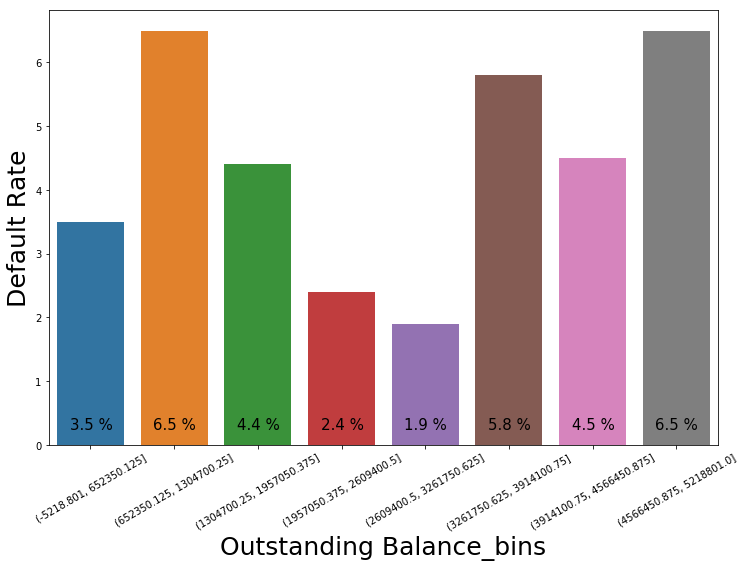

In [ ]:
#performace vs Presence of open home loan

bivariate_plot(creditbureau_eda,"Outstanding Balance_bins")

### Observations
Default rate is the lowest for couple of bins in the middle of the graph

Default rate is maximum for the 2nd & 6th bins

for rest of the bins, default rate varies from 3.5 to 4.5


Different values for Total No of Trades_bins with count:
 (-0.044, 5.5]    32499
(5.5, 11.0]      23963
(11.0, 16.5]      4596
(16.5, 22.0]      3355
(22.0, 27.5]      3313
(27.5, 33.0]      1858
(33.0, 38.5]       262
(38.5, 44.0]        21
Name: Total No of Trades_bins, dtype: int64


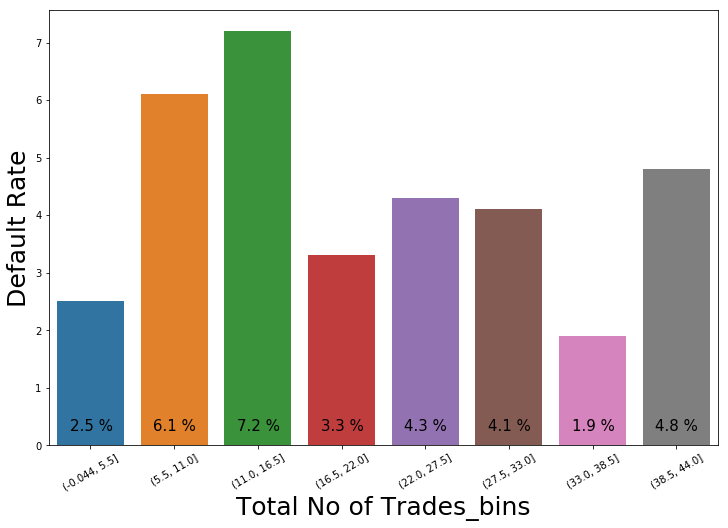

In [ ]:
#performace vs Presence of open home loan
bivariate_plot(creditbureau_eda,"Total No of Trades_bins")

### Observations
Default rate is lowest for the bins (0 to 5.5) and (33 to 38.5)

Default rate is maximum for the bins (5.5 to 11) and (11 to 16.5)

For all other bins default rate falls in the range of 3.3 to 4.8


Different values for Presence of open auto loan with count:
 0    63937
1     5930
Name: Presence of open auto loan, dtype: int64


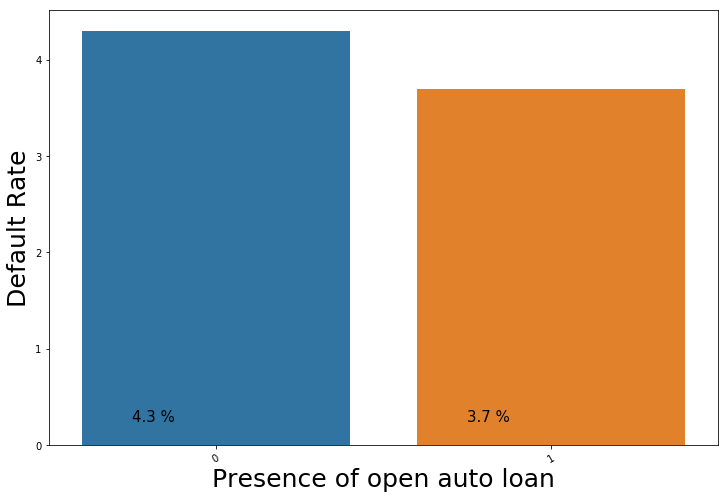

In [ ]:
#performace vs Presence of open home loan
bivariate_plot(creditbureau_eda,"Presence of open auto loan")

Default rate is more for the customers who do not have any open auto loan

# Create Master Dataset

In [ ]:
# lets drop "Performance Tag" from creditbureau as it is also present in demographic dataset
creditbureau.drop("Performance Tag",axis =1 , inplace = True)

In [ ]:
# lets create master dataset
master = pd.merge(demographic,creditbureau, how="inner", on = "Application ID")
master.head()

Application ID  Age Gender Marital Status  No of dependents  Income  \
0       954457215   48      F        Married               2.0    40.0   
1       432830445   31      M        Married               4.0    55.0   
2       941387308   32      M         Single               2.0    46.0   
3       392161677   43      M        Married               1.0    53.0   
4       182011211   35      F        Married               5.0    44.0   

      Education Profession Type of residence  \
0      Bachelor        SAL            Rented   
1  Professional    SE_PROF            Rented   
2      Bachelor    SE_PROF            Rented   
3      Bachelor         SE            Rented   
4  Professional        SAL            Rented   

   No of months in current residence             ...              \
0                                113             ...               
1                                112             ...               
2                                104             ...               
3                                 94             ...               
4                                112             ...               

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0  

[5 rows x 29 columns]

In [ ]:
# check the dimensions of the master dataset
master.shape

(69867, 29)

In [ ]:
# check column wise info of the master datset
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 29 columns):
Application ID                                                     69867 non-null int64
Age                                                                69867 non-null int64
Gender                                                             69867 non-null object
Marital Status                                                     69867 non-null object
No of dependents                                                   69867 non-null float64
Income                                                             69867 non-null float64
Education                                                          69867 non-null object
Profession                                                         69867 non-null object
Type of residence                                                  69867 non-null object
No of months in current residence                                  69867 non-null int64
No

In [ ]:
# lets check null values column wise
master.isnull().sum().sort_values(ascending = False)

Presence of open auto loan                                         0
No of times 60 DPD or worse in last 6 months                       0
Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

In [ ]:
# lets check null values column wise
(round(100*(master.isnull().sum()/len(master.index)), 2)).sort_values(ascending = False)

Presence of open auto loan                                         0.0
No of times 60 DPD or worse in last 6 months                       0.0
Age                                                                0.0
Gender                                                             0.0
Marital Status                                                     0.0
No of dependents                                                   0.0
Income                                                             0.0
Education                                                          0.0
Profession                                                         0.0
Type of residence                                                  0.0
No of months in current residence                                  0.0
No of months in current company                                    0.0
Performance Tag                                                    0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of 

In [ ]:
# create dataset for rejected applicants from credit bureau dataset
rejected_creditb = rejected_creditb.drop("Performance Tag",axis = 1)

In [ ]:
# now merge rejected applicants from demographics and creditbureau to create rejected_master
rejected_master = pd.merge(rejected_demo,rejected_creditb, how="inner", on = "Application ID")
rejected_master.head()

Application ID  Age Gender Marital Status  No of dependents  Income  \
0       906908303   35      M         Single               1.0     6.0   
1        10990583   47      F        Married               4.0    12.0   
2       589678446   46      M        Married               3.0     7.0   
3       809411322   41      M        Married               3.0    18.0   
4       150246616   42      F        Married               4.0    17.0   

      Education Profession Type of residence  \
0      Bachelor        SAL            Rented   
1       Masters         SE            Rented   
2  Professional         SE            Rented   
3       Masters        SAL            Rented   
4           Phd        SAL            Rented   

   No of months in current residence             ...              \
0                                 22             ...               
1                                122             ...               
2                                 10             ...               
3                                  6             ...               
4                                  8             ...               

   No of trades opened in last 6 months  \
0                                   4.0   
1                                   3.0   
2                                   2.0   
3                                   2.0   
4                                   3.0   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                        3   
1                                        3   
2                                        2   
3                                        1   
4                                        2   

   No of PL trades opened in last 12 months  \
0                                         7   
1                                         4   
2                                         4   
3                                         4   
4                                         3   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  2                
1                                                  3                
2                                                  0                
3                                                  4                
4                                                  3                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0            1309623.0                  13   
1                         0.0             775626.0                   7   
2                         0.0             732602.0                   8   
3                         0.0             842057.0                   8   
4                         0.0             786997.0                   7   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  

[5 rows x 29 columns]

# WOE & IV Analysis for demographic dataset

In [ ]:
# lets take the copy of the cleaned demographic dataset and drop Application ID
demographic_2 = demographic.drop('Application ID',axis = 1)

In [ ]:
# lets check the dimensions of the dataset
demographic_2.shape

(69867, 11)

In [ ]:
demographic_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 11 columns):
Age                                  69867 non-null int64
Gender                               69867 non-null object
Marital Status                       69867 non-null object
No of dependents                     69867 non-null float64
Income                               69867 non-null float64
Education                            69867 non-null object
Profession                           69867 non-null object
Type of residence                    69867 non-null object
No of months in current residence    69867 non-null int64
No of months in current company      69867 non-null int64
Performance Tag                      69867 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.9+ MB


In [ ]:
demographic_2.describe()

Age  No of dependents        Income  \
count  69867.000000      69867.000000  69867.000000   
mean      45.001918          2.859504     27.440888   
std        9.907948          1.385518     15.446660   
min       18.000000          1.000000      0.000000   
25%       37.000000          2.000000     14.000000   
50%       45.000000          3.000000     27.000000   
75%       53.000000          4.000000     40.000000   
max       65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       69867.000000                     69867.000000   
mean                           34.608299                        34.198921   
std                            36.846256                        20.349768   
min                             6.000000                         3.000000   
25%                             6.000000                        17.000000   
50%                            10.000000                        34.000000   
75%                            61.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  
count     69867.000000  
mean          0.042180  
std           0.201001  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [ ]:
#Considering Columns having more than 15 unique values for binning
#demographic data
demo_bins = []

demo_cols = demographic_2.columns
for i in demo_cols:
    if demographic_2[i].nunique() > 15:
        demo_bins.append(i)

demo_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company']

In [ ]:
#Non-binned variables

demo_vars = demographic_2.columns.difference(demo_bins)
demo_vars

Index(['Education', 'Gender', 'Marital Status', 'No of dependents',
       'Performance Tag', 'Profession', 'Type of residence'],
      dtype='object')

In [ ]:
# Here we have applied cut instead of qcut since qcut consider to disribute same number of records into bins whereas cut
# distributs on age but not on number of records so, in cut we can get different number of records in each bin

#Defining WOE,IV function

def iv_woe(data, target, bins, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>15):

            binned_x = pd.cut(data[ivars], bins, include_lowest=False)
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
#calling the function
iv_d, woe_d = iv_woe(data = demographic_2, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Age is 0.00382
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001357       210.0   
1      Age   (23.875, 29.75]   4346   179.0     0.060740      4167.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122158      7955.0   
3      Age    (35.625, 41.5]  14053   633.0     0.214795     13420.0   
4      Age    (41.5, 47.375]  13837   572.0     0.194096     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181201     13050.0   
6      Age   (53.25, 59.125]   9661   419.0     0.142178      9242.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083475      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838103  0.001492  
1         0.062268  0.024856  0.000038  
2         0.118873 -0.027258  0.000090  
3         0.200538 -0.068679  0.000979  
4         0.198222  0.021035  0.000087  
5         0.195009  0.073437  0.001014  
6         0.138105 -0.029068

In [ ]:
#WOE table
woe_d

Variable               Cutoff      N  Events  \
0                                Age     (17.953, 23.875]    214     4.0   
1                                Age      (23.875, 29.75]   4346   179.0   
2                                Age      (29.75, 35.625]   8315   360.0   
3                                Age       (35.625, 41.5]  14053   633.0   
4                                Age       (41.5, 47.375]  13837   572.0   
5                                Age      (47.375, 53.25]  13584   534.0   
6                                Age      (53.25, 59.125]   9661   419.0   
7                                Age       (59.125, 65.0]   5857   246.0   
0                             Gender                    F  16506   718.0   
1                             Gender                    M  53361  2229.0   
0                     Marital Status              Married  59550  2502.0   
1                     Marital Status               Single  10317   445.0   
0                   No of dependents                    1  15218   667.0   
1                   No of dependents                    2  15128   588.0   
2                   No of dependents                    3  15648   695.0   
3                   No of dependents                    4  11998   494.0   
4                   No of dependents                    5  11875   503.0   
0                             Income         (-0.06, 7.5]   8828   513.0   
1                             Income          (7.5, 15.0]  10509   496.0   
2                             Income         (15.0, 22.5]   9512   437.0   
3                             Income         (22.5, 30.0]  10927   472.0   
4                             Income         (30.0, 37.5]   9635   362.0   
5                             Income         (37.5, 45.0]  10535   353.0   
6                             Income         (45.0, 52.5]   5564   188.0   
7                             Income         (52.5, 60.0]   4357   126.0   
0                          Education             Bachelor  17302   742.0   
1                          Education              Masters  23481   998.0   
2                          Education               Others    119     8.0   
3                          Education                  Phd   4463   183.0   
4                          Education         Professional  24384  1011.0   
5                          Education              Unknown    118     5.0   
0                         Profession                  SAL  39686  1629.0   
1                         Profession                   SE  13925   641.0   
2                         Profession              SE_PROF  16256   677.0   
0                  Type of residence     Company provided   1603    73.0   
1                  Type of residence  Living with Parents   1778    80.0   
2                  Type of residence               Others    198     5.0   
3                  Type of residence                Owned  14003   593.0   
4                  Type of residence               Rented  52285  2196.0   
0  No of months in current residence         (5.88, 21.0]  39222  1435.0   
1  No of months in current residence         (21.0, 36.0]   5214   328.0   
2  No of months in current residence         (36.0, 51.0]   5064   271.0   
3  No of months in current residence         (51.0, 66.0]   4582   244.0   
4  No of months in current residence         (66.0, 81.0]   4267   191.0   
5  No of months in current residence         (81.0, 96.0]   4138   183.0   
6  No of months in current residence        (96.0, 111.0]   4253   159.0   
7  No of months in current residence       (111.0, 126.0]   3127   136.0   
0    No of months in current company        (2.87, 19.25]  20420  1005.0   
1    No of months in current company        (19.25, 35.5]  16018   665.0   
2    No of months in current company        (35.5, 51.75]  16487   642.0   
3    No of months in current company        (51.75, 68.0]  13705   475.0   
4    No of months in current company        (68.0, 84.25]   3228   160.0   


In [ ]:
#VAriable importance
iv_d.sort_values(by = 'IV',ascending = False)

Variable        IV
0                             Income  0.041686
0  No of months in current residence  0.038477
0    No of months in current company  0.019374
0                                Age  0.003820
0                   No of dependents  0.002649
0                         Profession  0.002231
0                  Type of residence  0.000921
0                          Education  0.000783
0                             Gender  0.000326
0                     Marital Status  0.000095

# Rules related to Information Value
![image.png](attachment:image.png)

In [ ]:
# as per above image, IV value of less than 0.02 is not useful, lets filter the dataframe for features having IV value greater
# than 0.02
demo_imp = iv_d[iv_d["IV"] > 0.02]
demo_imp.sort_values(by="IV",ascending = False)

Variable        IV
0                             Income  0.041686
0  No of months in current residence  0.038477

Only Income & No of months in current residence seems to be the useful predictor variables here

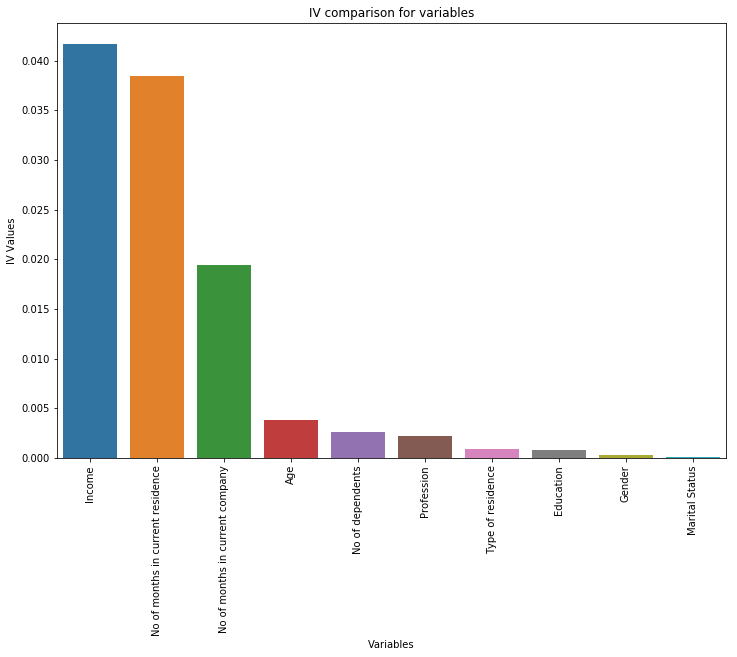

In [ ]:
## plotting all the consolidated IV values of the demographics variable
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Variable', y='IV', data=iv_d.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('IV comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

Above graph demonstrates Variables and their Information Values

In [ ]:
#Building a new dataset with WOE values called demographic_woe

#copy of demographic data
demographic_woe = pd.DataFrame(demographic_2).copy()

In [ ]:
#Replacing actual values with WOE variables,creating woe transformed demographic dataset
#Binned data
for var in demo_bins:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0))
        right = int(round(row.Cutoff.right,0))
        demographic_woe[var] = demographic_woe[var].replace(range(left,right),row.WoE)


In [ ]:
#Non-Binned data
for var in demo_vars:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        demographic_woe[var] = demographic_woe[var].replace(row.Cutoff,row.WoE)

In [ ]:
# woe transformed dataset
demographic_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company  Performance Tag  
0                         0.204217              0.0  
1                         0.083311              0.0  
2                         0.083311              0.0  
3                         0.204217              0.0  
4                         0.083311              0.0

In [ ]:
# lets confirm woe transformed dataset does not contain any null values
demographic_woe.isnull().sum()

Age                                  0
Gender                               0
Marital Status                       0
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
dtype: int64

In [ ]:
## saving WoE dataframe into csv file to be used later for the modelling
demographic_woe.to_csv('demographic_woe.csv',index=False)

# WOE transformation for Master Dataset

In [ ]:
# lets check the dimensions of the master dataset
master.shape

(69867, 29)

In [ ]:
# lets take the copy of the cleaned master dataset and drop Application ID
master_2 = master.drop('Application ID',axis = 1)

In [ ]:
master_2.head()

Age Gender Marital Status  No of dependents  Income     Education  \
0   48      F        Married               2.0    40.0      Bachelor   
1   31      M        Married               4.0    55.0  Professional   
2   32      M         Single               2.0    46.0      Bachelor   
3   43      M        Married               1.0    53.0      Bachelor   
4   35      F        Married               5.0    44.0  Professional   

  Profession Type of residence  No of months in current residence  \
0        SAL            Rented                                113   
1    SE_PROF            Rented                                112   
2    SE_PROF            Rented                                104   
3         SE            Rented                                 94   
4        SAL            Rented                                112   

   No of months in current company             ...              \
0                               56             ...               
1                               46             ...               
2                               49             ...               
3                               53             ...               
4                               43             ...               

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0  

[5 rows x 28 columns]

In [ ]:
master_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 28 columns):
Age                                                                69867 non-null int64
Gender                                                             69867 non-null object
Marital Status                                                     69867 non-null object
No of dependents                                                   69867 non-null float64
Income                                                             69867 non-null float64
Education                                                          69867 non-null object
Profession                                                         69867 non-null object
Type of residence                                                  69867 non-null object
No of months in current residence                                  69867 non-null int64
No of months in current company                                    69867 non-null int64
Pe

In [ ]:
master_2.describe()

Age  No of dependents        Income  \
count  69867.000000      69867.000000  69867.000000   
mean      45.001918          2.859504     27.440888   
std        9.907948          1.385518     15.446660   
min       18.000000          1.000000      0.000000   
25%       37.000000          2.000000     14.000000   
50%       45.000000          3.000000     27.000000   
75%       53.000000          4.000000     40.000000   
max       65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       69867.000000                     69867.000000   
mean                           34.608299                        34.198921   
std                            36.846256                        20.349768   
min                             6.000000                         3.000000   
25%                             6.000000                        17.000000   
50%                            10.000000                        34.000000   
75%                            61.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  No of times 90 DPD or worse in last 6 months  \
count     69867.000000                                  69867.000000   
mean          0.042180                                      0.248973   
std           0.201001                                      0.505659   
min           0.000000                                      0.000000   
25%           0.000000                                      0.000000   
50%           0.000000                                      0.000000   
75%           0.000000                                      0.000000   
max           1.000000                                      3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  69867.000000   
mean                                       0.391673   
std                                        0.771887   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  69867.000000   
mean                                       0.523495   
std                                        1.000760   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   69867.000000   
mean                                        0.414831   
std                                         0.763508   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         5.000000   

                  ...              No of trades opened in last 6 months  \
count             ...                                      69867.000000   
mean              ...                                          2.285099   
std               ...                                          2.081891   
min               ...                                          0.000000   
25%               ...                                          1.000000   
50%               ...                                          2.000000   
75%               ...                                          3.000000   
max               ...                                         12.000000   

    

In [ ]:
#Considering Columns having more than 15 unique values for binning
#demographic data
master_bins = []

master_cols = master_2.columns
for i in master_cols:
    if master_2[i].nunique() > 15:
        master_bins.append(i)

master_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 12 months',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Outstanding Balance',
 'Total No of Trades']

In [ ]:
#Non-binned variables
master_vars = master_2.columns.difference(demo_bins)
master_vars

Index(['Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Marital Status',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Performance Tag', 'Presence of open auto loan',
       'Presence of open home loan', 'Profession', 'Total No of Trades',
       'Type of residence'],
      dtype='object')

In [ ]:
#calling the function
iv_m, woe_m = iv_woe(data = master_2, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Age is 0.00382
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001357       210.0   
1      Age   (23.875, 29.75]   4346   179.0     0.060740      4167.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122158      7955.0   
3      Age    (35.625, 41.5]  14053   633.0     0.214795     13420.0   
4      Age    (41.5, 47.375]  13837   572.0     0.194096     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181201     13050.0   
6      Age   (53.25, 59.125]   9661   419.0     0.142178      9242.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083475      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838103  0.001492  
1         0.062268  0.024856  0.000038  
2         0.118873 -0.027258  0.000090  
3         0.200538 -0.068679  0.000979  
4         0.198222  0.021035  0.000087  
5         0.195009  0.073437  0.001014  
6         0.138105 -0.029068

Information value of No of times 60 DPD or worse in last 6 months is 0.211263
                                       Variable  Cutoff      N  Events  \
0  No of times 60 DPD or worse in last 6 months       0  51870  1582.0   
1  No of times 60 DPD or worse in last 6 months       1  11130   783.0   
2  No of times 60 DPD or worse in last 6 months       2   4917   389.0   
3  No of times 60 DPD or worse in last 6 months       3   1469   148.0   
4  No of times 60 DPD or worse in last 6 months       4    411    39.0   
5  No of times 60 DPD or worse in last 6 months       5     70     6.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.536817     50288.0         0.751464  0.336366  0.072200  
1     0.265694     10347.0         0.154617 -0.541391  0.060136  
2     0.131999      4528.0         0.067663 -0.668254  0.042993  
3     0.050221      1321.0         0.019740 -0.933778  0.028462  
4     0.013234       372.0         0.005559 -0.867378  0.006657  
5     0

                                Variable         Cutoff      N  Events  \
0  No of trades opened in last 12 months  (-0.028, 3.5]  30334   665.0   
1  No of trades opened in last 12 months     (3.5, 7.0]  17694   975.0   
2  No of trades opened in last 12 months    (7.0, 10.5]   9991   718.0   
3  No of trades opened in last 12 months   (10.5, 14.0]   6369   375.0   
4  No of trades opened in last 12 months   (14.0, 17.5]   2920   114.0   
5  No of trades opened in last 12 months   (17.5, 21.0]   2090    86.0   
6  No of trades opened in last 12 months   (21.0, 24.5]    412    13.0   
7  No of trades opened in last 12 months   (24.5, 28.0]     57     1.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.225653     29669.0         0.443350  0.675361  0.147024  
1     0.330845     16719.0         0.249836 -0.280847  0.022751  
2     0.243638      9273.0         0.138568 -0.564318  0.059292  
3     0.127248      5994.0         0.089570 -0.351122  0.013230  
4  

              Variable                     Cutoff      N  Events  % of Events  \
0  Outstanding Balance    (-5218.801, 652350.125]  31661  1116.0     0.378690   
1  Outstanding Balance   (652350.125, 1304700.25]  16587  1071.0     0.363420   
2  Outstanding Balance  (1304700.25, 1957050.375]   3425   150.0     0.050899   
3  Outstanding Balance   (1957050.375, 2609400.5]    123     3.0     0.001018   
4  Outstanding Balance   (2609400.5, 3261750.625]  10907   207.0     0.070241   
5  Outstanding Balance  (3261750.625, 3914100.75]   5487   320.0     0.108585   
6  Outstanding Balance  (3914100.75, 4566450.875]   1460    66.0     0.022396   
7  Outstanding Balance   (4566450.875, 5218801.0]    217    14.0     0.004751   

   Non-Events  % of Non-Events       WoE        IV  
0     30545.0         0.456441  0.186740  0.014519  
1     15516.0         0.231859 -0.449431  0.059128  
2      3275.0         0.048939 -0.039272  0.000077  
3       120.0         0.001793  0.566169  0.000439  
4    

In [ ]:
#woe_m table
woe_m

Variable  \
0                                                 Age   
1                                                 Age   
2                                                 Age   
3                                                 Age   
4                                                 Age   
5                                                 Age   
6                                                 Age   
7                                                 Age   
0                                              Gender   
1                                              Gender   
0                                      Marital Status   
1                                      Marital Status   
0                                    No of dependents   
1                                    No of dependents   
2                                    No of dependents   
3                                    No of dependents   
4                                    No of dependents   
0                                              Income   
1                                              Income   
2                                              Income   
3                                              Income   
4                                              Income   
5                                              Income   
6                                              Income   
7                                              Income   
0                                           Education   
1                                           Education   
2                                           Education   
3                                           Education   
4                                           Education   
..                                                ...   
9   No of Inquiries in last 6 months (excluding ho...   
10  No of Inquiries in last 6 months (excluding ho...   
0   No of Inquiries in last 12 months (excluding h...   
1   No of Inquiries in last 12 months (excluding h...   
2   No of Inquiries in last 12 months (excluding h...   
3   No of Inquiries in last 12 months (excluding h...   
4   No of Inquiries in last 12 months (excluding h...   
5   No of Inquiries in last 12 months (excluding h...   
6   No of Inquiries in last 12 months (excluding h...   
7   No of Inquiries in last 12 months (excluding h...   
0                          Presence of open home loan   
1                          Presence of open home loan   
0                                 Outstanding Balance   
1                                 Outstanding Balance   
2                                 Outstanding Balance   
3                                 Outstanding Balance   
4                                 Outstanding Balance   
5                                 Outstanding Balance   
6                                 Outstanding Balance   
7                                 Outstanding Balance   
0                                  Total No of Trades   
1                                  Total No of Trades   
2                                  Total No of Trades   
3                                  Total No of Trades   
4                                  Total No of Trades   
5                                  Total No of Trades   
6                                  Total No of Trades   
7                                  Total No of Trades   
0                          Presence of open auto loan   
1                          Presence of open auto loan   

                       Cutoff      N  Events  % of Events  Non-Events  \
0            (17.953, 23.875]    214     4.0     0.001357       210.0   
1             (23.875, 29.75]   4346   179.0     0.060740      4167.0   
2             (29.75, 35.625]   8315   360.0     0.122158      7955.0   
3              (35.625, 41.5]  14053   633.0     0.214795     13420.0   
4              (41.5, 47.375]  13837   572.0     0.194096     13265.0   
5             (47.375, 53.25]  13584   534.0     0.181201     13050.0   

In [ ]:
#VAriable importance
iv_m.sort_values(by = 'IV',ascending = False)

Variable        IV
0           No of PL trades opened in last 12 months  0.298981
0             Avgas CC Utilization in last 12 months  0.292840
0       No of times 30 DPD or worse in last 6 months  0.244237
0              No of trades opened in last 12 months  0.243495
0            No of PL trades opened in last 6 months  0.224242
0      No of times 30 DPD or worse in last 12 months  0.218599
0      No of times 90 DPD or worse in last 12 months  0.215644
0       No of times 60 DPD or worse in last 6 months  0.211263
0  No of Inquiries in last 6 months (excluding ho...  0.209320
0                                 Total No of Trades  0.203444
0               No of trades opened in last 6 months  0.191498
0      No of times 60 DPD or worse in last 12 months  0.188225
0  No of Inquiries in last 12 months (excluding h...  0.163425
0       No of times 90 DPD or worse in last 6 months  0.162650
0                                Outstanding Balance  0.159489
0                                             Income  0.041686
0                  No of months in current residence  0.038477
0                    No of months in current company  0.019374
0                         Presence of open home loan  0.016963
0                                                Age  0.003820
0                                   No of dependents  0.002649
0                                         Profession  0.002231
0                         Presence of open auto loan  0.001658
0                                  Type of residence  0.000921
0                                          Education  0.000783
0                                             Gender  0.000326
0                                     Marital Status  0.000095

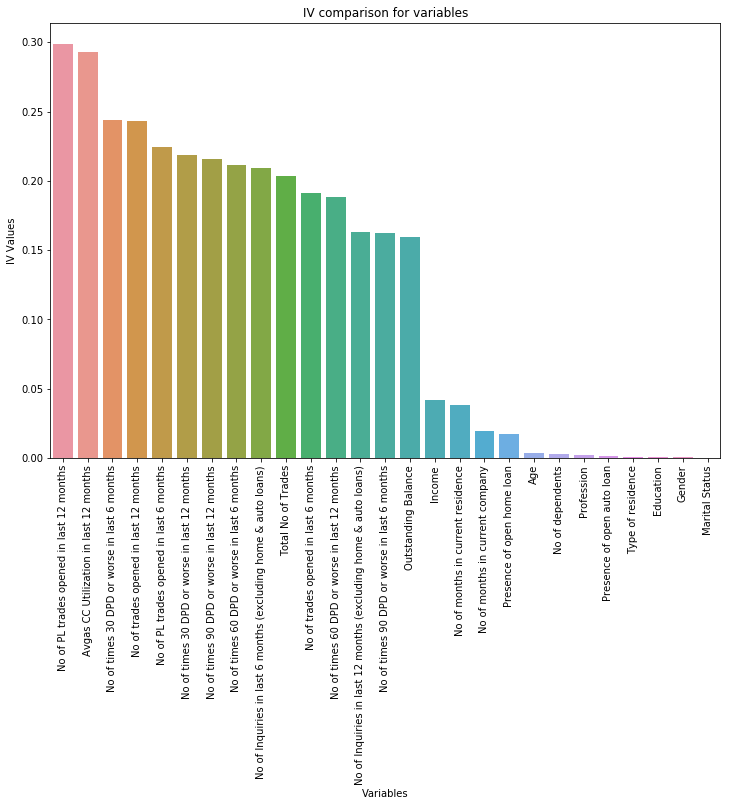

In [ ]:
## plotting all the consolidated IV values of the demographics variable
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Variable', y='IV', data=iv_m.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('IV comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

Above graph demonstrates Variables and their Information Values for the master dataframe.

In [ ]:
# as discussued earlier, IV value of less than 0.02 is not useful, lets filter the dataframe for features having IV value greater
# than 0.02
master_imp = iv_m[iv_m["IV"] > 0.02]
master_imp.sort_values(by="IV",ascending = False)

Variable        IV
0           No of PL trades opened in last 12 months  0.298981
0             Avgas CC Utilization in last 12 months  0.292840
0       No of times 30 DPD or worse in last 6 months  0.244237
0              No of trades opened in last 12 months  0.243495
0            No of PL trades opened in last 6 months  0.224242
0      No of times 30 DPD or worse in last 12 months  0.218599
0      No of times 90 DPD or worse in last 12 months  0.215644
0       No of times 60 DPD or worse in last 6 months  0.211263
0  No of Inquiries in last 6 months (excluding ho...  0.209320
0                                 Total No of Trades  0.203444
0               No of trades opened in last 6 months  0.191498
0      No of times 60 DPD or worse in last 12 months  0.188225
0  No of Inquiries in last 12 months (excluding h...  0.163425
0       No of times 90 DPD or worse in last 6 months  0.162650
0                                Outstanding Balance  0.159489
0                                             Income  0.041686
0                  No of months in current residence  0.038477

In [ ]:
#Building a new dataset with WOE values called master_woe

#copy of master data
master_woe = pd.DataFrame(master_2).copy()

In [ ]:
#Replacing actual values with WOE variables, creating woe transformed master dataset
#Binned data
for var in master_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0))
        right = int(round(row.Cutoff.right,0))
        master_woe[var] = master_woe[var].replace(range(left,right),row.WoE)

In [ ]:
#Non-Binned data
for var in master_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        master_woe[var] = master_woe[var].replace(row.Cutoff,row.WoE)

In [ ]:
master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company             ...              \
0                         0.204217             ...               
1                         0.083311             ...               
2                         0.083311             ...               
3                         0.204217             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                              0.479566   
1                              0.479566   
2                              0.657628   
3                              0.479566   
4                              0.657628   

   No of trades opened in last 12 months  \
0                               0.675361   
1                               0.675361   
2                               0.675361   
3                               0.675361   
4                               0.675361   

   No of PL trades opened in last 6 months  \
0                                 0.649212   
1                                 0.649212   
2                                 0.649212   
3                                 0.649212   
4                                 0.649212   

   No of PL trades opened in last 12 months  \
0                                  0.893811   
1                                  0.893811   
2                                  0.893811   
3                                  0.893811   
4                                  0.893811   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                            0.71823                
1                                            0.71823                
2                                            0.71823                
3                                            0.71823                
4                                            0.71823                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                           0.498244                 
1                                           0.498244                 
2                                           0.498244                 
3                                           0.498244                 
4                                           0.498244                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                    0.236658             0.822570            0.542715   
1                   -0.071778             0.186740            0.542715   
2                    0.236658             0.822570            0.542715   
3                    0.236658            -0.340984            0.542715   
4                    0.236658             0.822570            0.542715   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                    0.138368  
4                   -0.011985  

[5 rows x 28 columns]

In [ ]:
## saving WoE dataframe into csv file to be used later for the modelling
master_woe.to_csv('master_woe.csv',index=False)

In [ ]:
# lets assure woe transformed dataset does not have any null values
master_woe.isnull().sum()

Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in las

# WOE transformation for Rejected applicants from Demographic Dataset

In [ ]:
# rejected applicants data was saved in rejected_demo earlier, let check the dataset
rejected_demo.head()

Application ID  Age Gender Marital Status  No of dependents  Income  \
69603       906908303   35      M         Single               1.0     6.0   
69604        10990583   47      F        Married               4.0    12.0   
69605       589678446   46      M        Married               3.0     7.0   
69606       809411322   41      M        Married               3.0    18.0   
69607       150246616   42      F        Married               4.0    17.0   

          Education Profession Type of residence  \
69603      Bachelor        SAL            Rented   
69604       Masters         SE            Rented   
69605  Professional         SE            Rented   
69606       Masters        SAL            Rented   
69607           Phd        SAL            Rented   

       No of months in current residence  No of months in current company  \
69603                                 22                               18   
69604                                122                               25   
69605                                 10                               31   
69606                                  6                               47   
69607                                  8                               49   

       Performance Tag  
69603              NaN  
69604              NaN  
69605              NaN  
69606              NaN  
69607              NaN

In [ ]:
# lets check null values column wise
rejected_demo.isnull().sum().sort_values(ascending = False)

Performance Tag                      1425
No of months in current company         0
No of months in current residence       0
Type of residence                       0
Profession                              0
Education                               0
Income                                  0
No of dependents                        0
Marital Status                          0
Gender                                  0
Age                                     0
Application ID                          0
dtype: int64

In [ ]:
# Making "Performance Tag" as 1 as all these records are assumed to be defaulters
rejected_demo["Performance Tag"] = rejected_demo["Performance Tag"].replace(np.nan,1)

In [ ]:
# lets check null values column wise again
rejected_demo.isnull().sum().sort_values(ascending = False)

Performance Tag                      0
No of months in current company      0
No of months in current residence    0
Type of residence                    0
Profession                           0
Education                            0
Income                               0
No of dependents                     0
Marital Status                       0
Gender                               0
Age                                  0
Application ID                       0
dtype: int64

In [ ]:
#droping Application ID
rejected_demo_2 = rejected_demo.drop('Application ID',axis = 1)

In [ ]:
#Considering Columns having more than 15 unique values for binning
#demographic data
rejected_demo_bins = []

rejected_demo_cols =rejected_demo_2.columns
for i in rejected_demo_cols:
    if rejected_demo_2[i].nunique() > 15:
        rejected_demo_bins.append(i)

rejected_demo_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company']

In [ ]:
#Non-binned variables

rejected_demo_vars = rejected_demo_2.columns.difference(rejected_demo_bins)
rejected_demo_vars

Index(['Education', 'Gender', 'Marital Status', 'No of dependents',
       'Performance Tag', 'Profession', 'Type of residence'],
      dtype='object')

In [ ]:
#Building a new dataset with WOE values called rejected_demo_woe

#copy of demo data
rejected_demo_woe = pd.DataFrame(rejected_demo_2).copy()

In [ ]:
#Replacing actual values with WOE variables
#Binned data
for var in rejected_demo_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0))
        right = int(round(row.Cutoff.right,0))
        rejected_demo_woe[var] = rejected_demo_woe[var].replace(range(left,right),row.WoE)

In [ ]:
#Non-Binned data
for var in rejected_demo_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        rejected_demo_woe[var] = rejected_demo_woe[var].replace(row.Cutoff,row.WoE)

In [ ]:
# Putting feature variable to X
X_test = rejected_demo.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_demo['Performance Tag']

In [ ]:
# woe transformed dataset
rejected_demo_woe.head()

Age    Gender  Marital Status  No of dependents    Income  \
69603 -0.027258  0.010147       -0.023327         -0.040085 -0.337170   
69604  0.073437 -0.032174        0.004092          0.025204 -0.117647   
69605  0.021035  0.010147        0.004092         -0.053955 -0.337170   
69606 -0.068679  0.010147        0.004092         -0.053955 -0.089365   
69607  0.021035 -0.032174        0.004092          0.025204 -0.089365   

       Education  Profession  Type of residence  \
69603  -0.017314    0.028409           0.004454   
69604  -0.007949   -0.091424           0.004454   
69605   0.017931   -0.091424           0.004454   
69606  -0.007949    0.028409           0.004454   
69607   0.029512    0.028409           0.004454   

       No of months in current residence  No of months in current company  \
69603                          -0.421595                        -0.161652   
69604                          -0.032002                         0.016569   
69605                           0.148090                         0.016569   
69606                           0.148090                         0.083311   
69607                           0.148090                         0.083311   

       Performance Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

# WOE transformation for Rejected applicants from Master Dataset

In [ ]:
# lets check the dataset
rejected_master.head()

Application ID  Age Gender Marital Status  No of dependents  Income  \
0       906908303   35      M         Single               1.0     6.0   
1        10990583   47      F        Married               4.0    12.0   
2       589678446   46      M        Married               3.0     7.0   
3       809411322   41      M        Married               3.0    18.0   
4       150246616   42      F        Married               4.0    17.0   

      Education Profession Type of residence  \
0      Bachelor        SAL            Rented   
1       Masters         SE            Rented   
2  Professional         SE            Rented   
3       Masters        SAL            Rented   
4           Phd        SAL            Rented   

   No of months in current residence             ...              \
0                                 22             ...               
1                                122             ...               
2                                 10             ...               
3                                  6             ...               
4                                  8             ...               

   No of trades opened in last 6 months  \
0                                   4.0   
1                                   3.0   
2                                   2.0   
3                                   2.0   
4                                   3.0   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                        3   
1                                        3   
2                                        2   
3                                        1   
4                                        2   

   No of PL trades opened in last 12 months  \
0                                         7   
1                                         4   
2                                         4   
3                                         4   
4                                         3   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  2                
1                                                  3                
2                                                  0                
3                                                  4                
4                                                  3                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0            1309623.0                  13   
1                         0.0             775626.0                   7   
2                         0.0             732602.0                   8   
3                         0.0             842057.0                   8   
4                         0.0             786997.0                   7   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  

[5 rows x 29 columns]

In [ ]:
# lets check null values column wise
rejected_master.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    1425
Avgas CC Utilization in last 12 months                               35
Presence of open auto loan                                            0
No of times 60 DPD or worse in last 6 months                          0
Age                                                                   0
Gender                                                                0
Marital Status                                                        0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                 

In [ ]:
# Making "Performance Tag" as 1 as all these records are assumed to be defaulters
rejected_master["Performance Tag"] = rejected_master["Performance Tag"].replace(np.nan,1)

In [ ]:
# since these are rejected applicants Avg CC util should be 0.
rejected_master.loc[rejected_master["Avgas CC Utilization in last 12 months"].isnull(),"Avgas CC Utilization in last 12 months"] = 0

In [ ]:
# lets check null values column wise again
rejected_master.isnull().sum().sort_values(ascending = False)

Presence of open auto loan                                         0
No of times 60 DPD or worse in last 6 months                       0
Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

In [ ]:
#droping Application ID
rejected_master_2 = rejected_master.drop('Application ID',axis = 1)

In [ ]:
#Considering Columns having more than 15 unique values for binning
#demographic data
rejected_master_bins = []

rejected_master_cols =rejected_master_2.columns
for i in rejected_master_cols:
    if rejected_master_2[i].nunique() > 15:
        rejected_master_bins.append(i)

rejected_master_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company',
 'Avgas CC Utilization in last 12 months',
 'Outstanding Balance',
 'Total No of Trades']

In [ ]:
#Non-binned variables

rejected_master_vars = rejected_master_2.columns.difference(rejected_master_bins)
rejected_master_vars

Index(['Education', 'Gender', 'Marital Status',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Performance Tag',
       'Presence of open auto loan', 'Presence of open home loan',
       'Profession', 'Type of residence'],
      dtype='object')

In [ ]:
#Building a new dataset with WOE values called master_woe

#copy of master data
rejected_master_woe = pd.DataFrame(rejected_master_2).copy()

In [ ]:
#Replacing actual values with WOE variables
#Binned data
for var in rejected_master_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0))
        right = int(round(row.Cutoff.right,0))
        rejected_master_woe[var] = rejected_master_woe[var].replace(range(left,right),row.WoE)

In [ ]:
#Non-Binned data
for var in rejected_master_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        rejected_master_woe[var] = rejected_master_woe[var].replace(row.Cutoff,row.WoE)

In [ ]:
# Putting feature variable to X
X_test = rejected_master.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master['Performance Tag']

In [ ]:
# woe transformed dataset
rejected_master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0 -0.027258  0.010147       -0.023327         -0.040085 -0.337170  -0.017314   
1  0.073437 -0.032174        0.004092          0.025204 -0.117647  -0.007949   
2  0.021035  0.010147        0.004092         -0.053955 -0.337170   0.017931   
3 -0.068679  0.010147        0.004092         -0.053955 -0.089365  -0.007949   
4  0.021035 -0.032174        0.004092          0.025204 -0.089365   0.029512   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.421595   
1   -0.091424           0.004454                          -0.032002   
2   -0.091424           0.004454                           0.148090   
3    0.028409           0.004454                           0.148090   
4    0.028409           0.004454                           0.148090   

   No of months in current company             ...              \
0                        -0.161652             ...               
1                         0.016569             ...               
2                         0.016569             ...               
3                         0.083311             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                             -0.524277   
1                             -0.435124   
2                             -0.232861   
3                             -0.232861   
4                             -0.435124   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                -0.423615   
1                                -0.423615   
2                                -0.438436   
3                                -0.199362   
4                                -0.438436   

   No of PL trades opened in last 12 months  \
0                                 -0.157721   
1                                 -0.500075   
2                                 -0.500075   
3                                 -0.500075   
4                                 -0.412296   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.216097                
1                                          -0.554789                
2                                           0.718230                
3                                          -0.428636                
4                                          -0.554789                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                   -0.071778            -0.039272           -0.566631   
1                   -0.071778            -0.449431           -0.394043   
2                   -0.071778            -0.449431           -0.394043   
3                   -0.071778            -0.449431           -0.394043   
4                   -0.071778            -0.449431           -0.394043   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                   -0.011985  
4                    0.138368  

[5 rows x 28 columns]

# Model Building on WOE Transformed Demographics DataSet

## Logistic Regression

In [ ]:
# function to print confusion metrics, sensitivity, specificity etc
def classification_metrics(actual,predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Metrics:\n",confusion)
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
    print("Recall/Sensitivity:",recall_score(actual,predicted))
    print("Precision:",precision_score(actual,predicted))
    print("Specificity:{}".format(round(TN/float(TN+FP),3)))

In [ ]:
# function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# lets check the dimensions of the woe transformed demographic dataset
demographic_woe.shape

(69867, 11)

In [ ]:
# lets display the woe transformed demographic dataset
demographic_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company  Performance Tag  
0                         0.204217              0.0  
1                         0.083311              0.0  
2                         0.083311              0.0  
3                         0.204217              0.0  
4                         0.083311              0.0

In [ ]:
# Putting feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = demographic_woe['Performance Tag']

In [ ]:
# lets check the X dataframe
X.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company  
0                         0.204217  
1                         0.083311  
2                         0.083311  
3                         0.204217  
4                         0.083311

In [ ]:
# lets check the y dataframe containing the target variable
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag, dtype: float64

In [ ]:
# Please note, we do not need data scaling here as the data is already scaled

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

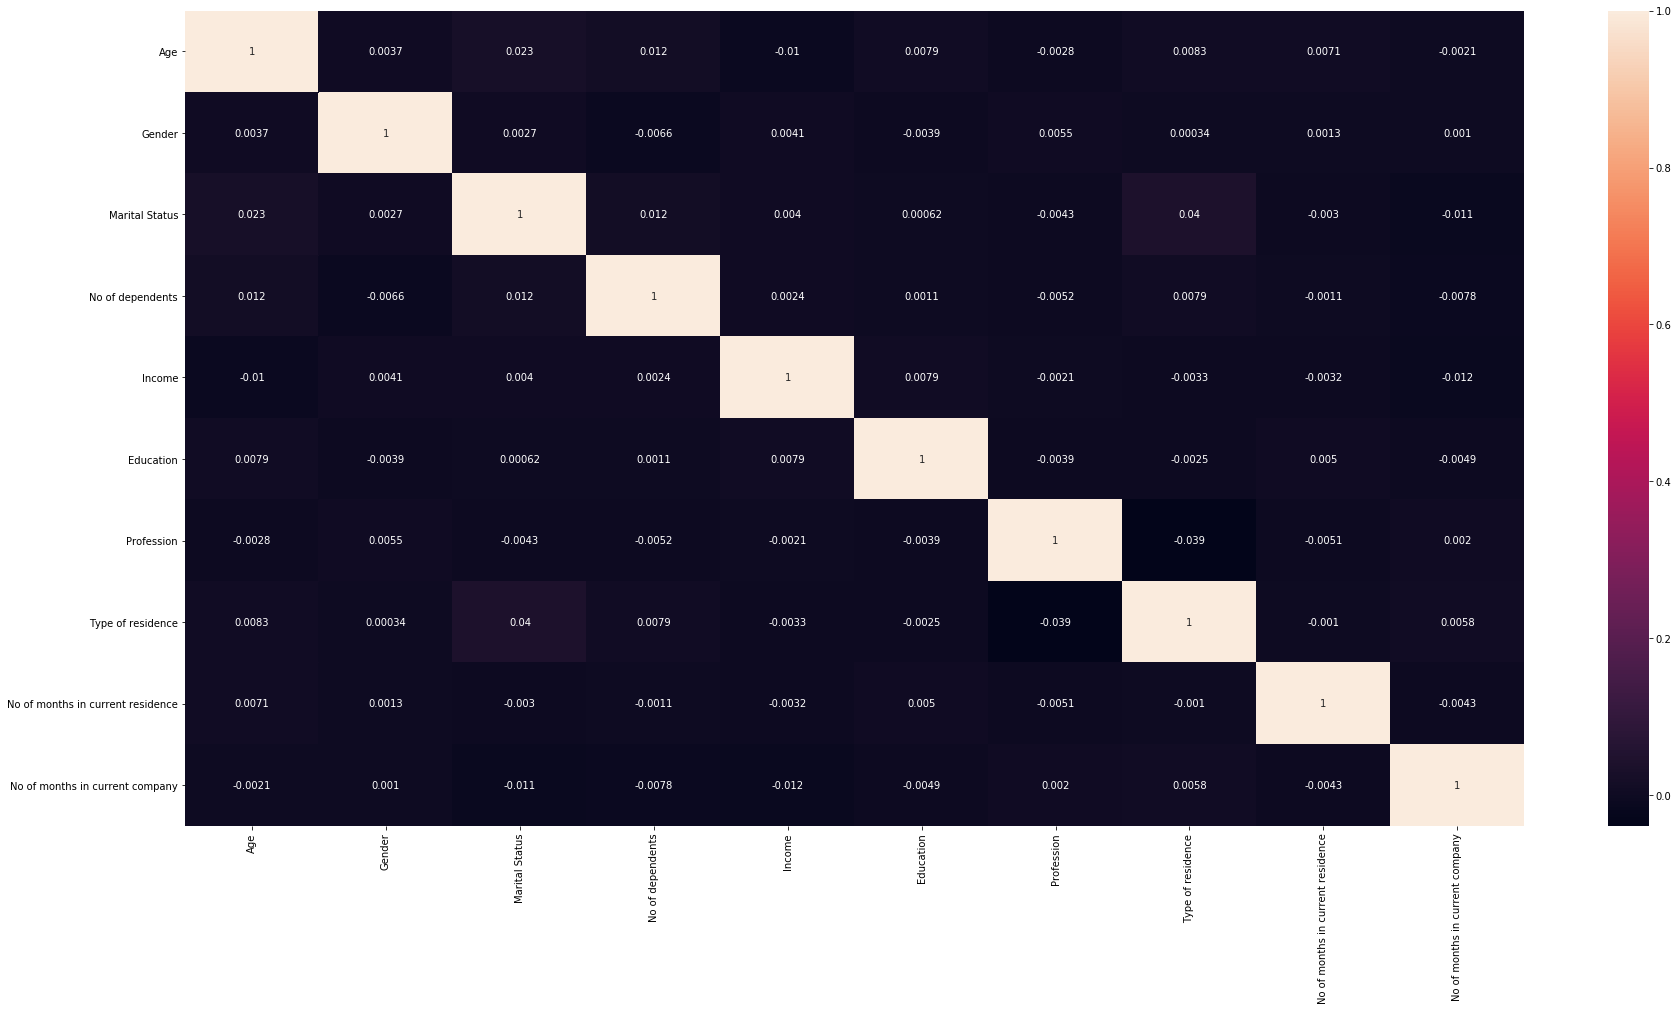

In [ ]:
## heat map for the numerical variables
plt.figure(figsize = (30, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

Above graph shows there is very low correlation between variables.

In [ ]:
# check class imbalance
(y_train.value_counts()/y_train.shape)*100

# Dataset is imbalanced, we will handle it later

0.0    95.826688
1.0     4.173312
Name: Performance Tag, dtype: float64

In [ ]:
# lets save all the variable except the target variable
col = demographic_woe.drop("Performance Tag",1).columns

In [ ]:
# Default logistic regression model
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 23 Dec 2019   Deviance:                       16890.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1394      0.023   -135.325      0.000      -3.185      -3.094
Age                                  -0.0002      0.003     -0.078      0.938      -0.006       0.006
Gender                               -1.1402      1.246     -0.915      0.360      -3.582       1.301
Marital Status                        2.2276      2.369      0.940      0.347      -2.415       6.870
No of dependents                     -1.6783      0.448     -3.748      0.000      -2.556      -0.801
Income                                0.0011      0.004      0.239      0.811      -0.008       0.010
Education                            -1.5902      0.697     -2.282      0.022      -2.956      -0.224
Profession                           -0.9372      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8976      0.795     -1.129      0.259      -2.456       0.661
No of months in current residence     0.0076      0.003      2.790      0.005       0.002       0.013
No of months in current company      -1.0495      0.163     -6.427      0.000      -1.370      -0.729
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Age is high, lets drop it and re create the model
col = col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 23 Dec 2019   Deviance:                       16890.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1396      0.023   -136.225      0.000      -3.185      -3.094
Gender                               -1.1405      1.246     -0.916      0.360      -3.582       1.301
Marital Status                        2.2236      2.368      0.939      0.348      -2.418       6.865
No of dependents                     -1.6787      0.448     -3.749      0.000      -2.556      -0.801
Income                                0.0011      0.004      0.240      0.810      -0.008       0.010
Education                            -1.5907      0.697     -2.283      0.022      -2.956      -0.225
Profession                           -0.9372      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8980      0.795     -1.129      0.259      -2.457       0.661
No of months in current residence     0.0076      0.003      2.790      0.005       0.002       0.013
No of months in current company      -1.0495      0.163     -6.427      0.000      -1.370      -0.729
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Income is high, lets drop it and re create the model
col = col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 23 Dec 2019   Deviance:                       16890.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1387      0.023   -137.771      0.000      -3.183      -3.094
Gender                               -1.1392      1.246     -0.915      0.360      -3.581       1.302
Marital Status                        2.2259      2.368      0.940      0.347      -2.416       6.868
No of dependents                     -1.6784      0.448     -3.749      0.000      -2.556      -0.801
Education                            -1.5892      0.697     -2.281      0.023      -2.955      -0.223
Profession                           -0.9374      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8983      0.795     -1.130      0.259      -2.457       0.660
No of months in current residence     0.0076      0.003      2.789      0.005       0.002       0.013
No of months in current company      -1.0499      0.163     -6.429      0.000      -1.370      -0.730
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Gender is high, lets drop it and re create the model
col = col.drop('Gender', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8445.3
Date:                Mon, 23 Dec 2019   Deviance:                       16891.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1387      0.023   -137.778      0.000      -3.183      -3.094
Marital Status                        2.2183      2.368      0.937      0.349      -2.423       6.860
No of dependents                     -1.6759      0.448     -3.743      0.000      -2.553      -0.798
Education                            -1.5859      0.697     -2.276      0.023      -2.951      -0.220
Profession                           -0.9400      0.473     -1.989      0.047      -1.866      -0.014
Type of residence                    -0.8990      0.795     -1.130      0.258      -2.458       0.660
No of months in current residence     0.0076      0.003      2.785      0.005       0.002       0.013
No of months in current company      -1.0500      0.163     -6.431      0.000      -1.370      -0.730
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Marital Status is high, lets drop it and re create the model
col = col.drop('Marital Status', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48899
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8445.8
Date:                Mon, 23 Dec 2019   Deviance:                       16892.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1385      0.023   -137.800      0.000      -3.183      -3.094
No of dependents                     -1.6694      0.447     -3.731      0.000      -2.546      -0.792
Education                            -1.5872      0.697     -2.278      0.023      -2.953      -0.222
Profession                           -0.9416      0.473     -1.992      0.046      -1.868      -0.015
Type of residence                    -0.8636      0.790     -1.094      0.274      -2.411       0.684
No of months in current residence     0.0076      0.003      2.781      0.005       0.002       0.013
No of months in current company      -1.0518      0.163     -6.442      0.000      -1.372      -0.732
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Type of residence is high, lets drop it and re create the model
col = col.drop('Type of residence', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48900
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8446.4
Date:                Mon, 23 Dec 2019   Deviance:                       16893.
Time:                        12:49:49   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1386      0.023   -137.812      0.000      -3.183      -3.094
No of dependents                     -1.6746      0.448     -3.741      0.000      -2.552      -0.797
Education                            -1.5862      0.697     -2.276      0.023      -2.953      -0.220
Profession                           -0.9177      0.472     -1.944      0.052      -1.843       0.008
No of months in current residence     0.0076      0.003      2.782      0.005       0.002       0.013
No of months in current company      -1.0530      0.163     -6.449      0.000      -1.373      -0.733
=====================================================================================================
"""

In [ ]:
# p-value of the feauture Profession is high, lets drop it and re build the model
col = col.drop('Profession', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48901
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8448.3
Date:                Mon, 23 Dec 2019   Deviance:                       16897.
Time:                        12:49:50   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1385      0.023   -137.844      0.000      -3.183      -3.094
No of dependents                     -1.6710      0.448     -3.733      0.000      -2.548      -0.794
Education                            -1.5795      0.697     -2.266      0.023      -2.945      -0.214
No of months in current residence     0.0077      0.003      2.797      0.005       0.002       0.013
No of months in current company      -1.0546      0.163     -6.456      0.000      -1.375      -0.734
=====================================================================================================
"""

In [ ]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                   No of dependents  1.0
1                          Education  1.0
2  No of months in current residence  1.0
3    No of months in current company  1.0

In [ ]:
# VIF also looks good , lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45073    0.053455
5295     0.041793
6910     0.042130
32987    0.039673
54702    0.048059
27469    0.033728
25840    0.036099
16415    0.036500
34331    0.035094
32355    0.039755
dtype: float64

In [ ]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05345476, 0.0417934 , 0.04213042, 0.03967254, 0.04805937,
       0.03372782, 0.03609858, 0.03650044, 0.03509388, 0.03975519])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

Performance Tag  probability  Application ID
0              1.0     0.053455           45073
1              0.0     0.041793            5295
2              0.0     0.042130            6910
3              0.0     0.039673           32987
4              0.0     0.048059           54702

In [ ]:
## making the predictions based on the probability with the cut-off value as 0.1
## this cut-off value will be tuned later

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              1.0     0.053455           45073          0
1              0.0     0.041793            5295          0
2              0.0     0.042130            6910          0
3              0.0     0.039673           32987          0
4              0.0     0.048059           54702          0

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46797    68]
 [ 2036     5]]

Accuracy:0.957
Recall/Sensitivity: 0.002449779519843214
Precision: 0.0684931506849315
Specificity:0.999
AUC: 0.5508852373562705


Accuracy is good, but the sensitivity is too low on the training dataset.

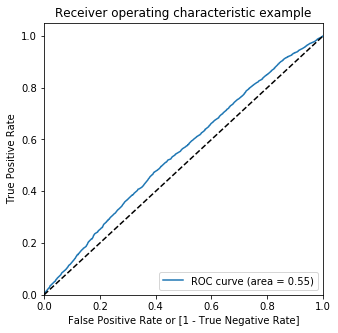

In [ ]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted,
                                         drop_intermediate = False )
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [ ]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              1.0     0.053455           45073          0    1    0    0   
1              0.0     0.041793            5295          0    1    0    0   
2              0.0     0.042130            6910          0    1    0    0   
3              0.0     0.039673           32987          0    1    0    0   
4              0.0     0.048059           54702          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy    sensi     speci
0.0   0.0  0.041733  1.00000  0.000000
0.1   0.1  0.956979  0.00245  0.998549
0.2   0.2  0.958246  0.00000  0.999979
0.3   0.3  0.958246  0.00000  0.999979
0.4   0.4  0.958267  0.00000  1.000000
0.5   0.5  0.958267  0.00000  1.000000
0.6   0.6  0.958267  0.00000  1.000000
0.7   0.7  0.958267  0.00000  1.000000
0.8   0.8  0.958267  0.00000  1.000000
0.9   0.9  0.958267  0.00000  1.000000


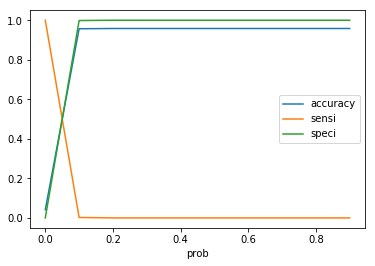

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# let's make prediction using cut off point equal to 0.05 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              1.0     0.053455           45073          0    1    0    0   
1              0.0     0.041793            5295          0    1    0    0   
2              0.0     0.042130            6910          0    1    0    0   
3              0.0     0.039673           32987          0    1    0    0   
4              0.0     0.048059           54702          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                1  
1    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0                0

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[39391  7474]
 [ 1624   417]]

Accuracy:0.814
Recall/Sensitivity: 0.20431161195492406
Precision: 0.052845013306298316
Specificity:0.841
AUC: 0.5508852373562705


After finding the cutoff probabilty, even though accuracy dropped a bit but sensitivity improved. but sensitivity is still too low to consider this as a good model.

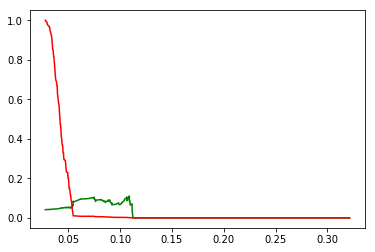

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Even though we have a good accuracy from the model built, but Sensitivity is very low which is of utmost importance in this project. Hence we can say that the predictive power of this model is not very good based on our results from the trainging dataset.

### Predictions on test data set

In [ ]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

## making prediction probabilities
y_test_pred = res.predict(X_test_sm)
## checking values
y_test_pred[:10]

37032    0.047942
58018    0.052780
5851     0.035666
5330     0.034942
35398    0.039755
18983    0.037859
36426    0.037324
11256    0.044764
4614     0.036444
14509    0.032852
dtype: float64

In [ ]:
# reshape to create an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.04794194, 0.05278016, 0.03566647, 0.0349423 , 0.03975519,
       0.03785947, 0.0373243 , 0.04476384, 0.03644385, 0.0328518 ])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

Performance Tag  probability  Application ID
0              0.0     0.047942           37032
1              0.0     0.052780           58018
2              0.0     0.035666            5851
3              0.0     0.034942            5330
4              0.0     0.039755           35398

In [ ]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              0.0     0.047942           37032          0
1              0.0     0.052780           58018          1
2              0.0     0.035666            5851          0
3              0.0     0.034942            5330          0
4              0.0     0.039755           35398          0

In [ ]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

# print("AUC:", round(metrics.roc_auc_score(y_test_pred_final["Performance Tag"], y_test_pred_final["probability"])))

Confusion Metrics:
 [[16742  3313]
 [  740   166]]

Accuracy:0.807
Recall/Sensitivity: 0.18322295805739514
Precision: 0.047714860592124174
Specificity:0.835


Sensitivity and Precision dropped even further on the test dataset.

### Additional predictions on rejected applicants

In [ ]:
# we had saved all the records with null values for perfromance tag to dataframe called rejected_demo_woe
rejected_demo_woe.shape

(1425, 11)

In [ ]:
rejected_demo_woe.head()

Age    Gender  Marital Status  No of dependents    Income  \
69603 -0.027258  0.010147       -0.023327         -0.040085 -0.337170   
69604  0.073437 -0.032174        0.004092          0.025204 -0.117647   
69605  0.021035  0.010147        0.004092         -0.053955 -0.337170   
69606 -0.068679  0.010147        0.004092         -0.053955 -0.089365   
69607  0.021035 -0.032174        0.004092          0.025204 -0.089365   

       Education  Profession  Type of residence  \
69603  -0.017314    0.028409           0.004454   
69604  -0.007949   -0.091424           0.004454   
69605   0.017931   -0.091424           0.004454   
69606  -0.007949    0.028409           0.004454   
69607   0.029512    0.028409           0.004454   

       No of months in current residence  No of months in current company  \
69603                          -0.421595                        -0.161652   
69604                          -0.032002                         0.016569   
69605                           0.148090                         0.016569   
69606                           0.148090                         0.083311   
69607                           0.148090                         0.083311   

       Performance Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

In [ ]:
# Putting feature variable to X
X_test = rejected_demo_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_demo_woe['Performance Tag']

In [ ]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

## making prediction probabilities
y_test_pred = res.predict(X_test_sm)
## checking values
y_test_pred[:10]

69603    0.053304
69604    0.039703
69605    0.043395
69606    0.042186
69607    0.035094
69608    0.050816
69609    0.041459
69610    0.035779
69611    0.054628
69612    0.048259
dtype: float64

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05330393, 0.03970255, 0.04339475, 0.04218614, 0.03509388,
       0.05081562, 0.04145899, 0.03577902, 0.05462768, 0.04825945])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

Performance Tag  probability  Application ID
0              1.0     0.053304           69603
1              1.0     0.039703           69604
2              1.0     0.043395           69605
3              1.0     0.042186           69606
4              1.0     0.035094           69607

In [ ]:
# Create new column 'predicted' with 1 if probability > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              1.0     0.053304           69603          1
1              1.0     0.039703           69604          0
2              1.0     0.043395           69605          0
3              1.0     0.042186           69606          0
4              1.0     0.035094           69607          0

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[  0   0]
 [889 536]]

Accuracy:0.376
Recall/Sensitivity: 0.376140350877193
Precision: 1.0
Specificity:nan


Accuracy dropped significantly on the test data, sensitivity has improved but its still very low. we can conclude that the model built above has weak predictive power. Lets try Regularized Logistic Regression on demographic dataset.

#### Regularized Logistic Regression on demographic dataset

In [ ]:
# Putting feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = demographic_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance, class_weight = balanced will take care of class imbalance in the dataset
model = LogisticRegression(class_weight='balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        scoring= 'recall',
                        cv = folds,
                        return_train_score=True, verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   13.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
## reviewing the results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.050664      0.004737         0.004788        0.000399   0.001   
1        0.154793      0.031962         0.004781        0.000395   0.001   
2        0.054454      0.003817         0.004788        0.000399    0.01   
3        0.204858      0.061457         0.004782        0.000396    0.01   
4        0.062433      0.002148         0.004987        0.000002     0.1   
5        0.249534      0.068918         0.004986        0.000631     0.1   
6        0.064028      0.002309         0.004787        0.000399       1   
7        0.306979      0.083049         0.004388        0.000798       1   
8        0.070012      0.002777         0.004987        0.000631      10   
9        0.341707      0.072437         0.004567        0.000788      10   
10       0.067617      0.001323         0.004788        0.000398     100   
11       0.346280      0.079142         0.004787        0.000399     100   
12       0.055848      0.004776         0.004195        0.000745    1000   
13       0.302796      0.073738         0.003977        0.000632    1000   

   param_penalty                          params  split0_test_score  \
0             l1   {'C': 0.001, 'penalty': 'l1'}           0.000000   
1             l2   {'C': 0.001, 'penalty': 'l2'}           0.432763   
2             l1    {'C': 0.01, 'penalty': 'l1'}           0.400978   
3             l2    {'C': 0.01, 'penalty': 'l2'}           0.471883   
4             l1     {'C': 0.1, 'penalty': 'l1'}           0.459658   
5             l2     {'C': 0.1, 'penalty': 'l2'}           0.464548   
6             l1     {'C': 1.0, 'penalty': 'l1'}           0.491443   
7             l2     {'C': 1.0, 'penalty': 'l2'}           0.484108   
8             l1    {'C': 10.0, 'penalty': 'l1'}           0.493888   
9             l2    {'C': 10.0, 'penalty': 'l2'}           0.493888   
10            l1   {'C': 100.0, 'penalty': 'l1'}           0.493888   
11            l2   {'C': 100.0, 'penalty': 'l2'}           0.493888   
12            l1  {'C': 1000.0, 'penalty': 'l1'}           0.493888   
13            l2  {'C': 1000.0, 'penalty': 'l2'}           0.493888   

    split1_test_score  split2_test_score       ...         mean_test_score  \
0            0.539216           0.522059       ...                0.436266   
1            0.433824           0.401961       ...                0.415474   
2            0.438725           0.387255       ...                0.402254   
3            0.463235           0.448529       ...                0.447318   
4            0.529412           0.509804       ...                0.506636   
5            0.529412           0.514706       ...                0.505164   
6            0.522059           0.522059       ...                0.510543   
7            0.517157           0.517157       ...                0.509566   
8            0.519608           0.507353       ...                0.508581   
9            0.522059           0.509804       ...                0.510052   
10           0.519608           0.509804       ...                0.509071   
11           0.519608           0.509804       ...                0.509071   
12           0.519608           0.509804       ...                0.509071   
13           0.519608           0.509804       ...                0.509071   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.218675               12            0.000000            0.549296   
1         0.021281               13            0.431985            0.411513   
2         0.021676               14            0.398284            0.412125   
3         0.025224               11            0.495711            0.443968   
4         0.034736                9            0.506740            0.521127   
5         0.030139               10            0.511029            0.529088   
6         0.016209                1            0.534314            0.5217

In [ ]:
## segerigating results for L1 and L2 regression and plotting them differently
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

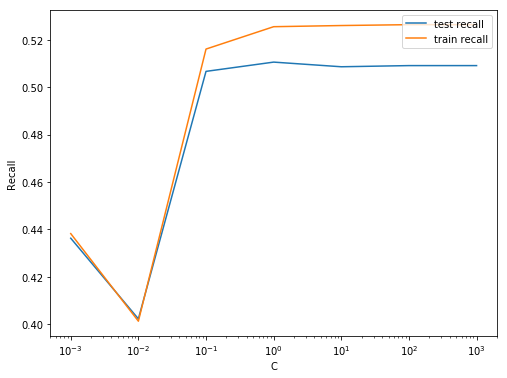

In [ ]:
## plotting results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

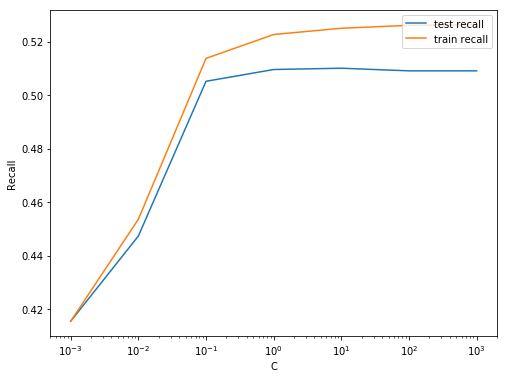

In [ ]:
## plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

In [ ]:
## checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.5105430199553713 at {'C': 1.0, 'penalty': 'l1'}


In [ ]:
## preparing final model based on best score
model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
model.fit(X_train,y_train)

# predictions on training dataset
y_train_pred = model.predict(X_train)

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built on traiing dataset
classification_metrics(y_train, y_train_pred )

Confusion Metrics:
 [[17617 29248]
 [  924  1117]]

Accuracy:0.383
Recall/Sensitivity: 0.5472807447329741
Precision: 0.03678577309402272
Specificity:0.376


Above logistic regression model with hyper parameter tuning have also not produced good results. Sensitivity is slightly higher than 50% which needs to be improved.

### Predictions on the test dataset

In [ ]:
# predictions on test dataset
y_test_pred = model.predict(X_test)

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# test dataset
classification_metrics(y_test, y_test_pred )

Confusion Metrics:
 [[ 7645 12410]
 [  433   473]]

Accuracy:0.387
Recall/Sensitivity: 0.522075055187638
Precision: 0.03671505084219514
Specificity:0.381


Accuracy and Sensitivity has reduced even further on the test data set.

In [ ]:
## lasso model parameters
model_parameters =list(model.coef_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
list(zip(cols, model_parameters))

[('Age', 0.0),
 ('Gender', 0.0),
 ('Marital Status', 0.0),
 ('No of dependents', 0.0),
 ('Income', 0.0),
 ('Education', 0.0),
 ('Profession', 0.0),
 ('Type of residence', 0.0),
 ('No of months in current residence', 0.006),
 ('No of months in current company', 0.0)]

### Predictions on rejected applicants

In [ ]:
# woe transformed dataset
rejected_demo_woe.head()

Age    Gender  Marital Status  No of dependents    Income  \
69603 -0.027258  0.010147       -0.023327         -0.040085 -0.337170   
69604  0.073437 -0.032174        0.004092          0.025204 -0.117647   
69605  0.021035  0.010147        0.004092         -0.053955 -0.337170   
69606 -0.068679  0.010147        0.004092         -0.053955 -0.089365   
69607  0.021035 -0.032174        0.004092          0.025204 -0.089365   

       Education  Profession  Type of residence  \
69603  -0.017314    0.028409           0.004454   
69604  -0.007949   -0.091424           0.004454   
69605   0.017931   -0.091424           0.004454   
69606  -0.007949    0.028409           0.004454   
69607   0.029512    0.028409           0.004454   

       No of months in current residence  No of months in current company  \
69603                          -0.421595                        -0.161652   
69604                          -0.032002                         0.016569   
69605                           0.148090                         0.016569   
69606                           0.148090                         0.083311   
69607                           0.148090                         0.083311   

       Performance Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

In [ ]:
# Putting feature variable to X
X_test = rejected_demo_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_demo_woe['Performance Tag']

In [ ]:
# predictions on test dataset
y_test_pred = model.predict(X_test)

In [ ]:
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[  0   0]
 [625 800]]

Accuracy:0.561
Recall/Sensitivity: 0.5614035087719298
Precision: 1.0
Specificity:nan


## Decision Tree Model

In [ ]:
# Putting feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = demographic_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.60      0.74     46865
        1.0       0.05      0.53      0.10      2041

avg / total       0.93      0.60      0.71     48906



In [ ]:
# performance metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[28195 18670]
 [  959  1082]]

Accuracy:0.599
Recall/Sensitivity: 0.5301322880940715
Precision: 0.05477926285945727
Specificity:0.602


In [ ]:
# predictions on the test dataset
y_test_pred= dt_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.59      0.73     20055
        1.0       0.05      0.48      0.09       906

avg / total       0.92      0.58      0.70     20961



In [ ]:
# performance metrics
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[11826  8229]
 [  473   433]]

Accuracy:0.585
Recall/Sensitivity: 0.47792494481236203
Precision: 0.04998845532209651
Specificity:0.59


In [ ]:
# Putting features
features = list(X_train.columns)
features

['Age',
 'Gender',
 'Marital Status',
 'No of dependents',
 'Income',
 'Education',
 'Profession',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company']

In [ ]:
# If you're on windows:
# Specifing path for dot file.
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [ ]:
# plot default decision tree
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,feature_names = list(X_train.columns) , filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

#### Hyperparameter Tuning

In [ ]:
# Tuning Max Depth parameter

# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 101)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   23.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.023538      0.001197         0.004190        0.000399   
1       0.031117      0.001466         0.004588        0.000488   
2       0.038497      0.002998         0.004189        0.000746   
3       0.046874      0.005535         0.004388        0.001018   
4       0.054614      0.003590         0.003790        0.001163   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.297414           0.321990   
1               2  {'max_depth': 2}           0.558190           0.321990   
2               3  {'max_depth': 3}           0.340517           0.515707   
3               4  {'max_depth': 4}           0.523707           0.549738   
4               5  {'max_depth': 5}           0.372845           0.515707   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.346835           0.280397       ...                0.263937   
1           0.346835           0.684864       ...                0.512351   
2           0.417722           0.471464       ...                0.436234   
3           0.351899           0.414392       ...                0.462659   
4           0.503797           0.464020       ...                0.469509   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.098053               15            0.280279            0.356841   
1        0.151265                1            0.551046            0.356841   
2        0.058416                7            0.355105            0.545509   
3        0.072147                4            0.514902            0.584690   
4        0.051292                3            0.455929            0.567209   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.351154            0.285104            0.128954   
1            0.351154            0.741758            0.680049   
2            0.438032            0.517705            0.509732   
3            0.385784            0.514652            0.535280   
4            0.544350            0.565934            0.566302   

   mean_train_score  std_train_score  
0          0.280466         0.082228  
1          0.536170         0.160983  
2          0.473216         0.068887  
3          0.507061         0.065802  
4          0.539945         0.042875  

[5 rows x 21 columns]

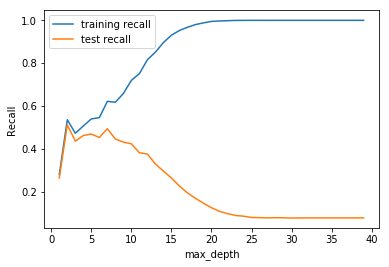

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

As we increase the value of max_depth, both training and test score increase till about max-depth = 8, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

In [ ]:
# Tuning min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.103094      0.008269         0.004391        0.000485   
1       0.107952      0.016282         0.005191        0.001160   
2       0.127931      0.016578         0.006981        0.003623   
3       0.079395      0.003371         0.003995        0.000013   
4       0.075019      0.002787         0.004182        0.000386   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.207824   
1                     25  {'min_samples_leaf': 25}           0.400978   
2                     45  {'min_samples_leaf': 45}           0.422983   
3                     65  {'min_samples_leaf': 65}           0.459658   
4                     85  {'min_samples_leaf': 85}           0.474328   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.205882           0.178922           0.188725       ...          
1           0.401961           0.348039           0.377451       ...          
2           0.404412           0.389706           0.463235       ...          
3           0.492647           0.455882           0.480392       ...          
4           0.490196           0.446078           0.468137       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.195977        0.010849               10            1.000000   
1         0.389019        0.024033                9            0.857230   
2         0.423322        0.025489                8            0.792892   
3         0.470853        0.013727                6            0.768382   
4         0.474767        0.017427                5            0.750000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.860992            0.848132            0.858543   
2            0.791182            0.801592            0.821188   
3            0.771586            0.770361            0.758726   
4            0.736069            0.749541            0.725658   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.859155          0.856810         0.004505  
2            0.788120          0.798995         0.011965  
3            0.780159          0.769843         0.006862  
4            0.746479          0.741549         0.009404  

[5 rows x 21 columns]

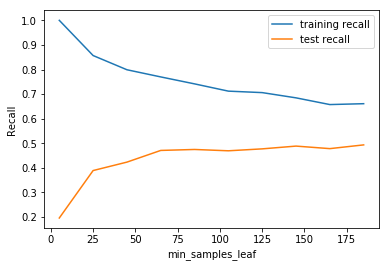

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

In [ ]:
# Tuning Min Sample Split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.137282      0.011220         0.006798        0.001601   
1       0.127021      0.024120         0.005586        0.001013   
2       0.102725      0.013186         0.004588        0.000798   
3       0.100534      0.007788         0.003997        0.000015   
4       0.090315      0.006897         0.003395        0.001740   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.124694   
1                      25  {'min_samples_split': 25}           0.290954   
2                      45  {'min_samples_split': 45}           0.356968   
3                      65  {'min_samples_split': 65}           0.396088   
4                      85  {'min_samples_split': 85}           0.408313   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.110294           0.102941           0.083333       ...          
1           0.274510           0.240196           0.279412       ...          
2           0.340686           0.308824           0.338235       ...          
3           0.389706           0.335784           0.384804       ...          
4           0.389706           0.401961           0.446078       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.106802        0.013663               10            1.000000   
1         0.284661        0.031678                9            0.993260   
2         0.347374        0.027247                8            0.945466   
3         0.384120        0.026142                7            0.908701   
4         0.418427        0.023356                6            0.868260   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.995101            0.993876            0.996326   
2            0.949173            0.944274            0.947336   
3            0.916718            0.893448            0.905695   
4            0.868953            0.883650            0.881813   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.993264          0.994365         0.001188  
2            0.949786          0.947207         0.002105  
3            0.899571          0.904827         0.007928  
4            0.856705          0.871876         0.009891  

[5 rows x 21 columns]

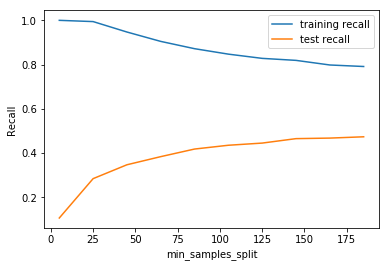

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

In [ ]:
# Grid Search to Find Optimal Hyperparameters

# Create the parameter grid
param_grid = {
    'max_depth': [4,5,6,7,8,9],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          scoring="recall", cv = n_folds,
                          return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   47.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7, 8, 9], 'min_samples_leaf': [100, 150, 200], 'min_samples_split': [100, 150, 200], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.049963      0.001495         0.004787        0.000399   
1       0.050539      0.008271         0.004197        0.000751   
2       0.050665      0.007393         0.004788        0.000977   
3       0.063231      0.010863         0.005785        0.002131   
4       0.075995      0.016857         0.004189        0.000977   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               4                    100   
1         entropy               4                    100   
2         entropy               4                    100   
3         entropy               4                    150   
4         entropy               4                    150   

  param_min_samples_split                                             params  \
0                     100  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
1                     150  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
2                     200  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
4                     150  {'criterion': 'entropy', 'max_depth': 4, 'min_...   

   split0_test_score       ...         mean_test_score  std_test_score  \
0           0.665037       ...                0.524677        0.094980   
1           0.665037       ...                0.524677        0.094980   
2           0.665037       ...                0.524677        0.094980   
3           0.665037       ...                0.524677        0.094625   
4           0.665037       ...                0.524677        0.094625   

   rank_test_score  split0_train_score  split1_train_score  \
0               13            0.677696            0.626454   
1               13            0.677696            0.626454   
2               13            0.677696            0.626454   
3               16            0.677696            0.626454   
4               16            0.677696            0.626454   

   split2_train_score  split3_train_score  split4_train_score  \
0             0.59951            0.401102            0.552358   
1             0.59951            0.401102            0.552358   
2             0.59951            0.401102            0.552358   
3             0.58665            0.401102            0.554807   
4             0.58665            0.401102            0.554807   

   mean_train_score  std_train_score  
0          0.571424         0.094323  
1          0.571424         0.094323  
2          0.571424         0.094323  
3          0.569342         0.093614  
4          0.569342         0.093614  

[5 rows x 24 columns]

In [ ]:
# printing the optimal recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.5403628254466022
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [ ]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',
                                  criterion='entropy',
                                  max_depth=4,
                                  min_samples_leaf=200,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [ ]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,feature_names=list(X_train.columns),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [ ]:
# classification metrics - training dataset
from sklearn.metrics import classification_report,confusion_matrix
y_train_pred = clf_entropy.predict(X_train)
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.58      0.72     46865
        1.0       0.05      0.54      0.10      2041

avg / total       0.93      0.57      0.70     48906



In [ ]:
# performance metrics
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[26992 19873]
 [  938  1103]]

Accuracy:0.574
Recall/Sensitivity: 0.540421362077413
Precision: 0.05258390541571319
Specificity:0.576


In [ ]:
# classification metrics
y_test_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.56      0.71     20055
        1.0       0.05      0.50      0.09       906

avg / total       0.92      0.56      0.68     20961



In [ ]:
# performance metrics
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[11315  8740]
 [  449   457]]

Accuracy:0.562
Recall/Sensitivity: 0.5044150110375276
Precision: 0.049690116342285526
Specificity:0.564


We have got decent accuracy and recall for the decision tree model on demographic dataset

### Predictions on Additional data (rejected applications)

In [ ]:
rejected_demo_woe.head()

Age    Gender  Marital Status  No of dependents    Income  \
69603 -0.027258  0.010147       -0.023327         -0.040085 -0.337170   
69604  0.073437 -0.032174        0.004092          0.025204 -0.117647   
69605  0.021035  0.010147        0.004092         -0.053955 -0.337170   
69606 -0.068679  0.010147        0.004092         -0.053955 -0.089365   
69607  0.021035 -0.032174        0.004092          0.025204 -0.089365   

       Education  Profession  Type of residence  \
69603  -0.017314    0.028409           0.004454   
69604  -0.007949   -0.091424           0.004454   
69605   0.017931   -0.091424           0.004454   
69606  -0.007949    0.028409           0.004454   
69607   0.029512    0.028409           0.004454   

       No of months in current residence  No of months in current company  \
69603                          -0.421595                        -0.161652   
69604                          -0.032002                         0.016569   
69605                           0.148090                         0.016569   
69606                           0.148090                         0.083311   
69607                           0.148090                         0.083311   

       Performance Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

In [ ]:
# Putting feature variable to X
X_test = rejected_demo_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_demo_woe['Performance Tag']

In [ ]:
## making predictions
y_test_pred = clf_entropy.predict(X_test)

## checking entropy
print("entropy score:",clf_entropy.score(X_test,y_test))

entropy score: 0.7375438596491228


In [ ]:
# performance metrics
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[   0    0]
 [ 374 1051]]

Accuracy:0.738
Recall/Sensitivity: 0.7375438596491228
Precision: 1.0
Specificity:nan


We have better results from the decision tree model, but we can still improve the model, lets try Random Forest on demographic dataset.

## Random Forest Model

In [ ]:
# Putting feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = demographic_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [ ]:
# predictions on test data
y_train_pred = rfc.predict(X_train)

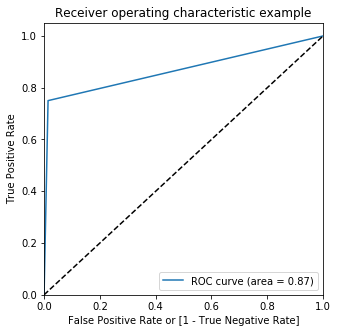

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred, drop_intermediate = False )

draw_roc(y_train, y_train_pred)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99     46865
        1.0       0.70      0.75      0.72      2041

avg / total       0.98      0.98      0.98     48906



In [ ]:
# performance metrics
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[46196   669]
 [  510  1531]]

Accuracy:0.976
Recall/Sensitivity: 0.7501224889759922
Precision: 0.6959090909090909
Specificity:0.986


We have got a good Accuracy & decent Sensitivity(recall) on the training dataset. lets now check the test dataset.

In [ ]:
# predictions on test data
y_test_pred = rfc.predict(X_test)

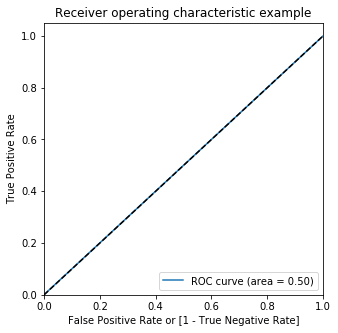

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

draw_roc(y_test, y_test_pred)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97     20055
        1.0       0.04      0.02      0.02       906

avg / total       0.92      0.94      0.93     20961



In [ ]:
# performance metrics
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[19736   319]
 [  891    15]]

Accuracy:0.942
Recall/Sensitivity: 0.016556291390728478
Precision: 0.04491017964071856
Specificity:0.984


Accuracy dropped a bit on the test dataset, Sensitivity(recall) has dropped drasticall on the test dataset, lets tune the hyperparameters and create a final RF model

### Hyperparameter Tuning

In [ ]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.098732      0.006065         0.014298        0.002660   
1       0.171885      0.009569         0.014760        0.001715   
2       0.231700      0.010643         0.018747        0.006248   
3       0.279776      0.020721         0.021471        0.003607   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.506112           0.534314   
1               7   {'max_depth': 7}           0.354523           0.382353   
2              12  {'max_depth': 12}           0.090465           0.107843   
3              17  {'max_depth': 17}           0.026895           0.017157   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.448529           0.360294       ...                0.463968   
1           0.335784           0.343137       ...                0.356199   
2           0.105392           0.095588       ...                0.104857   
3           0.026961           0.029412       ...                0.024987   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.059590                1            0.557598            0.568892   
1        0.016463                2            0.527574            0.557257   
2        0.011900                3            0.621324            0.623393   
3        0.004211                4            0.745098            0.732394   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.479486            0.371709            0.434170   
1            0.527250            0.523576            0.529088   
2            0.639314            0.603797            0.636865   
3            0.750765            0.754440            0.765462   

   mean_train_score  std_train_score  
0          0.482371         0.074462  
1          0.532949         0.012288  
2          0.624938         0.012738  
3          0.749632         0.010888  

[4 rows x 21 columns]

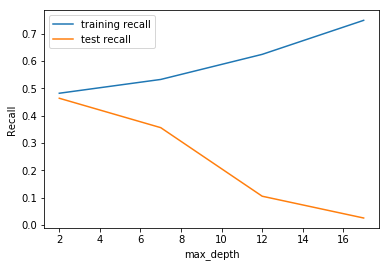

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observation
We can see that as we increase the value of max_depth, train scores keep increasing, but test score keep decreasing.
The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

We are getting the best test score at max depth = 7

In [ ]:
# Tuning n_estimators
# Let's try to find the optimum values for n_estimators and understand how the value of n_estimators
# impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced",max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.291197      0.122929         0.102325        0.021869   
1       5.306392      0.197812         0.380927        0.041377   
2       9.925306      1.178414         0.674676        0.064964   
3      14.475736      0.274481         1.030610        0.027235   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.459658   
1                500   {'n_estimators': 500}           0.440098   
2                900   {'n_estimators': 900}           0.454768   
3               1300  {'n_estimators': 1300}           0.449878   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.448529           0.409314           0.458333       ...          
1           0.448529           0.424020           0.460784       ...          
2           0.443627           0.424020           0.453431       ...          
3           0.436275           0.428922           0.455882       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.450755        0.022795                2            0.513480   
1         0.450274        0.018286                3            0.496324   
2         0.449287        0.015306                4            0.509191   
3         0.452230        0.021251                1            0.510417   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.505818            0.513778            0.488671   
1            0.508267            0.510104            0.488059   
2            0.506430            0.505818            0.491121   
3            0.502143            0.511329            0.491121   

   split4_train_score  mean_train_score  std_train_score  
0            0.524801          0.509310         0.011962  
1            0.519290          0.504409         0.010968  
2            0.526026          0.507717         0.011118  
3            0.533987          0.509799         0.014109  

[4 rows x 21 columns]

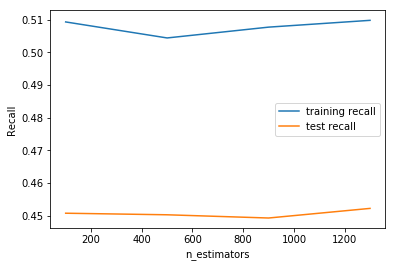

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observation

Training score is almost constant for all the different values of n estimators

Test score increases first and then starts decreasing

We are getting the best test score with n_estimators = 500

In [ ]:
# Let's see how the model performance varies with max_features, which is the maximum numbre of features considered
# for splitting at a node.
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10]}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced",max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.204358      0.015461         0.014761        0.001717   
1       0.320802      0.083825         0.013160        0.003183   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.466993   
1                 10  {'max_features': 10}           0.427873   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.487745           0.453431           0.524510       ...          
1           0.524510           0.382353           0.446078       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.492908        0.030896                1            0.532475   
1         0.449790        0.046822                2            0.503064   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.520514            0.513778            0.528475   
1            0.575628            0.496020            0.489284   

   split4_train_score  mean_train_score  std_train_score  
0            0.552358          0.529520         0.013117  
1            0.530925          0.518984         0.031667  

[2 rows x 21 columns]

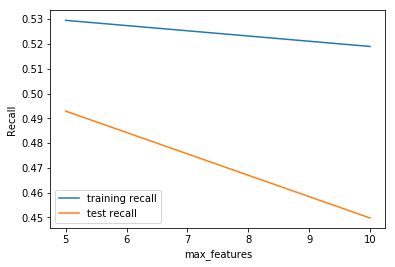

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


### Observations:
Training Recall increases as max features increases

Traing score decreases as max feature decreases

Best Test score is with max features = 5

Tree seems to be overfitting for the higher values of max features

In [ ]:
# Tuning min_samples_leaf
# The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.244365      0.019628         0.020249        0.001530   
1       0.191384      0.006909         0.017171        0.000743   
2       0.179344      0.003057         0.016176        0.001422   
3       0.171599      0.002657         0.015901        0.000652   
4       0.163909      0.003247         0.015256        0.000597   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.369193   
1                    150  {'min_samples_leaf': 150}           0.442543   
2                    200  {'min_samples_leaf': 200}           0.427873   
3                    250  {'min_samples_leaf': 250}           0.462103   
4                    300  {'min_samples_leaf': 300}           0.464548   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.382353           0.348039           0.382353       ...          
1           0.406863           0.404412           0.438725       ...          
2           0.421569           0.367647           0.470588       ...          
3           0.477941           0.414216           0.465686       ...          
4           0.475490           0.446078           0.475490       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.372368        0.013100                6            0.563725   
1         0.420862        0.016362                5            0.592525   
2         0.423810        0.032927                4            0.540441   
3         0.457617        0.022328                3            0.555147   
4         0.468400        0.012308                2            0.537990   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.552970            0.578690            0.562768   
1            0.556032            0.581139            0.574403   
2            0.529700            0.535211            0.566442   
3            0.574403            0.569504            0.549296   
4            0.558481            0.573178            0.543172   

   split4_train_score  mean_train_score  std_train_score  
0            0.589100          0.569451         0.012810  
1            0.563993          0.573618         0.012779  
2            0.564605          0.547280         0.015289  
3            0.554195          0.560509         0.009678  
4            0.568892          0.556343         0.013826  

[5 rows x 21 columns]

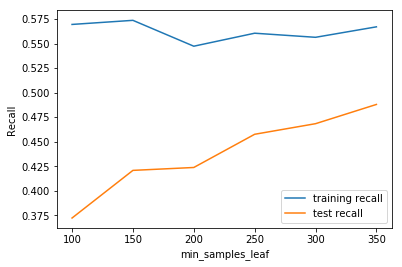

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observations:
Trainig recall is constant for all the different values of the min sample leaf

Test recall increases as the valye of sample leaf increases

Best recall is achieved at the valu of 350

In [ ]:
# Tuning min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.275426      0.028352         0.021141        0.001827   
1       0.240360      0.026690         0.020138        0.002314   
2       0.212114      0.010160         0.018498        0.002104   
3       0.224303      0.027781         0.019155        0.002026   
4       0.196161      0.004707         0.016560        0.000482   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.327628   
1                     250  {'min_samples_split': 250}           0.361858   
2                     300  {'min_samples_split': 300}           0.334963   
3                     350  {'min_samples_split': 350}           0.376528   
4                     400  {'min_samples_split': 400}           0.374083   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.286765           0.259804           0.308824       ...          
1           0.343137           0.296569           0.350490       ...          
2           0.345588           0.345588           0.401961       ...          
3           0.387255           0.318627           0.370098       ...          
4           0.343137           0.335784           0.387255       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.289056        0.026298                6            0.601103   
1         0.336098        0.022546                5            0.608456   
2         0.357678        0.023563                4            0.554534   
3         0.363051        0.023625                2            0.581495   
4         0.360111        0.019036                3            0.555760   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.576852            0.605021            0.606246   
1            0.579914            0.584201            0.593999   
2            0.566442            0.581751            0.592162   
3            0.568892            0.606859            0.567667   
4            0.567667            0.562768            0.573791   

   split4_train_score  mean_train_score  std_train_score  
0            0.571953          0.592235         0.014740  
1            0.610533          0.595421         0.012383  
2            0.605021          0.579982         0.017941  
3            0.583588          0.581700         0.014125  
4            0.570116          0.566020         0.006257  

[5 rows x 21 columns]

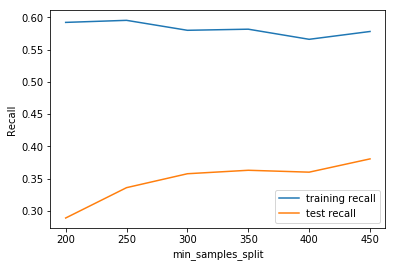

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observations:
Trainig recall is constant for all the different values of the min sample leaf

Test recall increases as the valye of sample split increases and becomes constant for values higher than 350

Best recall is achieved at the valu of 350

In [ ]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5,7,9],
    'n_estimators': [500,700,900],
    'max_features': [5, 10],
    'min_samples_leaf': [300,400],
    'min_samples_split': [300,400]
}
# Create a based model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="recall",return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 29.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 7, 9], 'n_estimators': [500, 700, 900], 'max_features': [5, 10], 'min_samples_leaf': [300, 400], 'min_samples_split': [300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.4688898681010422 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 400, 'min_samples_split': 400, 'n_estimators': 700}


In [ ]:
# model with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=5,
                             min_samples_leaf=400,
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=900)

In [ ]:
# model fit
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=400,
            min_samples_split=400, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [ ]:
# predict
predictions = rf.predict(X_train)

In [ ]:
print(classification_report(y_train,predictions))

             precision    recall  f1-score   support

        0.0       0.97      0.62      0.75     46865
        1.0       0.06      0.55      0.11      2041

avg / total       0.93      0.61      0.73     48906



In [ ]:
# performance metrics
classification_metrics(y_train, predictions)

Confusion Metrics:
 [[28944 17921]
 [  914  1127]]

Accuracy:0.615
Recall/Sensitivity: 0.5521803037726605
Precision: 0.05916631667366653
Specificity:0.618


We have decent accuracy and precision on the training dataset with best hyper parameters.

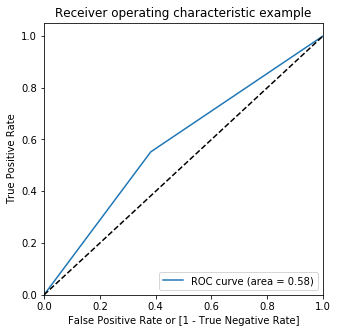

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, predictions, drop_intermediate = False )

draw_roc(y_train, predictions)

In [ ]:
# predict
predictions_test = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_test))

             precision    recall  f1-score   support

        0.0       0.96      0.61      0.75     20055
        1.0       0.05      0.48      0.09       906

avg / total       0.92      0.60      0.72     20961



In [ ]:
# performance metrics
classification_metrics(y_test, predictions_test)

Confusion Metrics:
 [[12197  7858]
 [  474   432]]

Accuracy:0.602
Recall/Sensitivity: 0.4768211920529801
Precision: 0.05211097708082026
Specificity:0.608


Even though accuracy & recall is less than that of the training dataset but there is a very good improvement in the numbers as comparison to default random forest model built earlier.

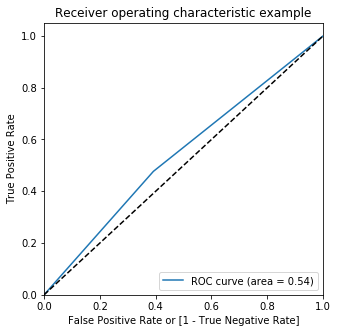

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, predictions_test, drop_intermediate = False )

draw_roc(y_test, predictions_test)

### Additional predictions on rejected applicants

In [ ]:
rejected_demo_woe.head()

Age    Gender  Marital Status  No of dependents    Income  \
69603 -0.027258  0.010147       -0.023327         -0.040085 -0.337170   
69604  0.073437 -0.032174        0.004092          0.025204 -0.117647   
69605  0.021035  0.010147        0.004092         -0.053955 -0.337170   
69606 -0.068679  0.010147        0.004092         -0.053955 -0.089365   
69607  0.021035 -0.032174        0.004092          0.025204 -0.089365   

       Education  Profession  Type of residence  \
69603  -0.017314    0.028409           0.004454   
69604  -0.007949   -0.091424           0.004454   
69605   0.017931   -0.091424           0.004454   
69606  -0.007949    0.028409           0.004454   
69607   0.029512    0.028409           0.004454   

       No of months in current residence  No of months in current company  \
69603                          -0.421595                        -0.161652   
69604                          -0.032002                         0.016569   
69605                           0.148090                         0.016569   
69606                           0.148090                         0.083311   
69607                           0.148090                         0.083311   

       Performance Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

In [ ]:
# Putting feature variable to X
X_rejected = rejected_demo_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_rejected = rejected_demo_woe['Performance Tag']

In [ ]:
# predict
y_rejected_pred = rf.predict(X_rejected)

In [ ]:
# performance metrics
classification_metrics(y_rejected, y_rejected_pred)

Confusion Metrics:
 [[   0    0]
 [ 388 1037]]

Accuracy:0.728
Recall/Sensitivity: 0.727719298245614
Precision: 1.0
Specificity:nan


Model has produced decent results on the rejected applicants data , let's see if numbers improves with master dataset model

# Summary of the models built on demographic dataset:
![image.png](attachment:image.png)

# Conclusion:

1. All the models built on the demographics dataset seems to have week predictive power.
2. Best Recall we have got is from the Random Forest Model which is around 54% on the training dataset and 49% on the test dataset. This obviously can not be considered to be a good model.

# Model Building on WOE Transformed Master DataSet

## Logistic Regression

In [ ]:
# lets check the dimensions of the woe transformed master dataset
master_woe.shape

(69867, 28)

In [ ]:
master_woe.describe()

Age        Gender  Marital Status  No of dependents  \
count  69867.000000  69867.000000    69867.000000      69867.000000   
mean       0.884496      0.000149        0.000044          0.001219   
std        7.528041      0.017977        0.009728          0.051822   
min       -0.068679     -0.032174       -0.023327         -0.053955   
25%       -0.029068      0.010147        0.004092         -0.040085   
50%        0.004443      0.010147        0.004092         -0.004391   
75%        0.024856      0.010147        0.004092          0.025204   
max       65.000000      0.010147        0.004092          0.085222   

             Income     Education    Profession  Type of residence  \
count  69867.000000  69867.000000  69867.000000       69867.000000   
mean       0.746114      0.000337      0.001009           0.000448   
std        4.887136      0.026011      0.046524           0.032852   
min       -0.337170     -0.492622     -0.091424          -0.080147   
25%       -0.089365     -0.007949      0.013298           0.004454   
50%        0.120508     -0.007949      0.028409           0.004454   
75%        0.239199      0.017931      0.028409           0.004454   
max       60.000000      0.029512      0.028409           0.530542   

       No of months in current residence  No of months in current company  \
count                       69867.000000                     69867.000000   
mean                            0.268321                         0.010352   
std                             5.637050                         0.521206   
min                            -0.421595                        -2.429563   
25%                            -0.062112                        -0.161652   
50%                             0.148090                         0.016569   
75%                             0.148090                         0.083311   
max                           126.000000                       133.000000   

                  ...              No of trades opened in last 6 months  \
count             ...                                      69867.000000   
mean              ...                                          0.089828   
std               ...                                          0.447985   
min               ...                                         -0.524277   
25%               ...                                         -0.332298   
50%               ...                                         -0.069072   
75%               ...                                          0.479566   
max               ...                                          0.657628   

       No of trades opened in last 12 months  \
count                           69867.000000   
mean                                0.117933   
std                                 0.549044   
min                                -0.564318   
25%                                -0.351122   
50%                                 0.080607   
75%                                 0.675361   
max                                28.000000   

       No of PL trades opened in last 6 months  \
count                             69867.000000   
mean                                  0.107487   
std                                   0.495493   
min                                  -0.438436   
25%                                  -0.423615   
50%                                  -0.199362   
75%                                   0.649212   
max                                   0.649212   

       No of PL trades opened in last 12 months  \
count                              69867.000000   
mean                                   0.148135   
std                                    0.595471   
min                                   -0.925486   
25%                                   -0.412296   
50%                                   -0.157721   
75%                                    0.893811   
max                                    0.893811   

       No of Inquiries in last 

In [ ]:
# lets display the woe transformed demographic dataset
master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company             ...              \
0                         0.204217             ...               
1                         0.083311             ...               
2                         0.083311             ...               
3                         0.204217             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                              0.479566   
1                              0.479566   
2                              0.657628   
3                              0.479566   
4                              0.657628   

   No of trades opened in last 12 months  \
0                               0.675361   
1                               0.675361   
2                               0.675361   
3                               0.675361   
4                               0.675361   

   No of PL trades opened in last 6 months  \
0                                 0.649212   
1                                 0.649212   
2                                 0.649212   
3                                 0.649212   
4                                 0.649212   

   No of PL trades opened in last 12 months  \
0                                  0.893811   
1                                  0.893811   
2                                  0.893811   
3                                  0.893811   
4                                  0.893811   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                            0.71823                
1                                            0.71823                
2                                            0.71823                
3                                            0.71823                
4                                            0.71823                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                           0.498244                 
1                                           0.498244                 
2                                           0.498244                 
3                                           0.498244                 
4                                           0.498244                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                    0.236658             0.822570            0.542715   
1                   -0.071778             0.186740            0.542715   
2                    0.236658             0.822570            0.542715   
3                    0.236658            -0.340984            0.542715   
4                    0.236658             0.822570            0.542715   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                    0.138368  
4                   -0.011985  

[5 rows x 28 columns]

In [ ]:
master_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 28 columns):
Age                                                                69867 non-null float64
Gender                                                             69867 non-null float64
Marital Status                                                     69867 non-null float64
No of dependents                                                   69867 non-null float64
Income                                                             69867 non-null float64
Education                                                          69867 non-null float64
Profession                                                         69867 non-null float64
Type of residence                                                  69867 non-null float64
No of months in current residence                                  69867 non-null float64
No of months in current company                                    69867 non-null

In [ ]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag']

In [ ]:
# lets check the X dataframe
X.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company             ...              \
0                         0.204217             ...               
1                         0.083311             ...               
2                         0.083311             ...               
3                         0.204217             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                              0.479566   
1                              0.479566   
2                              0.657628   
3                              0.479566   
4                              0.657628   

   No of trades opened in last 12 months  \
0                               0.675361   
1                               0.675361   
2                               0.675361   
3                               0.675361   
4                               0.675361   

   No of PL trades opened in last 6 months  \
0                                 0.649212   
1                                 0.649212   
2                                 0.649212   
3                                 0.649212   
4                                 0.649212   

   No of PL trades opened in last 12 months  \
0                                  0.893811   
1                                  0.893811   
2                                  0.893811   
3                                  0.893811   
4                                  0.893811   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                            0.71823                
1                                            0.71823                
2                                            0.71823                
3                                            0.71823                
4                                            0.71823                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                           0.498244                 
1                                           0.498244                 
2                                           0.498244                 
3                                           0.498244                 
4                                           0.498244                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                    0.236658             0.822570            0.542715   
1                   -0.071778             0.186740            0.542715   
2                    0.236658             0.822570            0.542715   
3                    0.236658            -0.340984            0.542715   
4                    0.236658             0.822570            0.542715   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                    0.138368  
4                   -0.011985  

[5 rows x 27 columns]

In [ ]:
# lets check the y dataframe containing the target variable
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag, dtype: float64

In [ ]:
# Please note, we do not need data scaling here as the data is already scaled

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
X_train.head()

Age    Gender  Marital Status  No of dependents    Income  \
45071 -0.029068 -0.032174        0.004092         -0.040085 -0.117647   
5295  -0.027258  0.010147       -0.023327         -0.040085 -0.117647   
6910  -0.029068 -0.032174        0.004092         -0.053955 -0.117647   
32986 -0.027258 -0.032174        0.004092         -0.040085 -0.089365   
54700 -0.029068  0.010147        0.004092          0.025204  0.239199   

       Education  Profession  Type of residence  \
45071  -0.017314   -0.091424          -0.004149   
5295   -0.017314    0.028409           0.004454   
6910   -0.007949   -0.091424           0.004454   
32986   0.017931    0.013298           0.004454   
54700  -0.017314   -0.091424           0.004454   

       No of months in current residence  No of months in current company  \
45071                          -0.032002                        -0.161652   
5295                           -0.032002                         0.083311   
6910                           -0.032002                         0.083311   
32986                           0.148090                         0.083311   
54700                          -0.421595                        -0.161652   

                  ...              No of trades opened in last 6 months  \
45071             ...                                          0.479566   
5295              ...                                          0.479566   
6910              ...                                          0.657628   
32986             ...                                         -0.069072   
54700             ...                                         -0.524277   

       No of trades opened in last 12 months  \
45071                               0.675361   
5295                                0.675361   
6910                                0.675361   
32986                              -0.351122   
54700                              -0.351122   

       No of PL trades opened in last 6 months  \
45071                                -0.199362   
5295                                  0.649212   
6910                                  0.649212   
32986                                -0.423615   
54700                                -0.423615   

       No of PL trades opened in last 12 months  \
45071                                 -0.251340   
5295                                   0.893811   
6910                                   0.893811   
32986                                 -0.500075   
54700                                 -0.378292   

       No of Inquiries in last 6 months (excluding home & auto loans)  \
45071                                          -0.177072                
5295                                            0.718230                
6910                                            0.718230                
32986                                          -0.171627                
54700                                          -0.554789                

       No of Inquiries in last 12 months (excluding home & auto loans)  \
45071                                           0.498244                 
5295                                            0.498244                 
6910                                            0.498244                 
32986                                           0.169477                 
54700                                          -0.305106                 

       Presence of open home loan  Outstanding Balance  Total No of Trades  \
45071                   -0.071778             0.186740            0.542715   
5295                    -0.071778             0.186740            0.542715   
6910                    -0.071778             0.186740            0.542715   
32986                   -0.071778            -0.449431            0.018415   
54700                    0.236658            -0.072432           -0.566631   

       Presence of open auto loan  
45071                   -0.011985  
5295                    -0.011

In [ ]:
X_test.head()

Age    Gender  Marital Status  No of dependents    Income  \
37031 -0.068679  0.010147        0.004092          0.025204  0.230548   
58016  0.004443  0.010147       -0.023327         -0.040085 -0.024854   
5851  -0.068679  0.010147        0.004092          0.025204 -0.024854   
5330  -0.068679  0.010147        0.004092         -0.040085  0.230548   
35397  0.073437  0.010147        0.004092          0.025204 -0.024854   

       Education  Profession  Type of residence  \
37031  -0.007949    0.028409           0.004454   
58016  -0.007949    0.028409           0.004454   
5851    0.017931    0.028409           0.004454   
5330    0.017931    0.013298          -0.004149   
35397  -0.007949    0.028409          -0.004149   

       No of months in current residence  No of months in current company  \
37031                           0.148090                        -0.169103   
58016                           0.148090                        -0.161652   
5851                           -0.049460                         0.083311   
5330                           -0.421595                         0.204217   
35397                           0.148090                         0.016569   

                  ...              No of trades opened in last 6 months  \
37031             ...                                         -0.105647   
58016             ...                                         -0.524277   
5851              ...                                          0.657628   
5330              ...                                          0.657628   
35397             ...                                         -0.332298   

       No of trades opened in last 12 months  \
37031                               0.080607   
58016                              -0.351122   
5851                                0.675361   
5330                                0.675361   
35397                               0.080607   

       No of PL trades opened in last 6 months  \
37031                                -0.352663   
58016                                -0.423615   
5851                                  0.649212   
5330                                  0.649212   
35397                                -0.438436   

       No of PL trades opened in last 12 months  \
37031                                 -0.426149   
58016                                 -0.426149   
5851                                   0.893811   
5330                                   0.893811   
35397                                 -0.378292   

       No of Inquiries in last 6 months (excluding home & auto loans)  \
37031                                          -0.216097                
58016                                          -0.428636                
5851                                            0.718230                
5330                                            0.718230                
35397                                           0.199624                

       No of Inquiries in last 12 months (excluding home & auto loans)  \
37031                                          -0.520996                 
58016                                          -0.231213                 
5851                                            0.498244                 
5330                                            0.498244                 
35397                                           0.169477                 

       Presence of open home loan  Outstanding Balance  Total No of Trades  \
37031                    0.236658            -0.072432            0.018415   
58016                   -0.071778            -0.449431           -0.394043   
5851                     0.236658             0.822570            0.542715   
5330                     0.236658             0.822570            0.542715   
35397                   -0.071778            -0.039272            0.243045   

       Presence of open auto loan  
37031                    0.138368  
58016                   -0.011

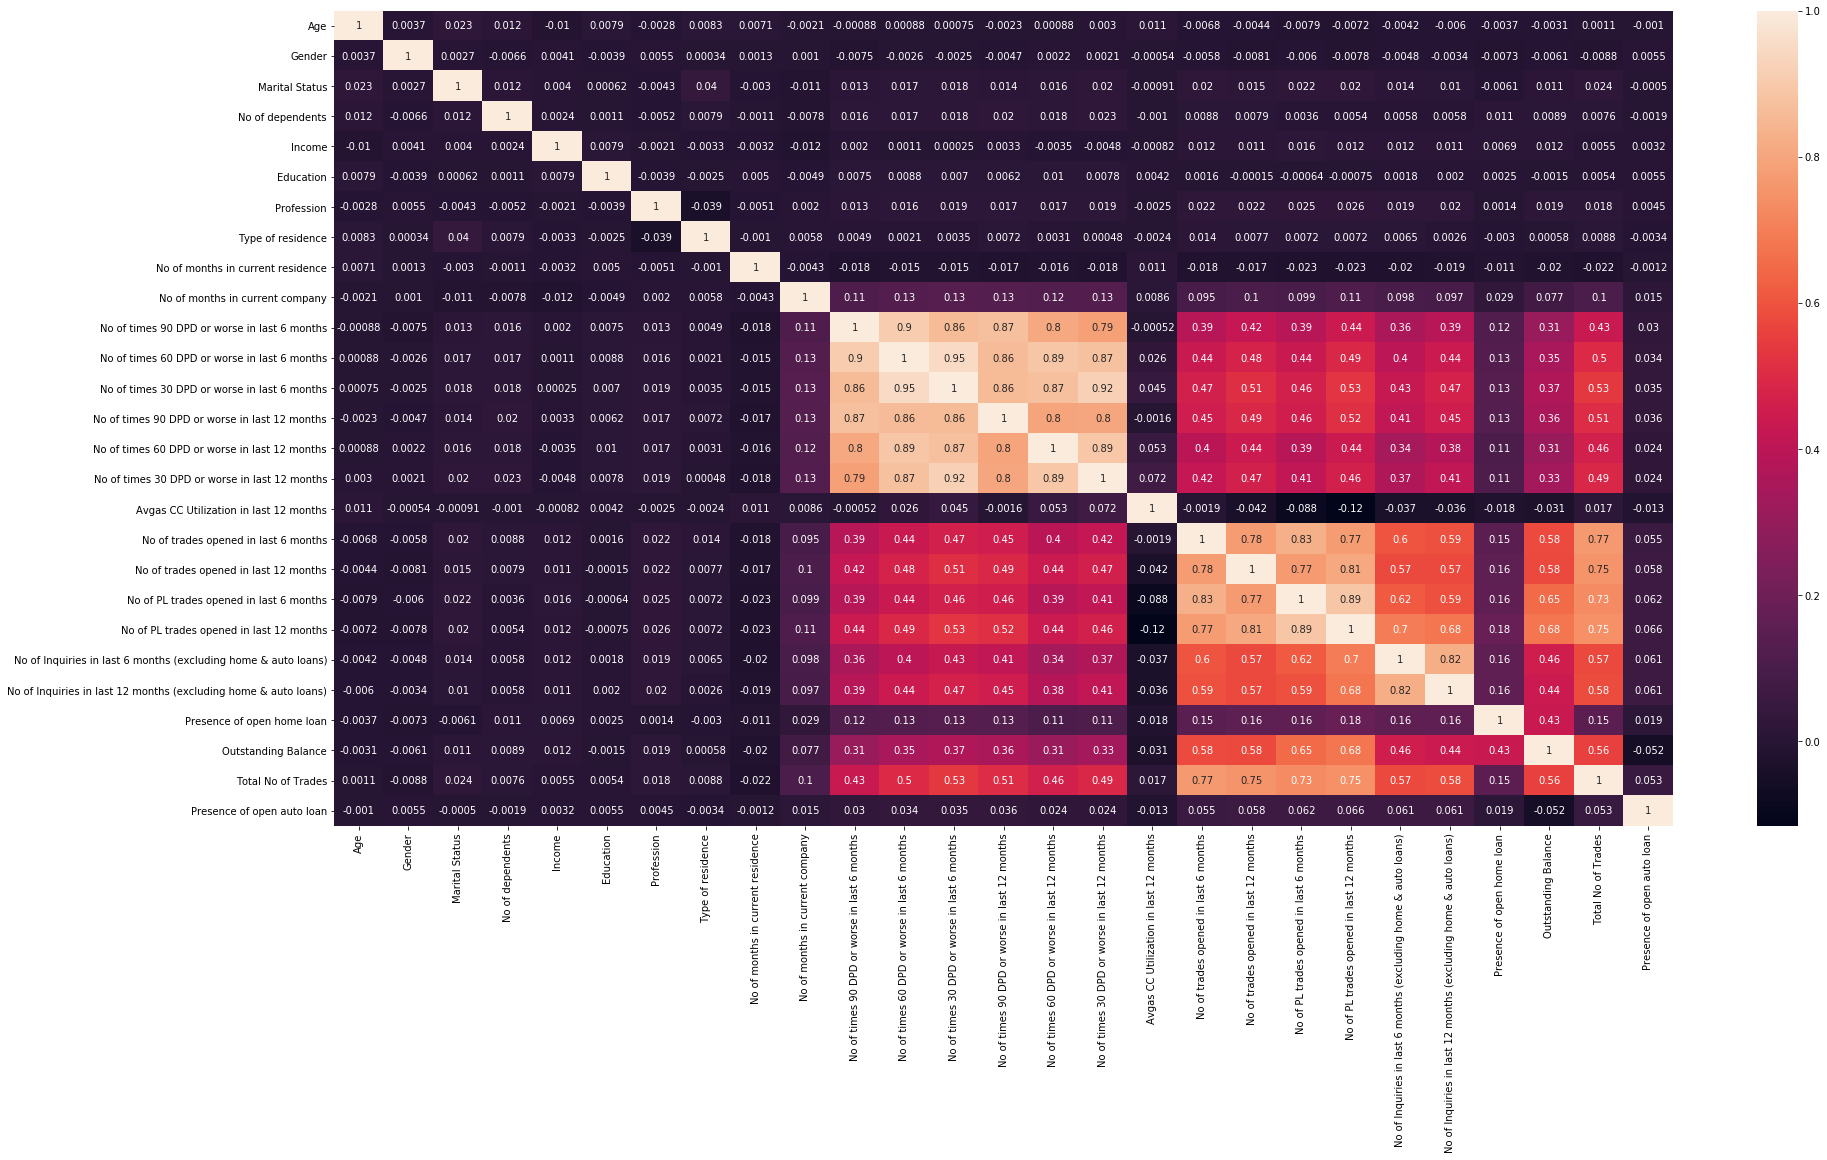

In [ ]:
## heat map for the numerical variables
plt.figure(figsize = (30, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

There seems to be high correlation between certain variables.

In [ ]:
# check class imbalance
(y_train.value_counts()/y_train.shape)*100

# Dataset is imbalanced, we will handle it later

0.0    95.826688
1.0     4.173312
Name: Performance Tag, dtype: float64

In [ ]:
# lets save all the variable except the target variable
col = master_woe.drop("Performance Tag",1).columns
col

Index(['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income',
       'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'T

In [ ]:
# Default logistic regression model
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48878
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:51   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.416      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.132      0.895      -0.006       0.006
Gender                                                             -1.2889      1.256     -1.027      0.305      -3.750       1.172
Marital Status                                                      3.6470      2.386      1.529      0.126      -1.029       8.323
No of dependents                                                   -1.4885      0.450     -3.311      0.001      -2.370      -0.607
Income                                                              0.0026      0.005      0.532      0.595      -0.007       0.012
Education                                                          -1.5059      0.703     -2.143      0.032      -2.883      -0.129
Profession                                                         -0.6320      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8071      0.786     -1.027      0.304      -2.347       0.733
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.646      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1160      0.181     -0.641      0.522      -0.471       0.239
No of times 30 DPD or worse in last 6 months                       -0.1128      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.122      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.296      0.022      -0.589      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.973      0.330      -0.001       0.003
No of trades opened in last 6 months                               -0.0096      0.102     -0.094      0.925      -0.209       0.190
No of trades opened in last 12 months                               0.0398      0.062      0.642      0.521      -0.082       0.161
No of PL trades opened in last 6 months                            -0.0235      0.110     -0.213      0.831      -0.240       

In [ ]:
# p-value of the feauture presence of home loan is high, lets drop it and re create the model
col = col.drop('Presence of open home loan', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48879
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:52   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.432      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.132      0.895      -0.006       0.006
Gender                                                             -1.2894      1.256     -1.027      0.304      -3.750       1.171
Marital Status                                                      3.6463      2.386      1.528      0.126      -1.030       8.322
No of dependents                                                   -1.4883      0.449     -3.311      0.001      -2.369      -0.607
Income                                                              0.0026      0.005      0.532      0.594      -0.007       0.012
Education                                                          -1.5059      0.703     -2.143      0.032      -2.883      -0.128
Profession                                                         -0.6320      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8071      0.786     -1.027      0.304      -2.347       0.733
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.646      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1159      0.181     -0.641      0.522      -0.471       0.239
No of times 30 DPD or worse in last 6 months                       -0.1128      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.121      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.296      0.022      -0.589      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.973      0.331      -0.001       0.003
No of trades opened in last 6 months                               -0.0096      0.102     -0.095      0.925      -0.209       0.190
No of trades opened in last 12 months                               0.0398      0.062      0.643      0.520      -0.082       0.161
No of PL trades opened in last 6 months                            -0.0236      0.110     -0.214      0.831      -0.240       

In [ ]:
# p-value of the feauture "No of trades opened in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of trades opened in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48880
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:52   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.432      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.131      0.895      -0.006       0.006
Gender                                                             -1.2900      1.256     -1.028      0.304      -3.751       1.171
Marital Status                                                      3.6469      2.386      1.529      0.126      -1.029       8.323
No of dependents                                                   -1.4887      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.532      0.595      -0.007       0.012
Education                                                          -1.5055      0.703     -2.143      0.032      -2.883      -0.128
Profession                                                         -0.6319      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8083      0.785     -1.029      0.303      -2.348       0.731
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4393      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.645      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1158      0.181     -0.640      0.522      -0.470       0.239
No of times 30 DPD or worse in last 6 months                       -0.1129      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.122      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3177      0.138     -2.297      0.022      -0.589      -0.047
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.968      0.333      -0.001       0.003
No of trades opened in last 12 months                               0.0386      0.061      0.631      0.528      -0.081       0.158
No of PL trades opened in last 6 months                            -0.0284      0.098     -0.291      0.771      -0.220       0.163
No of PL trades opened in last 12 months                           -0.4142      0.106     -3.900      0.000      -0.622      -

In [ ]:
# p-value of the feauture "Total No of Trades" is high, lets drop it and re create the model
col = col.drop('Total No of Trades', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48881
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:53   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.433      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.131      0.896      -0.006       0.006
Gender                                                             -1.2908      1.255     -1.028      0.304      -3.752       1.170
Marital Status                                                      3.6508      2.386      1.530      0.126      -1.025       8.326
No of dependents                                                   -1.4888      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.531      0.595      -0.007       0.012
Education                                                          -1.5047      0.703     -2.141      0.032      -2.882      -0.128
Profession                                                         -0.6325      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8079      0.785     -1.029      0.304      -2.347       0.732
No of months in current residence                                   0.0051      0.003      1.899      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1164      0.181     -0.644      0.520      -0.471       0.238
No of times 30 DPD or worse in last 6 months                       -0.1118      0.177     -0.631      0.528      -0.459       0.235
No of times 90 DPD or worse in last 12 months                      -0.2185      0.103     -2.118      0.034      -0.421      -0.016
No of times 60 DPD or worse in last 12 months                       0.0406      0.135      0.300      0.764      -0.224       0.305
No of times 30 DPD or worse in last 12 months                      -0.3172      0.138     -2.294      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.987      0.324      -0.001       0.003
No of trades opened in last 12 months                               0.0405      0.058      0.695      0.487      -0.074       0.155
No of PL trades opened in last 6 months                            -0.0257      0.095     -0.269      0.788      -0.212       0.161
No of PL trades opened in last 12 months                           -0.4131      0.106     -3.905      0.000      -0.620      -

In [ ]:
# p-value of the feauture "Age" is high, lets drop it and re create the model
col = col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48882
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:53   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.911      0.000      -3.252      -3.140
Gender                                                             -1.2912      1.255     -1.028      0.304      -3.752       1.169
Marital Status                                                      3.6444      2.385      1.528      0.127      -1.030       8.319
No of dependents                                                   -1.4894      0.449     -3.314      0.001      -2.370      -0.609
Income                                                              0.0026      0.005      0.533      0.594      -0.007       0.012
Education                                                          -1.5054      0.703     -2.142      0.032      -2.883      -0.128
Profession                                                         -0.6324      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8085      0.785     -1.029      0.303      -2.348       0.731
No of months in current residence                                   0.0051      0.003      1.897      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.608      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1165      0.181     -0.644      0.519      -0.471       0.238
No of times 30 DPD or worse in last 6 months                       -0.1116      0.177     -0.630      0.529      -0.459       0.236
No of times 90 DPD or worse in last 12 months                      -0.2184      0.103     -2.117      0.034      -0.421      -0.016
No of times 60 DPD or worse in last 12 months                       0.0406      0.135      0.300      0.764      -0.224       0.305
No of times 30 DPD or worse in last 12 months                      -0.3173      0.138     -2.295      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.986      0.324      -0.001       0.003
No of trades opened in last 12 months                               0.0405      0.058      0.694      0.488      -0.074       0.155
No of PL trades opened in last 6 months                            -0.0256      0.095     -0.268      0.788      -0.212       0.161
No of PL trades opened in last 12 months                           -0.4131      0.106     -3.905      0.000      -0.620      -0.206
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0968      0.087     -1.111      0.266      -0.268       

In [ ]:
# p-value of the feauture "No of PL trades opened in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of PL trades opened in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48883
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:54   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1958      0.029   -111.930      0.000      -3.252      -3.140
Gender                                                             -1.2925      1.255     -1.030      0.303      -3.753       1.168
Marital Status                                                      3.6384      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4888      0.449     -3.313      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5050      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6328      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8101      0.786     -1.031      0.302      -2.350       0.730
No of months in current residence                                   0.0051      0.003      1.899      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1170      0.181     -0.647      0.518      -0.472       0.237
No of times 30 DPD or worse in last 6 months                       -0.1107      0.177     -0.625      0.532      -0.458       0.236
No of times 90 DPD or worse in last 12 months                      -0.2182      0.103     -2.116      0.034      -0.420      -0.016
No of times 60 DPD or worse in last 12 months                       0.0407      0.135      0.302      0.763      -0.224       0.306
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.298      0.022      -0.589      -0.047
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.984      0.325      -0.001       0.003
No of trades opened in last 12 months                               0.0378      0.059      0.645      0.519      -0.077       0.153
No of PL trades opened in last 12 months                           -0.4284      0.089     -4.797      0.000      -0.603      -0.253
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0973      0.087     -1.117      0.264      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4404      0.110     -3.988      0.000      -0.657      -

In [ ]:
# p-value of the feauture "Presence of open auto loan" is high, lets drop it and re create the model
col = col.drop('Presence of open auto loan', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48884
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.6
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:54   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.933      0.000      -3.252      -3.140
Gender                                                             -1.2940      1.255     -1.031      0.303      -3.755       1.167
Marital Status                                                      3.6385      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4887      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5064      0.702     -2.144      0.032      -2.883      -0.130
Profession                                                         -0.6338      0.476     -1.330      0.183      -1.567       0.300
Type of residence                                                  -0.8094      0.786     -1.030      0.303      -2.349       0.730
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4396      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2033      0.124      1.642      0.101      -0.039       0.446
No of times 60 DPD or worse in last 6 months                       -0.1173      0.181     -0.649      0.517      -0.472       0.237
No of times 30 DPD or worse in last 6 months                       -0.1109      0.177     -0.626      0.531      -0.458       0.236
No of times 90 DPD or worse in last 12 months                      -0.2182      0.103     -2.116      0.034      -0.420      -0.016
No of times 60 DPD or worse in last 12 months                       0.0408      0.135      0.302      0.763      -0.224       0.306
No of times 30 DPD or worse in last 12 months                      -0.3173      0.138     -2.295      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.983      0.326      -0.001       0.003
No of trades opened in last 12 months                               0.0374      0.059      0.638      0.523      -0.077       0.152
No of PL trades opened in last 12 months                           -0.4301      0.089     -4.825      0.000      -0.605      -0.255
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0974      0.087     -1.118      0.264      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4407      0.110     -3.990      0.000      -0.657      -

In [ ]:
# p-value of the feauture "No of times 60 DPD or worse in last 12 months" is high, lets drop it and re create the model
col = col.drop('No of times 60 DPD or worse in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48885
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.6
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:55   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.930      0.000      -3.252      -3.140
Gender                                                             -1.2929      1.255     -1.030      0.303      -3.754       1.168
Marital Status                                                      3.6344      2.385      1.524      0.128      -1.040       8.309
No of dependents                                                   -1.4890      0.449     -3.313      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5047      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6332      0.476     -1.329      0.184      -1.567       0.300
Type of residence                                                  -0.8080      0.785     -1.029      0.304      -2.347       0.731
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4384      0.168     -2.602      0.009      -0.769      -0.108
No of times 90 DPD or worse in last 6 months                        0.2026      0.124      1.636      0.102      -0.040       0.445
No of times 60 DPD or worse in last 6 months                       -0.0938      0.163     -0.575      0.565      -0.414       0.226
No of times 30 DPD or worse in last 6 months                       -0.1147      0.177     -0.650      0.516      -0.461       0.231
No of times 90 DPD or worse in last 12 months                      -0.2153      0.103     -2.097      0.036      -0.417      -0.014
No of times 30 DPD or worse in last 12 months                      -0.3022      0.129     -2.345      0.019      -0.555      -0.050
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.997      0.319      -0.001       0.003
No of trades opened in last 12 months                               0.0379      0.058      0.649      0.516      -0.077       0.152
No of PL trades opened in last 12 months                           -0.4307      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0979      0.087     -1.124      0.261      -0.269       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4406      0.110     -3.989      0.000      -0.657      -0.224
Outstanding Balance                                                -0.1490      0.079     -1.891      0.059      -0.303       

In [ ]:
# p-value of the feauture "Income" is high, lets drop it and re create the model
col = col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48886
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.7
Date:                Mon, 23 Dec 2019   Deviance:                       16211.
Time:                        14:04:55   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.927      0.000      -3.249      -3.138
Gender                                                             -1.2895      1.255     -1.027      0.304      -3.750       1.171
Marital Status                                                      3.6386      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4885      0.449     -3.312      0.001      -2.369      -0.608
Education                                                          -1.5013      0.703     -2.137      0.033      -2.878      -0.124
Profession                                                         -0.6340      0.476     -1.331      0.183      -1.568       0.300
Type of residence                                                  -0.8092      0.785     -1.031      0.303      -2.348       0.730
No of months in current residence                                   0.0051      0.003      1.896      0.058      -0.000       0.010
No of months in current company                                    -0.4389      0.168     -2.605      0.009      -0.769      -0.109
No of times 90 DPD or worse in last 6 months                        0.2026      0.124      1.636      0.102      -0.040       0.445
No of times 60 DPD or worse in last 6 months                       -0.0935      0.163     -0.573      0.567      -0.413       0.226
No of times 30 DPD or worse in last 6 months                       -0.1148      0.177     -0.650      0.515      -0.461       0.231
No of times 90 DPD or worse in last 12 months                      -0.2152      0.103     -2.096      0.036      -0.416      -0.014
No of times 30 DPD or worse in last 12 months                      -0.3028      0.129     -2.350      0.019      -0.555      -0.050
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.997      0.319      -0.001       0.003
No of trades opened in last 12 months                               0.0380      0.058      0.652      0.515      -0.076       0.152
No of PL trades opened in last 12 months                           -0.4306      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0978      0.087     -1.122      0.262      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4404      0.110     -3.987      0.000      -0.657      -0.224
Outstanding Balance                                                -0.1488      0.079     -1.888      0.059      -0.303       0.006
==============================================================================================================================

In [ ]:
# p-value of the feauture "No of times 60 DPD or worse in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of times 60 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48887
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.9
Date:                Mon, 23 Dec 2019   Deviance:                       16212.
Time:                        14:04:56   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1938      0.028   -112.927      0.000      -3.249      -3.138
Gender                                                             -1.2961      1.255     -1.032      0.302      -3.757       1.164
Marital Status                                                      3.6391      2.385      1.526      0.127      -1.035       8.313
No of dependents                                                   -1.4874      0.449     -3.310      0.001      -2.368      -0.607
Education                                                          -1.5049      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6325      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8057      0.785     -1.026      0.305      -2.345       0.733
No of months in current residence                                   0.0051      0.003      1.894      0.058      -0.000       0.010
No of months in current company                                    -0.4383      0.169     -2.601      0.009      -0.769      -0.108
No of times 90 DPD or worse in last 6 months                        0.1694      0.110      1.539      0.124      -0.046       0.385
No of times 30 DPD or worse in last 6 months                       -0.1730      0.143     -1.206      0.228      -0.454       0.108
No of times 90 DPD or worse in last 12 months                      -0.2160      0.103     -2.105      0.035      -0.417      -0.015
No of times 30 DPD or worse in last 12 months                      -0.3041      0.129     -2.361      0.018      -0.557      -0.052
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.010      0.313      -0.001       0.003
No of trades opened in last 12 months                               0.0382      0.058      0.656      0.512      -0.076       0.152
No of PL trades opened in last 12 months                           -0.4305      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0976      0.087     -1.121      0.262      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4401      0.110     -3.984      0.000      -0.657      -0.224
Outstanding Balance                                                -0.1487      0.079     -1.888      0.059      -0.303       0.006
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "No of trades opened in last 12 months" is high, lets drop it and re create the model
col = col.drop('No of trades opened in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm,class_weight="balanced", family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48888
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8106.1
Date:                Mon, 23 Dec 2019   Deviance:                       16212.
Time:                        14:04:56   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1938      0.028   -112.926      0.000      -3.249      -3.138
Gender                                                             -1.2985      1.255     -1.034      0.301      -3.759       1.162
Marital Status                                                      3.6339      2.385      1.524      0.128      -1.040       8.308
No of dependents                                                   -1.4868      0.449     -3.308      0.001      -2.368      -0.606
Education                                                          -1.5048      0.702     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6322      0.476     -1.327      0.184      -1.566       0.301
Type of residence                                                  -0.8033      0.785     -1.023      0.306      -2.343       0.736
No of months in current residence                                   0.0051      0.003      1.896      0.058      -0.000       0.010
No of months in current company                                    -0.4377      0.169     -2.597      0.009      -0.768      -0.107
No of times 90 DPD or worse in last 6 months                        0.1669      0.110      1.517      0.129      -0.049       0.382
No of times 30 DPD or worse in last 6 months                       -0.1714      0.143     -1.195      0.232      -0.452       0.110
No of times 90 DPD or worse in last 12 months                      -0.2135      0.103     -2.082      0.037      -0.414      -0.012
No of times 30 DPD or worse in last 12 months                      -0.3007      0.129     -2.337      0.019      -0.553      -0.049
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.046      0.296      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4039      0.079     -5.092      0.000      -0.559      -0.248
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0985      0.087     -1.131      0.258      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4386      0.110     -3.971      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1459      0.079     -1.855      0.064      -0.300       0.008
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Type of residence" is high, lets drop it and re create the model
col = col.drop('Type of residence', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8106.7
Date:                Mon, 23 Dec 2019   Deviance:                       16213.
Time:                        14:04:56   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.930      0.000      -3.249      -3.138
Gender                                                             -1.2968      1.255     -1.033      0.302      -3.757       1.164
Marital Status                                                      3.5316      2.383      1.482      0.138      -1.138       8.202
No of dependents                                                   -1.4893      0.450     -3.313      0.001      -2.370      -0.608
Education                                                          -1.5069      0.703     -2.144      0.032      -2.884      -0.129
Profession                                                         -0.6114      0.476     -1.285      0.199      -1.544       0.321
No of months in current residence                                   0.0051      0.003      1.897      0.058      -0.000       0.010
No of months in current company                                    -0.4396      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.1668      0.110      1.516      0.130      -0.049       0.382
No of times 30 DPD or worse in last 6 months                       -0.1718      0.143     -1.199      0.231      -0.453       0.109
No of times 90 DPD or worse in last 12 months                      -0.2143      0.103     -2.090      0.037      -0.415      -0.013
No of times 30 DPD or worse in last 12 months                      -0.2995      0.129     -2.327      0.020      -0.552      -0.047
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.046      0.296      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4043      0.079     -5.097      0.000      -0.560      -0.249
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0985      0.087     -1.131      0.258      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4384      0.110     -3.969      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1457      0.079     -1.853      0.064      -0.300       0.008
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Gender" is high, lets drop it and re create the model
col = col.drop('Gender', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8107.2
Date:                Mon, 23 Dec 2019   Deviance:                       16214.
Time:                        14:04:57   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.936      0.000      -3.249      -3.138
Marital Status                                                      3.5204      2.383      1.478      0.140      -1.150       8.190
No of dependents                                                   -1.4855      0.450     -3.305      0.001      -2.367      -0.604
Education                                                          -1.5024      0.703     -2.138      0.033      -2.880      -0.125
Profession                                                         -0.6151      0.476     -1.293      0.196      -1.548       0.318
No of months in current residence                                   0.0051      0.003      1.893      0.058      -0.000       0.010
No of months in current company                                    -0.4397      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.1680      0.110      1.527      0.127      -0.048       0.384
No of times 30 DPD or worse in last 6 months                       -0.1717      0.143     -1.198      0.231      -0.453       0.109
No of times 90 DPD or worse in last 12 months                      -0.2143      0.103     -2.090      0.037      -0.415      -0.013
No of times 30 DPD or worse in last 12 months                      -0.3007      0.129     -2.338      0.019      -0.553      -0.049
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.047      0.295      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4038      0.079     -5.091      0.000      -0.559      -0.248
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0988      0.087     -1.135      0.257      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4383      0.110     -3.968      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1456      0.079     -1.852      0.064      -0.300       0.009
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Avgas CC Utilization in last 12 months" is high, lets drop it and re create the model
col = col.drop('Avgas CC Utilization in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8107.7
Date:                Mon, 23 Dec 2019   Deviance:                       16215.
Time:                        14:04:57   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1881      0.028   -115.116      0.000      -3.242      -3.134
Marital Status                                                      3.5187      2.383      1.477      0.140      -1.151       8.189
No of dependents                                                   -1.4872      0.450     -3.308      0.001      -2.368      -0.606
Education                                                          -1.4989      0.703     -2.132      0.033      -2.877      -0.121
Profession                                                         -0.6158      0.476     -1.294      0.196      -1.549       0.317
No of months in current residence                                   0.0051      0.003      1.906      0.057      -0.000       0.010
No of months in current company                                    -0.4372      0.168     -2.595      0.009      -0.767      -0.107
No of times 90 DPD or worse in last 6 months                        0.1614      0.110      1.469      0.142      -0.054       0.377
No of times 30 DPD or worse in last 6 months                       -0.1687      0.143     -1.177      0.239      -0.450       0.112
No of times 90 DPD or worse in last 12 months                      -0.2161      0.103     -2.107      0.035      -0.417      -0.015
No of times 30 DPD or worse in last 12 months                      -0.2890      0.128     -2.253      0.024      -0.540      -0.038
No of PL trades opened in last 12 months                           -0.4154      0.079     -5.287      0.000      -0.569      -0.261
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0952      0.087     -1.094      0.274      -0.266       0.075
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4368      0.111     -3.952      0.000      -0.653      -0.220
Outstanding Balance                                                -0.1396      0.078     -1.781      0.075      -0.293       0.014
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "No of Inquiries in last 6 months (excluding home & auto loans)" is high, lets drop it and re create the model
col = col.drop('No of Inquiries in last 6 months (excluding home & auto loans)', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48892
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8108.3
Date:                Mon, 23 Dec 2019   Deviance:                       16217.
Time:                        14:04:57   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1964      0.027   -119.630      0.000      -3.249      -3.144
Marital Status                                                      3.5216      2.383      1.478      0.139      -1.148       8.192
No of dependents                                                   -1.4884      0.450     -3.311      0.001      -2.370      -0.607
Education                                                          -1.5018      0.703     -2.136      0.033      -2.880      -0.124
Profession                                                         -0.6161      0.476     -1.295      0.195      -1.549       0.317
No of months in current residence                                   0.0051      0.003      1.911      0.056      -0.000       0.010
No of months in current company                                    -0.4390      0.168     -2.605      0.009      -0.769      -0.109
No of times 90 DPD or worse in last 6 months                        0.1608      0.110      1.464      0.143      -0.054       0.376
No of times 30 DPD or worse in last 6 months                       -0.1701      0.143     -1.187      0.235      -0.451       0.111
No of times 90 DPD or worse in last 12 months                      -0.2145      0.103     -2.092      0.036      -0.415      -0.014
No of times 30 DPD or worse in last 12 months                      -0.2874      0.128     -2.242      0.025      -0.539      -0.036
No of PL trades opened in last 12 months                           -0.4328      0.077     -5.618      0.000      -0.584      -0.282
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5102      0.088     -5.781      0.000      -0.683      -0.337
Outstanding Balance                                                -0.1386      0.078     -1.768      0.077      -0.292       0.015
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "No of times 30 DPD or worse in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of times 30 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8109.0
Date:                Mon, 23 Dec 2019   Deviance:                       16218.
Time:                        14:04:57   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1976      0.027   -119.716      0.000      -3.250      -3.145
Marital Status                                                      3.5200      2.383      1.477      0.140      -1.150       8.190
No of dependents                                                   -1.4842      0.450     -3.302      0.001      -2.365      -0.603
Education                                                          -1.5010      0.703     -2.135      0.033      -2.879      -0.123
Profession                                                         -0.6173      0.476     -1.297      0.195      -1.550       0.315
No of months in current residence                                   0.0051      0.003      1.888      0.059      -0.000       0.010
No of months in current company                                    -0.4414      0.169     -2.619      0.009      -0.772      -0.111
No of times 90 DPD or worse in last 6 months                        0.1209      0.105      1.150      0.250      -0.085       0.327
No of times 90 DPD or worse in last 12 months                      -0.2345      0.101     -2.321      0.020      -0.433      -0.036
No of times 30 DPD or worse in last 12 months                      -0.4050      0.081     -4.987      0.000      -0.564      -0.246
No of PL trades opened in last 12 months                           -0.4414      0.077     -5.753      0.000      -0.592      -0.291
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5177      0.088     -5.877      0.000      -0.690      -0.345
Outstanding Balance                                                -0.1382      0.078     -1.763      0.078      -0.292       0.015
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "No of times 90 DPD or worse in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of times 90 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48894
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8109.7
Date:                Mon, 23 Dec 2019   Deviance:                       16219.
Time:                        14:04:58   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1981      0.027   -119.723      0.000      -3.250      -3.146
Marital Status                                                      3.5119      2.383      1.474      0.140      -1.158       8.182
No of dependents                                                   -1.4889      0.449     -3.313      0.001      -2.370      -0.608
Education                                                          -1.4980      0.703     -2.130      0.033      -2.876      -0.120
Profession                                                         -0.6217      0.476     -1.307      0.191      -1.554       0.311
No of months in current residence                                   0.0050      0.003      1.878      0.060      -0.000       0.010
No of months in current company                                    -0.4434      0.169     -2.631      0.009      -0.774      -0.113
No of times 90 DPD or worse in last 12 months                      -0.1623      0.080     -2.026      0.043      -0.319      -0.005
No of times 30 DPD or worse in last 12 months                      -0.3774      0.078     -4.838      0.000      -0.530      -0.224
No of PL trades opened in last 12 months                           -0.4433      0.077     -5.781      0.000      -0.594      -0.293
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5220      0.088     -5.934      0.000      -0.694      -0.350
Outstanding Balance                                                -0.1389      0.078     -1.772      0.076      -0.293       0.015
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Profession" is high, lets drop it and re create the model
col = col.drop('Profession', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8110.5
Date:                Mon, 23 Dec 2019   Deviance:                       16221.
Time:                        14:04:58   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1980      0.027   -119.731      0.000      -3.250      -3.146
Marital Status                                                      3.5292      2.382      1.481      0.139      -1.140       8.199
No of dependents                                                   -1.4853      0.449     -3.305      0.001      -2.366      -0.604
Education                                                          -1.4926      0.703     -2.122      0.034      -2.871      -0.114
No of months in current residence                                   0.0051      0.003      1.887      0.059      -0.000       0.010
No of months in current company                                    -0.4426      0.169     -2.626      0.009      -0.773      -0.112
No of times 90 DPD or worse in last 12 months                      -0.1619      0.080     -2.021      0.043      -0.319      -0.005
No of times 30 DPD or worse in last 12 months                      -0.3782      0.078     -4.850      0.000      -0.531      -0.225
No of PL trades opened in last 12 months                           -0.4441      0.077     -5.791      0.000      -0.594      -0.294
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5221      0.088     -5.933      0.000      -0.695      -0.350
Outstanding Balance                                                -0.1393      0.078     -1.777      0.076      -0.293       0.014
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Marital Status" is high, lets drop it and re create the model
col = col.drop('Marital Status', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8111.6
Date:                Mon, 23 Dec 2019   Deviance:                       16223.
Time:                        14:04:58   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1977      0.027   -119.751      0.000      -3.250      -3.145
No of dependents                                                   -1.4750      0.449     -3.285      0.001      -2.355      -0.595
Education                                                          -1.4916      0.703     -2.121      0.034      -2.870      -0.113
No of months in current residence                                   0.0050      0.003      1.880      0.060      -0.000       0.010
No of months in current company                                    -0.4452      0.169     -2.641      0.008      -0.776      -0.115
No of times 90 DPD or worse in last 12 months                      -0.1626      0.080     -2.030      0.042      -0.320      -0.006
No of times 30 DPD or worse in last 12 months                      -0.3766      0.078     -4.829      0.000      -0.529      -0.224
No of PL trades opened in last 12 months                           -0.4429      0.077     -5.775      0.000      -0.593      -0.293
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5225      0.088     -5.939      0.000      -0.695      -0.350
Outstanding Balance                                                -0.1394      0.078     -1.778      0.075      -0.293       0.014
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "Outstanding Balance" is high, lets drop it and re create the model
col = col.drop('Outstanding Balance', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8113.2
Date:                Mon, 23 Dec 2019   Deviance:                       16226.
Time:                        14:04:58   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1964      0.027   -119.831      0.000      -3.249      -3.144
No of dependents                                                   -1.4804      0.449     -3.297      0.001      -2.360      -0.600
Education                                                          -1.4843      0.703     -2.111      0.035      -2.862      -0.106
No of months in current residence                                   0.0051      0.003      1.893      0.058      -0.000       0.010
No of months in current company                                    -0.4446      0.169     -2.637      0.008      -0.775      -0.114
No of times 90 DPD or worse in last 12 months                      -0.1591      0.080     -1.988      0.047      -0.316      -0.002
No of times 30 DPD or worse in last 12 months                      -0.3828      0.078     -4.916      0.000      -0.535      -0.230
No of PL trades opened in last 12 months                           -0.5203      0.064     -8.188      0.000      -0.645      -0.396
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5110      0.088     -5.827      0.000      -0.683      -0.339
===================================================================================================================================
"""

In [ ]:
# p-value of the feauture "No of months in current residence" is high, lets drop it and re create the model
col = col.drop('No of months in current residence', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8114.8
Date:                Mon, 23 Dec 2019   Deviance:                       16230.
Time:                        14:04:58   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1944      0.027   -119.913      0.000      -3.247      -3.142
No of dependents                                                   -1.4806      0.449     -3.298      0.001      -2.361      -0.601
Education                                                          -1.4740      0.704     -2.095      0.036      -2.853      -0.095
No of months in current company                                    -0.4435      0.169     -2.631      0.009      -0.774      -0.113
No of times 90 DPD or worse in last 12 months                      -0.1590      0.080     -1.987      0.047      -0.316      -0.002
No of times 30 DPD or worse in last 12 months                      -0.3837      0.078     -4.928      0.000      -0.536      -0.231
No of PL trades opened in last 12 months                           -0.5217      0.064     -8.212      0.000      -0.646      -0.397
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5111      0.088     -5.830      0.000      -0.683      -0.339
===================================================================================================================================
"""

In [ ]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3      No of times 90 DPD or worse in last 12 months  3.15
4      No of times 30 DPD or worse in last 12 months  2.93
5           No of PL trades opened in last 12 months  2.02
6  No of Inquiries in last 12 months (excluding h...  1.74
2                    No of months in current company  1.02
0                                   No of dependents  1.00
1                                          Education  1.00

In [ ]:
# VIF also looks good now, lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45071    0.038238
5295     0.016814
6910     0.020033
32986    0.038224
54700    0.077759
27469    0.030491
25840    0.021296
16415    0.015735
34330    0.035341
32354    0.044142
dtype: float64

In [ ]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03823769, 0.01681448, 0.02003262, 0.03822408, 0.07775858,
       0.03049086, 0.02129637, 0.01573534, 0.03534115, 0.04414173])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

Performance Tag  probability  Application ID
0              1.0     0.038238           45071
1              0.0     0.016814            5295
2              0.0     0.020033            6910
3              0.0     0.038224           32986
4              0.0     0.077759           54700

In [ ]:
## making the predictions based on the probability with the cut-off value as 0.1
## this cut-off value will be tuned later

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              1.0     0.038238           45071          0
1              0.0     0.016814            5295          0
2              0.0     0.020033            6910          0
3              0.0     0.038224           32986          0
4              0.0     0.077759           54700          0

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46276   589]
 [ 1971    70]]

Accuracy:0.948
Recall/Sensitivity: 0.034296913277805
Precision: 0.1062215477996965
Specificity:0.987
AUC: 0.6724847183469693


Low Accuracy and Low Senstivity, model has weak predictive power.

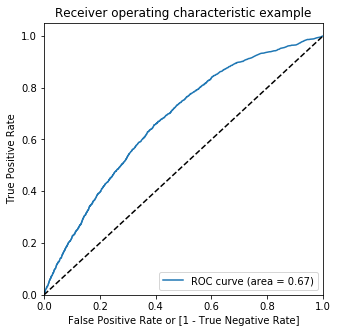

In [ ]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted,
                                         drop_intermediate = False )
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [ ]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              1.0     0.038238           45071          0    1    0    0   
1              0.0     0.016814            5295          0    1    0    0   
2              0.0     0.020033            6910          0    1    0    0   
3              0.0     0.038224           32986          0    1    0    0   
4              0.0     0.077759           54700          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.041733  1.000000  0.000000
0.1   0.1  0.947655  0.034297  0.987432
0.2   0.2  0.958246  0.000000  0.999979
0.3   0.3  0.958267  0.000000  1.000000
0.4   0.4  0.958267  0.000000  1.000000
0.5   0.5  0.958267  0.000000  1.000000
0.6   0.6  0.958267  0.000000  1.000000
0.7   0.7  0.958267  0.000000  1.000000
0.8   0.8  0.958267  0.000000  1.000000
0.9   0.9  0.958267  0.000000  1.000000


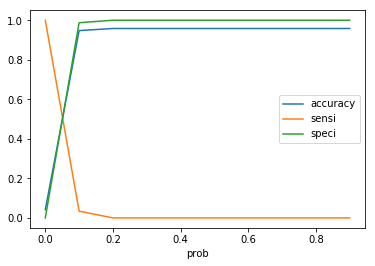

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# let's make prediction using cut off point equal to 0.05 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

Performance Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              1.0     0.038238           45071          0    1    0    0   
1              0.0     0.016814            5295          0    1    0    0   
2              0.0     0.020033            6910          0    1    0    0   
3              0.0     0.038224           32986          0    1    0    0   
4              0.0     0.077759           54700          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0                1

In [ ]:
# lets check confusion metrics and other important metrics
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[32341 14524]
 [  916  1125]]

Accuracy:0.684
Recall/Sensitivity: 0.5512003919647231
Precision: 0.07188957760879289
Specificity:0.69
AUC: 0.6724847183469693


Observatiosn:
1. Model built above with the identified cutoff probability has improved the Accuracy as well as the Sensitivity.
2. Recall is better than that of the LR model built on the demographic dataset.

But the numbers are still low to consider this as a good model.

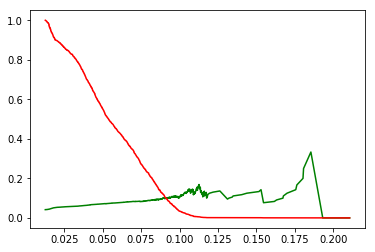

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on test data set

In [ ]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

## making prediction probabilities
y_test_pred = res.predict(X_test_sm)
## checking values
y_test_pred[:10]

37031    0.054293
58016    0.082934
5851     0.014526
5330     0.015155
35397    0.034967
18983    0.016276
36425    0.044734
11256    0.017311
4614     0.015735
14509    0.014306
dtype: float64

In [ ]:
# reshape to create an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05429261, 0.08293404, 0.01452606, 0.01515531, 0.03496661,
       0.01627613, 0.04473416, 0.01731091, 0.01573534, 0.01430615])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

Performance Tag  probability  Application ID
0              0.0     0.054293           37031
1              0.0     0.082934           58016
2              0.0     0.014526            5851
3              0.0     0.015155            5330
4              0.0     0.034967           35397

In [ ]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              0.0     0.054293           37031          1
1              0.0     0.082934           58016          1
2              0.0     0.014526            5851          0
3              0.0     0.015155            5330          0
4              0.0     0.034967           35397          0

In [ ]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )
print("AUC:", metrics.roc_auc_score(y_test_pred_final["Performance Tag"], y_test_pred_final["probability"]))

Confusion Metrics:
 [[13814  6241]
 [  397   509]]

Accuracy:0.683
Recall/Sensitivity: 0.5618101545253863
Precision: 0.07540740740740741
Specificity:0.689
AUC: 0.6655982472042941


 Accuracy is almost the same on the test dataset, Sensivity is also almost same on the test dataset.
 Overall the model is doing better than the built on the demographic dataset.

### Additional predictions on rejected applicants

In [ ]:
# we had saved all the records with null values for perfromance tag to dataframe called rejected_master
rejected_master_woe.shape

(1425, 28)

In [ ]:
rejected_master.head()

Application ID  Age Gender Marital Status  No of dependents  Income  \
0       906908303   35      M         Single               1.0     6.0   
1        10990583   47      F        Married               4.0    12.0   
2       589678446   46      M        Married               3.0     7.0   
3       809411322   41      M        Married               3.0    18.0   
4       150246616   42      F        Married               4.0    17.0   

      Education Profession Type of residence  \
0      Bachelor        SAL            Rented   
1       Masters         SE            Rented   
2  Professional         SE            Rented   
3       Masters        SAL            Rented   
4           Phd        SAL            Rented   

   No of months in current residence             ...              \
0                                 22             ...               
1                                122             ...               
2                                 10             ...               
3                                  6             ...               
4                                  8             ...               

   No of trades opened in last 6 months  \
0                                   4.0   
1                                   3.0   
2                                   2.0   
3                                   2.0   
4                                   3.0   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                        3   
1                                        3   
2                                        2   
3                                        1   
4                                        2   

   No of PL trades opened in last 12 months  \
0                                         7   
1                                         4   
2                                         4   
3                                         4   
4                                         3   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  2                
1                                                  3                
2                                                  0                
3                                                  4                
4                                                  3                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0            1309623.0                  13   
1                         0.0             775626.0                   7   
2                         0.0             732602.0                   8   
3                         0.0             842057.0                   8   
4                         0.0             786997.0                   7   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  

[5 rows x 29 columns]

In [ ]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [ ]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

## making prediction probabilities
y_test_pred = res.predict(X_test_sm)
## checking values
y_test_pred[:10]

0    0.009605
1    0.005742
2    0.019447
3    0.007243
4    0.003459
5    0.012233
6    0.023761
7    0.026187
8    0.012551
9    0.006408
dtype: float64

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.00960479, 0.00574229, 0.01944677, 0.00724276, 0.00345855,
       0.01223299, 0.0237607 , 0.02618681, 0.01255069, 0.00640845])

In [ ]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

Performance Tag  probability  Application ID
0              1.0     0.009605               0
1              1.0     0.005742               1
2              1.0     0.019447               2
3              1.0     0.007243               3
4              1.0     0.003459               4

In [ ]:
# Create new column 'predicted' with 1 if probability > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance Tag  probability  Application ID  predicted
0              1.0     0.009605               0          0
1              1.0     0.005742               1          0
2              1.0     0.019447               2          0
3              1.0     0.007243               3          0
4              1.0     0.003459               4          0

In [ ]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[   0    0]
 [1410   15]]

Accuracy:0.011
Recall/Sensitivity: 0.010526315789473684
Precision: 1.0
Specificity:nan


Model has very poor results for the rejected applicants.

## Logistic Regression - Regularized

In [ ]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        scoring= 'recall',
                        cv = folds,
                        return_train_score=True, verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   56.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
## reviewing the results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.145124      0.012834         0.005592        0.001358   0.001   
1        0.370951      0.008011         0.006194        0.001602   0.001   
2        0.301338      0.040125         0.003996        0.000631    0.01   
3        0.518555      0.032622         0.005193        0.001471    0.01   
4        0.532824      0.109498         0.004995        0.001548     0.1   
5        0.886162      0.075368         0.005394        0.001496     0.1   
6        0.742872      0.125238         0.004991        0.001552       1   
7        1.325605      0.118591         0.001399        0.001743       1   
8        0.660962      0.078953         0.004919        0.005723      10   
9        1.431128      0.210042         0.003922        0.006038      10   
10       0.615020      0.088651         0.002594        0.002149     100   
11       1.464532      0.216265         0.005113        0.005694     100   
12       0.651036      0.083418         0.001996        0.001670    1000   
13       1.445566      0.159862         0.010352        0.006608    1000   

   param_penalty                          params  split0_test_score  \
0             l1   {'C': 0.001, 'penalty': 'l1'}           0.738386   
1             l2   {'C': 0.001, 'penalty': 'l2'}           0.650367   
2             l1    {'C': 0.01, 'penalty': 'l1'}           0.674817   
3             l2    {'C': 0.01, 'penalty': 'l2'}           0.655257   
4             l1     {'C': 0.1, 'penalty': 'l1'}           0.647922   
5             l2     {'C': 0.1, 'penalty': 'l2'}           0.643032   
6             l1     {'C': 1.0, 'penalty': 'l1'}           0.650367   
7             l2     {'C': 1.0, 'penalty': 'l2'}           0.650367   
8             l1    {'C': 10.0, 'penalty': 'l1'}           0.647922   
9             l2    {'C': 10.0, 'penalty': 'l2'}           0.647922   
10            l1   {'C': 100.0, 'penalty': 'l1'}           0.647922   
11            l2   {'C': 100.0, 'penalty': 'l2'}           0.647922   
12            l1  {'C': 1000.0, 'penalty': 'l1'}           0.647922   
13            l2  {'C': 1000.0, 'penalty': 'l2'}           0.647922   

    split1_test_score  split2_test_score       ...         mean_test_score  \
0            0.740196           0.759804       ...                0.739834   
1            0.678922           0.659314       ...                0.648211   
2            0.698529           0.683824       ...                0.677610   
3            0.681373           0.666667       ...                0.659973   
4            0.698529           0.666667       ...                0.662917   
5            0.693627           0.656863       ...                0.658018   
6            0.691176           0.659314       ...                0.661446   
7            0.686275           0.656863       ...                0.659975   
8            0.688725           0.656863       ...                0.660466   
9            0.691176           0.656863       ...                0.660957   
10           0.686275           0.656863       ...                0.659976   
11           0.686275           0.656863       ...                0.659976   
12           0.686275           0.656863       ...                0.659976   
13           0.686275           0.656863       ...                0.659976   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.010875                1            0.734069            0.734231   
1         0.020904               14            0.647059            0.652174   
2         0.012515                2            0.674632            0.692590   
3         0.014433               12            0.666054            0.672382   
4         0.020820                3            0.668505            0.676056   
5         0.019630               13            0.668505            0.673607   
6         0.016092                4            0.665441            0.6717

In [ ]:
## segerigating results for L1 and L2 regression and plotting them differently
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

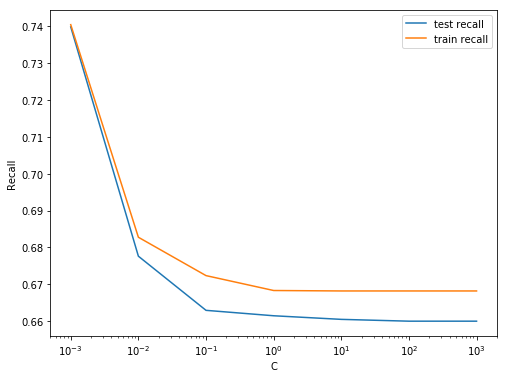

In [ ]:
## plotting results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

Training and Test recall decreases as the value of C indreases

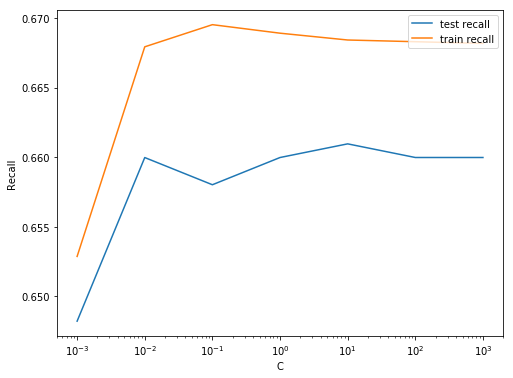

In [ ]:
## plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

Training and test recall increases as the value of C increases

In [ ]:
## checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.7398340947547272 at {'C': 0.001, 'penalty': 'l1'}


In [ ]:
# lets create model with the best parameter

model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
model.fit(X_train,y_train)

# predictions on training data
y_train_pred = model.predict(X_train)

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# training dataset
classification_metrics(y_train, y_train_pred )
# print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[24337 22528]
 [  554  1487]]

Accuracy:0.528
Recall/Sensitivity: 0.7285644292013719
Precision: 0.06191963356235686
Specificity:0.519


We have got decent sensitivity on the training dataset from the model built above.

In [ ]:
# predictions on test dataset
y_test_pred = model.predict(X_test)

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# test dataset
classification_metrics(y_test, y_test_pred )

Confusion Metrics:
 [[10337  9718]
 [  235   671]]

Accuracy:0.525
Recall/Sensitivity: 0.7406181015452539
Precision: 0.06458754451824045
Specificity:0.515


Accuracy and sensitivity is almost the same on the test dataset.

In [ ]:
## lasso model parameters
model_parameters =list(model.coef_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
list(zip(cols, model_parameters))

[('Age', 0.0),
 ('Gender', 0.0),
 ('Marital Status', 0.0),
 ('No of dependents', 0.0),
 ('Income', 0.0),
 ('Education', 0.0),
 ('Profession', 0.0),
 ('Type of residence', 0.0),
 ('No of months in current residence', 0.004),
 ('No of months in current company', 0.0),
 ('No of times 90 DPD or worse in last 6 months', 0.0),
 ('No of times 60 DPD or worse in last 6 months', 0.0),
 ('No of times 30 DPD or worse in last 6 months', -0.308),
 ('No of times 90 DPD or worse in last 12 months', 0.0),
 ('No of times 60 DPD or worse in last 12 months', 0.0),
 ('No of times 30 DPD or worse in last 12 months', 0.0),
 ('Avgas CC Utilization in last 12 months', 0.0),
 ('No of trades opened in last 6 months', 0.0),
 ('No of trades opened in last 12 months', 0.0),
 ('No of PL trades opened in last 6 months', 0.0),
 ('No of PL trades opened in last 12 months', -0.534),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', -0.056),
 ('No of Inquiries in last 12 months (excluding home & auto l

### Prediction on Additional data (rejected applications)

In [ ]:
# lets check the dataset
rejected_master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0 -0.027258  0.010147       -0.023327         -0.040085 -0.337170  -0.017314   
1  0.073437 -0.032174        0.004092          0.025204 -0.117647  -0.007949   
2  0.021035  0.010147        0.004092         -0.053955 -0.337170   0.017931   
3 -0.068679  0.010147        0.004092         -0.053955 -0.089365  -0.007949   
4  0.021035 -0.032174        0.004092          0.025204 -0.089365   0.029512   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.421595   
1   -0.091424           0.004454                          -0.032002   
2   -0.091424           0.004454                           0.148090   
3    0.028409           0.004454                           0.148090   
4    0.028409           0.004454                           0.148090   

   No of months in current company             ...              \
0                        -0.161652             ...               
1                         0.016569             ...               
2                         0.016569             ...               
3                         0.083311             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                             -0.524277   
1                             -0.435124   
2                             -0.232861   
3                             -0.232861   
4                             -0.435124   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                -0.423615   
1                                -0.423615   
2                                -0.438436   
3                                -0.199362   
4                                -0.438436   

   No of PL trades opened in last 12 months  \
0                                 -0.157721   
1                                 -0.500075   
2                                 -0.500075   
3                                 -0.500075   
4                                 -0.412296   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.216097                
1                                          -0.554789                
2                                           0.718230                
3                                          -0.428636                
4                                          -0.554789                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                   -0.071778            -0.039272           -0.566631   
1                   -0.071778            -0.449431           -0.394043   
2                   -0.071778            -0.449431           -0.394043   
3                   -0.071778            -0.449431           -0.394043   
4                   -0.071778            -0.449431           -0.394043   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                   -0.011985  
4                    0.138368  

[5 rows x 28 columns]

In [ ]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# training dataset
classification_metrics(y_test, y_test_pred )

Confusion Metrics:
 [[   0    0]
 [   6 1419]]

Accuracy:0.996
Recall/Sensitivity: 0.9957894736842106
Precision: 1.0
Specificity:nan


Overall we this is the best model so far, with very good accuracy and recall on all the datasets,

## Decision Tree Model

In [ ]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# Let's check the evaluation metrics of the model built above

# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.58      0.73     46865
        1.0       0.07      0.70      0.12      2041

avg / total       0.94      0.59      0.70     48906



In [ ]:
# performance metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[27264 19601]
 [  620  1421]]

Accuracy:0.587
Recall/Sensitivity: 0.6962273395394415
Precision: 0.0675958519646085
Specificity:0.582


In [ ]:
# predictions on the test dataset
y_test_pred= dt_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.57      0.72     20055
        1.0       0.07      0.69      0.12       906

avg / total       0.94      0.58      0.70     20961



In [ ]:
# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[11530  8525]
 [  279   627]]

Accuracy:0.58
Recall/Sensitivity: 0.6920529801324503
Precision: 0.06850961538461539
Specificity:0.575


In [ ]:
# Putting features
features = list(X_train.columns)
features

['Age',
 'Gender',
 'Marital Status',
 'No of dependents',
 'Income',
 'Education',
 'Profession',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

In [ ]:
# If you're on windows:
# Specifing path for dot file.
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [ ]:
# plot default decision tree
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,feature_names = list(X_train.columns) , filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

### Hyperparameter Tuning

In [ ]:
# Tuning Max Depth parameter

# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 101)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   45.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.050882      0.012737         0.005779        0.001162   
1       0.059443      0.003190         0.005390        0.000803   
2       0.082580      0.013505         0.005386        0.001196   
3       0.095145      0.002054         0.004589        0.000799   
4       0.111659      0.005684         0.007531        0.005579   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.853448           0.821990   
1               2  {'max_depth': 2}           0.506466           0.821990   
2               3  {'max_depth': 3}           0.646552           0.575916   
3               4  {'max_depth': 4}           0.646552           0.583770   
4               5  {'max_depth': 5}           0.674569           0.751309   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.848101           0.851117       ...                0.844705   
1           0.848101           0.851117       ...                0.775302   
2           0.625316           0.560794       ...                0.598089   
3           0.706329           0.687345       ...                0.652759   
4           0.696203           0.593052       ...                0.674513   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.011510                1            0.842739            0.850512   
1        0.134846                2            0.511731            0.850512   
2        0.032360                7            0.679138            0.590717   
3        0.042501                4            0.679772            0.605787   
4        0.051566                3            0.717185            0.823388   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.844471            0.843712            0.844282   
1            0.844471            0.843712            0.844282   
2            0.605103            0.594628            0.598540   
3            0.712029            0.706960            0.678224   
4            0.704739            0.628816            0.697080   

   mean_train_score  std_train_score  
0          0.845143         0.002751  
1          0.778942         0.133628  
2          0.613625         0.033099  
3          0.676554         0.037958  
4          0.714241         0.062616  

[5 rows x 21 columns]

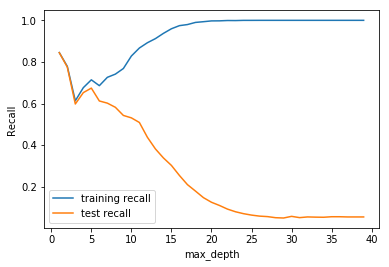

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

As we increase the value of max_depth, both training and test score increase till about max-depth = 6, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

In [ ]:
# Tuning min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.298549      0.023038         0.006401        0.001962   
1       0.228729      0.016916         0.006795        0.001173   
2       0.189127      0.008953         0.009253        0.004459   
3       0.220479      0.042370         0.006785        0.002707   
4       0.210309      0.034617         0.003782        0.003232   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.163814   
1                     25  {'min_samples_leaf': 25}           0.352078   
2                     45  {'min_samples_leaf': 45}           0.471883   
3                     65  {'min_samples_leaf': 65}           0.440098   
4                     85  {'min_samples_leaf': 85}           0.498778   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.178922           0.144608           0.181373       ...          
1           0.382353           0.321078           0.370098       ...          
2           0.492647           0.438725           0.497549       ...          
3           0.551471           0.477941           0.544118       ...          
4           0.575980           0.512255           0.583333       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.165606        0.013488               10            1.000000   
1         0.360612        0.022280                9            0.897059   
2         0.472318        0.021501                8            0.878676   
3         0.502234        0.041597                7            0.826593   
4         0.535049        0.036744                6            0.802696   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.898347            0.888549            0.891611   
2            0.871402            0.864666            0.866503   
3            0.851194            0.840784            0.833435   
4            0.806491            0.826087            0.807103   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.900796          0.895272         0.004512  
2            0.859155          0.868081         0.006590  
3            0.816289          0.833659         0.011916  
4            0.798530          0.808182         0.009464  

[5 rows x 21 columns]

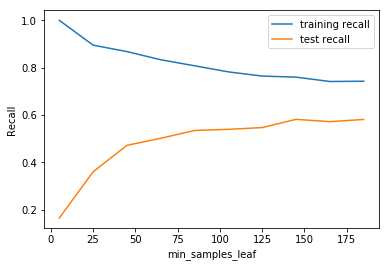

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

In [ ]:
# Tuning Min Sample Split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.298891      0.047046         0.006396        0.001957   
1       0.286538      0.052402         0.006388        0.001495   
2       0.239815      0.018728         0.005980        0.000889   
3       0.207509      0.005952         0.004182        0.002124   
4       0.198922      0.007964         0.004320        0.006106   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.092910   
1                      25  {'min_samples_split': 25}           0.244499   
2                      45  {'min_samples_split': 45}           0.317848   
3                      65  {'min_samples_split': 65}           0.356968   
4                      85  {'min_samples_split': 85}           0.376528   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.075980           0.073529           0.083333       ...          
1           0.232843           0.230392           0.254902       ...          
2           0.328431           0.321078           0.335784       ...          
3           0.382353           0.340686           0.387255       ...          
4           0.431373           0.379902           0.414216       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.077896        0.009783               10            1.000000   
1         0.236645        0.011886                9            0.999387   
2         0.323864        0.007294                8            0.975490   
3         0.363060        0.018552                7            0.944853   
4         0.395893        0.022651                6            0.916667   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.996938            0.993876            0.998163   
2            0.964483            0.968157            0.972443   
3            0.949786            0.935701            0.946111   
4            0.929577            0.915493            0.928353   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.996326          0.996938         0.001857  
2            0.972443          0.970603         0.003850  
3            0.925903          0.940471         0.008634  
4            0.913043          0.920627         0.006919  

[5 rows x 21 columns]

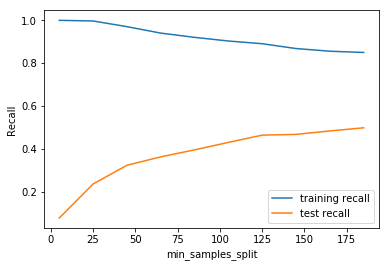

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

In [ ]:
# Grid Search to Find Optimal Hyperparameters

# Create the parameter grid
param_grid = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          scoring="recall", cv = n_folds,
                          return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7, 8], 'min_samples_leaf': [100, 150, 200], 'min_samples_split': [100, 150, 200], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.107315      0.014488         0.005184        0.001164   
1       0.087248      0.004634         0.004800        0.001600   
2       0.096259      0.019384         0.006390        0.001354   
3       0.094154      0.013232         0.004587        0.000798   
4       0.076534      0.005479         0.002392        0.001953   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               4                    100   
1         entropy               4                    100   
2         entropy               4                    100   
3         entropy               4                    150   
4         entropy               4                    150   

  param_min_samples_split                                             params  \
0                     100  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
1                     150  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
2                     200  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 4, 'min_...   
4                     150  {'criterion': 'entropy', 'max_depth': 4, 'min_...   

   split0_test_score       ...         mean_test_score  std_test_score  \
0           0.589242       ...                0.628142        0.079990   
1           0.589242       ...                0.628142        0.079990   
2           0.589242       ...                0.628142        0.079990   
3           0.591687       ...                0.631082        0.078736   
4           0.591687       ...                0.631082        0.078736   

   rank_test_score  split0_train_score  split1_train_score  \
0               52            0.640319            0.570116   
1               52            0.640319            0.570116   
2               52            0.640319            0.570116   
3               46            0.631740            0.579914   
4               46            0.631740            0.579914   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.608696            0.693815            0.698102   
1            0.608696            0.693815            0.698102   
2            0.608696            0.693815            0.698102   
3            0.617269            0.696877            0.698102   
4            0.617269            0.696877            0.698102   

   mean_train_score  std_train_score  
0          0.642209         0.049216  
1          0.642209         0.049216  
2          0.642209         0.049216  
3          0.644780         0.046242  
4          0.644780         0.046242  

[5 rows x 24 columns]

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.671731539735317
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [ ]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',
                                  criterion='entropy',
                                  max_depth=6,
                                  min_samples_leaf=150,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# prediction on training dataset
y_train_pred = clf_entropy.predict(X_train)
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.64      0.77     46865
        1.0       0.07      0.65      0.13      2041

avg / total       0.94      0.64      0.75     48906



In [ ]:
# performance metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[30005 16860]
 [  717  1324]]

Accuracy:0.641
Recall/Sensitivity: 0.6487016168544831
Precision: 0.07281126264848219
Specificity:0.64


In [ ]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,feature_names=list(X_train.columns),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [ ]:
## checking accuracy score
clf_entropy.score(X_test,y_test)

0.6325556986784981

In [ ]:
# classification metrics
y_test_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.63      0.77     20055
        1.0       0.07      0.62      0.13       906

avg / total       0.93      0.63      0.74     20961



In [ ]:
# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[12695  7360]
 [  342   564]]

Accuracy:0.633
Recall/Sensitivity: 0.6225165562913907
Precision: 0.07117617364967188
Specificity:0.633


Decision Tree has produced much better results on the master datafram as comparison to that of demographic dataset.

### Prediction on Additional data (rejected applications)

In [ ]:
rejected_master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0 -0.027258  0.010147       -0.023327         -0.040085 -0.337170  -0.017314   
1  0.073437 -0.032174        0.004092          0.025204 -0.117647  -0.007949   
2  0.021035  0.010147        0.004092         -0.053955 -0.337170   0.017931   
3 -0.068679  0.010147        0.004092         -0.053955 -0.089365  -0.007949   
4  0.021035 -0.032174        0.004092          0.025204 -0.089365   0.029512   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.421595   
1   -0.091424           0.004454                          -0.032002   
2   -0.091424           0.004454                           0.148090   
3    0.028409           0.004454                           0.148090   
4    0.028409           0.004454                           0.148090   

   No of months in current company             ...              \
0                        -0.161652             ...               
1                         0.016569             ...               
2                         0.016569             ...               
3                         0.083311             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                             -0.524277   
1                             -0.435124   
2                             -0.232861   
3                             -0.232861   
4                             -0.435124   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                -0.423615   
1                                -0.423615   
2                                -0.438436   
3                                -0.199362   
4                                -0.438436   

   No of PL trades opened in last 12 months  \
0                                 -0.157721   
1                                 -0.500075   
2                                 -0.500075   
3                                 -0.500075   
4                                 -0.412296   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.216097                
1                                          -0.554789                
2                                           0.718230                
3                                          -0.428636                
4                                          -0.554789                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                   -0.071778            -0.039272           -0.566631   
1                   -0.071778            -0.449431           -0.394043   
2                   -0.071778            -0.449431           -0.394043   
3                   -0.071778            -0.449431           -0.394043   
4                   -0.071778            -0.449431           -0.394043   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                   -0.011985  
4                    0.138368  

[5 rows x 28 columns]

In [ ]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [ ]:
## making predictions
y_test_pred = clf_entropy.predict(X_test)

## checking entropy
print("entropy score:",clf_entropy.score(X_test,y_test))

# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

entropy score: 0.9887719298245614
Confusion Metrics:
 [[   0    0]
 [  16 1409]]

Accuracy:0.989
Recall/Sensitivity: 0.9887719298245614
Precision: 1.0
Specificity:nan


## Random Forest Model

In [ ]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [ ]:
# predictions on test data
y_train_pred = rfc.predict(X_train)

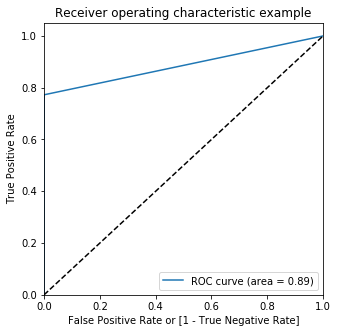

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred, drop_intermediate = False )

draw_roc(y_train, y_train_pred)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     46865
        1.0       1.00      0.77      0.87      2041

avg / total       0.99      0.99      0.99     48906



In [ ]:
# performance metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[46859     6]
 [  464  1577]]

Accuracy:0.99
Recall/Sensitivity: 0.7726604605585498
Precision: 0.9962097283638661
Specificity:1.0


We have got a good Accuracy & decent Sensitivity(recall) on the training dataset. lets now check the test dataset.

In [ ]:
# predictions on test data
y_test_pred = rfc.predict(X_test)

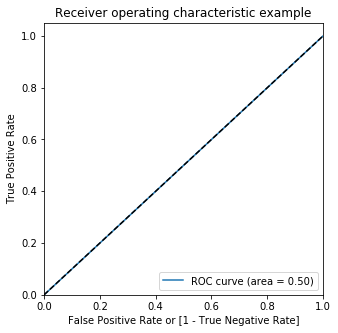

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

draw_roc(y_test, y_test_pred)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     20055
        1.0       0.00      0.00      0.00       906

avg / total       0.92      0.96      0.94     20961



In [ ]:
# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[20051     4]
 [  906     0]]

Accuracy:0.957
Recall/Sensitivity: 0.0
Precision: 0.0
Specificity:1.0


Accuracy dropped a bit on the test dataset, Sensitivity(recall) has dropped drasticall on the test dataset.

### Hyperparameter Tuning

In [ ]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.297769      0.093434         0.021447        0.004385   
1       0.569679      0.049069         0.036501        0.015355   
2       0.587430      0.144035         0.032515        0.003254   
3       0.663822      0.021524         0.035306        0.004213   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.760391           0.666667   
1               7   {'max_depth': 7}           0.559902           0.590686   
2              12  {'max_depth': 12}           0.154034           0.161765   
3              17  {'max_depth': 17}           0.007335           0.009804   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.696078           0.683824       ...                0.690315   
1           0.546569           0.651961       ...                0.580117   
2           0.139706           0.156863       ...                0.150905   
3           0.002451           0.009804       ...                0.005879   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.039076                1            0.753064            0.690141   
1        0.039059                2            0.692402            0.698102   
2        0.008546                3            0.724877            0.731782   
3        0.003981                4            0.787377            0.782609   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.756889            0.602572            0.645438   
1            0.695040            0.699326            0.685854   
2            0.716473            0.720147            0.722596   
3            0.776485            0.773423            0.781996   

   mean_train_score  std_train_score  
0          0.689621         0.060133  
1          0.694145         0.004797  
2          0.723175         0.005126  
3          0.780378         0.004901  

[4 rows x 21 columns]

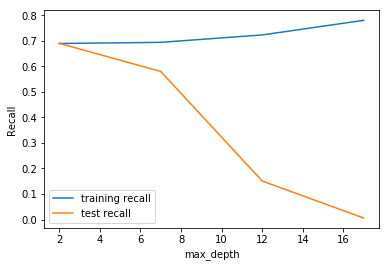

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, train scores keep increasing, but test score keep decreasing. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [ ]:
# Tuning n_estimators
# Let's try to find the optimum values for n_estimators and understand how the value of n_estimators
# impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced',max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.368820      0.872033         0.133846        0.049363   
1       8.781761      1.333816         0.596073        0.201215   
2      14.591066      2.065037         0.870109        0.225797   
3      20.436596      2.901277         1.110638        0.120173   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.643032   
1                500   {'n_estimators': 500}           0.635697   
2                900   {'n_estimators': 900}           0.633252   
3               1300  {'n_estimators': 1300}           0.628362   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.661765           0.598039           0.740196       ...          
1           0.671569           0.610294           0.740196       ...          
2           0.659314           0.610294           0.737745       ...          
3           0.659314           0.605392           0.735294       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.651645        0.049436                3            0.677696   
1         0.656061        0.046800                1            0.673407   
2         0.653611        0.044913                2            0.671569   
3         0.650672        0.045700                4            0.669730   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.672994            0.655236            0.711574   
1            0.696877            0.666258            0.712799   
2            0.687079            0.663809            0.709737   
3            0.681568            0.667483            0.708512   

   split4_train_score  mean_train_score  std_train_score  
0            0.646050          0.672710         0.022590  
1            0.649112          0.679691         0.022567  
2            0.650337          0.676506         0.020428  
3            0.652174          0.675893         0.018802  

[4 rows x 21 columns]

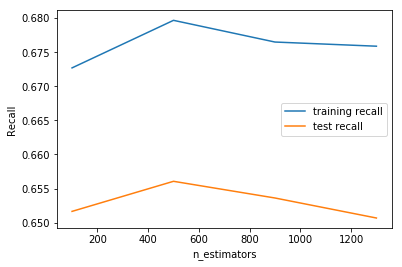

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observations:
We are getting the best test score with n_estimators = 900

Best Training score is also for n_estimators = 900

In [ ]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',max_depth=4)


# fit tree on training dataa
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.296788      0.062586         0.032114        0.019178   
1       0.417507      0.088264         0.021645        0.005173   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.643032   
1                 10  {'max_features': 10}           0.625917   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.671569           0.585784           0.759804       ...          
1           0.637255           0.598039           0.698529       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.660469        0.056934                1            0.666667   
1         0.640869        0.032893                2            0.683211   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.696877            0.665034            0.734231   
1            0.668096            0.657073            0.655848   

   split4_train_score  mean_train_score  std_train_score  
0            0.690753          0.690712         0.025177  
1            0.674832          0.667812         0.010440  

[2 rows x 21 columns]

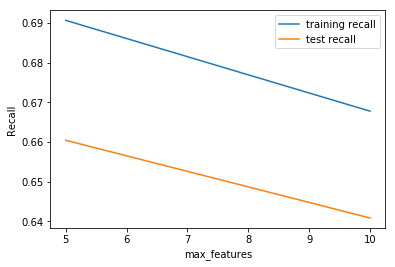

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


### Observations:
Both Training and Test Recalls decrease as the value of max feature increases

Best Training & Test recall is with max features = 5

In [ ]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.434097      0.136887         0.024535        0.005299   
1       0.278423      0.024560         0.020544        0.004258   
2       0.268407      0.020095         0.019884        0.002858   
3       0.258270      0.023016         0.016950        0.000625   
4       0.252240      0.032383         0.017570        0.001505   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.562347   
1                    150  {'min_samples_leaf': 150}           0.603912   
2                    200  {'min_samples_leaf': 200}           0.606357   
3                    250  {'min_samples_leaf': 250}           0.638142   
4                    300  {'min_samples_leaf': 300}           0.665037   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.546569           0.568627           0.620098       ...          
1           0.602941           0.605392           0.637255       ...          
2           0.617647           0.573529           0.686275       ...          
3           0.674020           0.622549           0.688725       ...          
4           0.681373           0.593137           0.713235       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.565901        0.029965                6            0.710172   
1         0.602645        0.023331                5            0.700368   
2         0.614899        0.038659                4            0.691789   
3         0.650667        0.025971                3            0.693627   
4         0.652125        0.045159                2            0.697917   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.708512            0.708512            0.690141   
1            0.708512            0.723821            0.696265   
2            0.707900            0.707287            0.699326   
3            0.706062            0.694427            0.682180   
4            0.724434            0.686467            0.705450   

   split4_train_score  mean_train_score  std_train_score  
0            0.682180          0.699903         0.011516  
1            0.674219          0.700637         0.016227  
2            0.684630          0.698186         0.008980  
3            0.693203          0.693900         0.007565  
4            0.679118          0.698677         0.015757  

[5 rows x 21 columns]

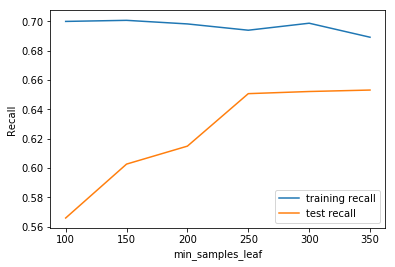

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observations:
Trainig recall is constant for all the different values of the min sample leaf

Test recall increases as the valye of sample leaf increases

Best recall is achieved at the valu of 250

In [ ]:
# Tuning min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.514662      0.044756         0.032710        0.015745   
1       0.341183      0.064096         0.019753        0.000739   
2       0.345512      0.067920         0.021338        0.001362   
3       0.435316      0.135574         0.019890        0.002468   
4       0.287969      0.044462         0.026325        0.014584   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.435208   
1                     250  {'min_samples_split': 250}           0.506112   
2                     300  {'min_samples_split': 300}           0.518337   
3                     350  {'min_samples_split': 350}           0.555012   
4                     400  {'min_samples_split': 400}           0.577017   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.475490           0.441176           0.490196       ...          
1           0.490196           0.438725           0.551471       ...          
2           0.534314           0.490196           0.583333       ...          
3           0.529412           0.514706           0.612745       ...          
4           0.551471           0.551471           0.617647       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.463021        0.021190                6            0.718137   
1         0.498281        0.036184                5            0.715686   
2         0.529648        0.030482                4            0.722426   
3         0.545316        0.036790                3            0.717525   
4         0.570796        0.025253                2            0.705270   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.715860            0.720759            0.702388   
1            0.729333            0.723209            0.707900   
2            0.714636            0.715860            0.693203   
3            0.717697            0.715860            0.723209   
4            0.707900            0.726883            0.708512   

   split4_train_score  mean_train_score  std_train_score  
0            0.696877          0.710804         0.009415  
1            0.703613          0.715948         0.009475  
2            0.709737          0.711172         0.009855  
3            0.696877          0.714234         0.009025  
4            0.712186          0.712150         0.007690  

[5 rows x 21 columns]

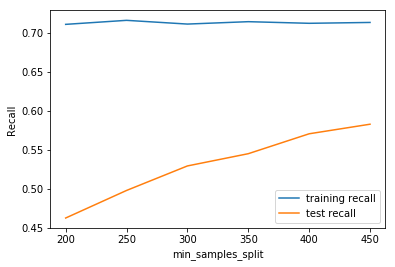

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training recall")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Observations
Training recall is constant same for all the different valeus of min samples split

Test recall increases as the min sample split increases.

In [ ]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,10],
    'n_estimators': [400,700],
    'max_features': [4, 10],
    'min_samples_leaf': [200,500],
    'min_samples_split': [200,500]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1,scoring="recall",return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 16.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 10], 'n_estimators': [400, 700], 'max_features': [4, 10], 'min_samples_leaf': [200, 500], 'min_samples_split': [200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [ ]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.6643815534636378 using {'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 500, 'min_samples_split': 200, 'n_estimators': 400}


In [ ]:
# model with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=4,
                             min_samples_leaf=500,
                             min_samples_split=500,
                             max_features=10,
                             n_estimators=400)

In [ ]:
# model fit
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=500,
            min_samples_split=500, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [ ]:
# predict
predictions = rf.predict(X_train)

In [ ]:
print(classification_report(y_train,predictions))

             precision    recall  f1-score   support

        0.0       0.98      0.61      0.75     46865
        1.0       0.07      0.67      0.12      2041

avg / total       0.94      0.61      0.72     48906



In [ ]:
# performance metrics on training dataset
classification_metrics(y_train, predictions)

Confusion Metrics:
 [[28410 18455]
 [  677  1364]]

Accuracy:0.609
Recall/Sensitivity: 0.6682998530132288
Precision: 0.06882284676320702
Specificity:0.606


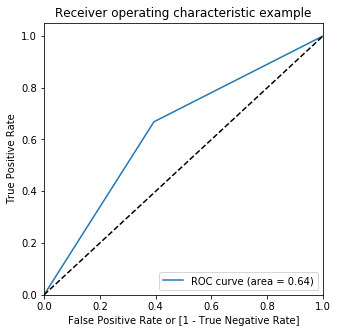

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, predictions, drop_intermediate = False )

draw_roc(y_train, predictions)

In [ ]:
# predict
predictions_test = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_test))

             precision    recall  f1-score   support

        0.0       0.98      0.60      0.74     20055
        1.0       0.07      0.67      0.13       906

avg / total       0.94      0.60      0.72     20961



In [ ]:
# performance metrics on training dataset
classification_metrics(y_test, predictions_test)

Confusion Metrics:
 [[12056  7999]
 [  303   603]]

Accuracy:0.604
Recall/Sensitivity: 0.6655629139072847
Precision: 0.07009997674959312
Specificity:0.601


Numbers are almost same as we got on the training dataset

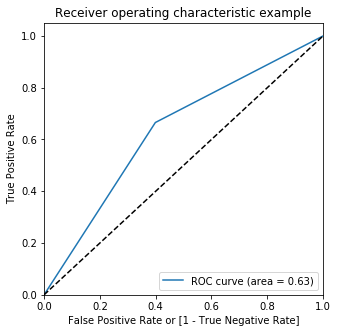

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, predictions_test, drop_intermediate = False )

draw_roc(y_test, predictions_test)

### Additional predictions on rejected applicants

In [ ]:
rejected_master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0 -0.027258  0.010147       -0.023327         -0.040085 -0.337170  -0.017314   
1  0.073437 -0.032174        0.004092          0.025204 -0.117647  -0.007949   
2  0.021035  0.010147        0.004092         -0.053955 -0.337170   0.017931   
3 -0.068679  0.010147        0.004092         -0.053955 -0.089365  -0.007949   
4  0.021035 -0.032174        0.004092          0.025204 -0.089365   0.029512   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.421595   
1   -0.091424           0.004454                          -0.032002   
2   -0.091424           0.004454                           0.148090   
3    0.028409           0.004454                           0.148090   
4    0.028409           0.004454                           0.148090   

   No of months in current company             ...              \
0                        -0.161652             ...               
1                         0.016569             ...               
2                         0.016569             ...               
3                         0.083311             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                             -0.524277   
1                             -0.435124   
2                             -0.232861   
3                             -0.232861   
4                             -0.435124   

   No of trades opened in last 12 months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No of PL trades opened in last 6 months  \
0                                -0.423615   
1                                -0.423615   
2                                -0.438436   
3                                -0.199362   
4                                -0.438436   

   No of PL trades opened in last 12 months  \
0                                 -0.157721   
1                                 -0.500075   
2                                 -0.500075   
3                                 -0.500075   
4                                 -0.412296   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.216097                
1                                          -0.554789                
2                                           0.718230                
3                                          -0.428636                
4                                          -0.554789                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                   -0.071778            -0.039272           -0.566631   
1                   -0.071778            -0.449431           -0.394043   
2                   -0.071778            -0.449431           -0.394043   
3                   -0.071778            -0.449431           -0.394043   
4                   -0.071778            -0.449431           -0.394043   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                   -0.011985  
4                    0.138368  

[5 rows x 28 columns]

In [ ]:
# Putting feature variable to X
X_rejected = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_rejected = rejected_master_woe['Performance Tag']

In [ ]:
# predict
y_rejected_pred = rf.predict(X_rejected)

In [ ]:
# performance metrics on training dataset
classification_metrics(y_rejected, y_rejected_pred)

Confusion Metrics:
 [[   0    0]
 [  10 1415]]

Accuracy:0.993
Recall/Sensitivity: 0.9929824561403509
Precision: 1.0
Specificity:nan


Random Forest on the woe transformed dataset has produced decent results on all the datasets.

# Model Evaluation & Comparison

1. Models on master dataset are performing much better than that of models built on demographics dataset.
2. Decision Tree and Random Forests  with hyperparameter tuning have produced decent results.
3. Regularized Logistic Regression model has produced the best results with recall greater than 70% on the training and the test dataset.

## Summary of the models built:
![image.png](attachment:image.png)

# Final Conclusion: Best Model (Regularized Logistic Regression on Master Dataset)
Since Regularized Logistic Regression has produced the best results, we would go ahead with this model to create the scorecard
and to calculate the financial benefits of the model.

# Application Score Card on WOE transformed master dataset

Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

•	For the rejected population, calculate the application scores and assess the results. Compare the scores of the rejected population with the approved candidates and comment on the observations.

•	On the basis of the scorecard, identify the cut-off score below which you would not grant credit cards to applicants.

Inputs given:

    1.target_score = 400
    2.target_odds = 10
    3.pts_double_odds = 20

Calculation as follows:

    factor = pts_double_odds / log10(2)
    offset = target_score - factor X log10(target_odds)

## Final ScoreCard Forumula:
### scorecard['score'] = offset - factor X scorecard['logit']

In [ ]:
# woe transformed master dataset
master_woe.head()

Age    Gender  Marital Status  No of dependents    Income  Education  \
0  0.073437 -0.032174        0.004092          0.085222  0.239199  -0.017314   
1 -0.027258  0.010147        0.004092          0.025204  0.391202   0.017931   
2 -0.027258  0.010147       -0.023327          0.085222  0.230548  -0.017314   
3  0.021035  0.010147        0.004092         -0.040085  0.391202  -0.017314   
4 -0.027258 -0.032174        0.004092         -0.004391  0.239199   0.017931   

   Profession  Type of residence  No of months in current residence  \
0    0.028409           0.004454                          -0.032002   
1    0.013298           0.004454                          -0.032002   
2    0.013298           0.004454                           0.125663   
3   -0.091424           0.004454                          -0.049460   
4    0.028409           0.004454                          -0.032002   

   No of months in current company             ...              \
0                         0.204217             ...               
1                         0.083311             ...               
2                         0.083311             ...               
3                         0.204217             ...               
4                         0.083311             ...               

   No of trades opened in last 6 months  \
0                              0.479566   
1                              0.479566   
2                              0.657628   
3                              0.479566   
4                              0.657628   

   No of trades opened in last 12 months  \
0                               0.675361   
1                               0.675361   
2                               0.675361   
3                               0.675361   
4                               0.675361   

   No of PL trades opened in last 6 months  \
0                                 0.649212   
1                                 0.649212   
2                                 0.649212   
3                                 0.649212   
4                                 0.649212   

   No of PL trades opened in last 12 months  \
0                                  0.893811   
1                                  0.893811   
2                                  0.893811   
3                                  0.893811   
4                                  0.893811   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                            0.71823                
1                                            0.71823                
2                                            0.71823                
3                                            0.71823                
4                                            0.71823                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                           0.498244                 
1                                           0.498244                 
2                                           0.498244                 
3                                           0.498244                 
4                                           0.498244                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                    0.236658             0.822570            0.542715   
1                   -0.071778             0.186740            0.542715   
2                    0.236658             0.822570            0.542715   
3                    0.236658            -0.340984            0.542715   
4                    0.236658             0.822570            0.542715   

   Presence of open auto loan  
0                   -0.011985  
1                   -0.011985  
2                   -0.011985  
3                    0.138368  
4                   -0.011985  

[5 rows x 28 columns]

### Plesae note : our best model was the Regularized Logistic Regression on  Master dataset, we will build score card from the co-efficients from our best model

In [ ]:
# Advanced logistic regression model with C=0.001 and penalty ="l1", produced the sensitivity of around 73%, which is the
# best sensitivity so far, so, lets build a model with these parameters to create the application scorecard.
# we need to take the whole master dataset, lets build the model again

scorecard_model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
scorecard_model.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# lets check model coefficients
scorecard_model.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.14060393e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.07807311e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.26747158e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.33816313e-01, -5.64474341e-02, -6.39779248e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

Variables with 0 coefficient are not significant, rest all are important predictor variables

In [ ]:
# lets put the co-efficients and the respective features in a dataframe
model_params = pd.DataFrame({'cols':X_train.columns,'coeff':scorecard_model.coef_[0]})
model_params_idx = model_params.set_index('cols')
model_params_idx

coeff
cols                                                        
Age                                                 0.000000
Gender                                              0.000000
Marital Status                                      0.000000
No of dependents                                    0.000000
Income                                              0.000000
Education                                           0.000000
Profession                                          0.000000
Type of residence                                   0.000000
No of months in current residence                   0.004141
No of months in current company                     0.000000
No of times 90 DPD or worse in last 6 months        0.000000
No of times 60 DPD or worse in last 6 months        0.000000
No of times 30 DPD or worse in last 6 months       -0.307807
No of times 90 DPD or worse in last 12 months       0.000000
No of times 60 DPD or worse in last 12 months       0.000000
No of times 30 DPD or worse in last 12 months       0.000000
Avgas CC Utilization in last 12 months              0.000427
No of trades opened in last 6 months                0.000000
No of trades opened in last 12 months               0.000000
No of PL trades opened in last 6 months             0.000000
No of PL trades opened in last 12 months           -0.533816
No of Inquiries in last 6 months (excluding hom... -0.056447
No of Inquiries in last 12 months (excluding ho... -0.000640
Presence of open home loan                          0.000000
Outstanding Balance                                 0.000000
Total No of Trades                                  0.000000
Presence of open auto loan                          0.000000

In [ ]:
# significant features
imp_params = model_params[model_params["coeff"]!=0]
imp_params

cols     coeff
8                   No of months in current residence  0.004141
12       No of times 30 DPD or worse in last 6 months -0.307807
16             Avgas CC Utilization in last 12 months  0.000427
20           No of PL trades opened in last 12 months -0.533816
21  No of Inquiries in last 6 months (excluding ho... -0.056447
22  No of Inquiries in last 12 months (excluding h... -0.000640

In [ ]:
# model intercept
intercept = scorecard_model.intercept_[0]
intercept

0.0

In [ ]:
# lets build the scorecard from the co-efficients by multiplying the co-efficients of the features to their respective woe values

scorecard = master_woe[model_params_idx.index].apply(lambda x: x*model_params_idx['coeff'] ,axis=1)
scorecard.head()

Age  Gender  Marital Status  No of dependents  Income  Education  \
0  0.0    -0.0             0.0               0.0     0.0       -0.0   
1 -0.0     0.0             0.0               0.0     0.0        0.0   
2 -0.0     0.0            -0.0               0.0     0.0       -0.0   
3  0.0     0.0             0.0              -0.0     0.0       -0.0   
4 -0.0    -0.0             0.0              -0.0     0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.000133   
1         0.0                0.0                          -0.000133   
2         0.0                0.0                           0.000520   
3        -0.0                0.0                          -0.000205   
4         0.0                0.0                          -0.000133   

   No of months in current company             ...              \
0                              0.0             ...               
1                              0.0             ...               
2                              0.0             ...               
3                              0.0             ...               
4                              0.0             ...               

   No of trades opened in last 6 months  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   No of PL trades opened in last 6 months  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   No of PL trades opened in last 12 months  \
0                                 -0.477131   
1                                 -0.477131   
2                                 -0.477131   
3                                 -0.477131   
4                                 -0.477131   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.040542                
1                                          -0.040542                
2                                          -0.040542                
3                                          -0.040542                
4                                          -0.040542                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.000319                 
1                                          -0.000319                 
2                                          -0.000319                 
3                                          -0.000319                 
4                                          -0.000319                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0                  0.0                 0.0   
1                        -0.0                  0.0                 0.0   
2                         0.0                  0.0                 0.0   
3                         0.0                 -0.0                 0.0   
4                         0.0                  0.0                 0.0   

   Presence of open auto loan  
0                        -0.0  
1                        -0.0  
2                        -0.0  
3                         0.0  
4                        -0.0  

[5 rows x 27 columns]

In [ ]:
# get logit Values
scorecard['logit'] = scorecard.sum(axis=1) + intercept
scorecard.head()

Age  Gender  Marital Status  No of dependents  Income  Education  \
0  0.0    -0.0             0.0               0.0     0.0       -0.0   
1 -0.0     0.0             0.0               0.0     0.0        0.0   
2 -0.0     0.0            -0.0               0.0     0.0       -0.0   
3  0.0     0.0             0.0              -0.0     0.0       -0.0   
4 -0.0    -0.0             0.0              -0.0     0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.000133   
1         0.0                0.0                          -0.000133   
2         0.0                0.0                           0.000520   
3        -0.0                0.0                          -0.000205   
4         0.0                0.0                          -0.000133   

   No of months in current company    ...     \
0                              0.0    ...      
1                              0.0    ...      
2                              0.0    ...      
3                              0.0    ...      
4                              0.0    ...      

   No of trades opened in last 12 months  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   No of PL trades opened in last 6 months  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   No of PL trades opened in last 12 months  \
0                                 -0.477131   
1                                 -0.477131   
2                                 -0.477131   
3                                 -0.477131   
4                                 -0.477131   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.040542                
1                                          -0.040542                
2                                          -0.040542                
3                                          -0.040542                
4                                          -0.040542                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.000319                 
1                                          -0.000319                 
2                                          -0.000319                 
3                                          -0.000319                 
4                                          -0.000319                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0                  0.0                 0.0   
1                        -0.0                  0.0                 0.0   
2                         0.0                  0.0                 0.0   
3                         0.0                 -0.0                 0.0   
4                         0.0                  0.0                 0.0   

   Presence of open auto loan     logit  
0                        -0.0 -0.636901  
1                        -0.0 -0.636901  
2                        -0.0 -0.636249  
3                         0.0 -0.636974  
4                        -0.0 -0.636901  

[5 rows x 28 columns]

In [ ]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(-scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [ ]:
# finally building the scorecard logic as per the problem statement
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

# final scores
scorecard['score'] = offset - factor * scorecard['logit']
scorecard.head()

factor = 66.43856189774725
offset = 333.56143810225274


Age  Gender  Marital Status  No of dependents  Income  Education  \
0  0.0    -0.0             0.0               0.0     0.0       -0.0   
1 -0.0     0.0             0.0               0.0     0.0        0.0   
2 -0.0     0.0            -0.0               0.0     0.0       -0.0   
3  0.0     0.0             0.0              -0.0     0.0       -0.0   
4 -0.0    -0.0             0.0              -0.0     0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.000133   
1         0.0                0.0                          -0.000133   
2         0.0                0.0                           0.000520   
3        -0.0                0.0                          -0.000205   
4         0.0                0.0                          -0.000133   

   No of months in current company     ...      \
0                              0.0     ...       
1                              0.0     ...       
2                              0.0     ...       
3                              0.0     ...       
4                              0.0     ...       

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                          -0.040542                
1                                          -0.040542                
2                                          -0.040542                
3                                          -0.040542                
4                                          -0.040542                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.000319                 
1                                          -0.000319                 
2                                          -0.000319                 
3                                          -0.000319                 
4                                          -0.000319                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0                  0.0                 0.0   
1                        -0.0                  0.0                 0.0   
2                         0.0                  0.0                 0.0   
3                         0.0                 -0.0                 0.0   
4                         0.0                  0.0                 0.0   

   Presence of open auto loan     logit      odds     probs       score  
0                        -0.0 -0.636901  1.890613  0.654053  375.876248  
1                        -0.0 -0.636901  1.890613  0.654053  375.876248  
2                        -0.0 -0.636249  1.889380  0.653905  375.832875  
3                         0.0 -0.636974  1.890750  0.654069  375.881051  
4                        -0.0 -0.636901  1.890613  0.654053  375.876248  

[5 rows x 31 columns]

In [ ]:
# Add Back Performance Tag
scorecard['Performance Tag'] = master_woe['Performance Tag']
scorecard.head()

Age  Gender  Marital Status  No of dependents  Income  Education  \
0  0.0    -0.0             0.0               0.0     0.0       -0.0   
1 -0.0     0.0             0.0               0.0     0.0        0.0   
2 -0.0     0.0            -0.0               0.0     0.0       -0.0   
3  0.0     0.0             0.0              -0.0     0.0       -0.0   
4 -0.0    -0.0             0.0              -0.0     0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.000133   
1         0.0                0.0                          -0.000133   
2         0.0                0.0                           0.000520   
3        -0.0                0.0                          -0.000205   
4         0.0                0.0                          -0.000133   

   No of months in current company       ...         \
0                              0.0       ...          
1                              0.0       ...          
2                              0.0       ...          
3                              0.0       ...          
4                              0.0       ...          

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.000319                 
1                                          -0.000319                 
2                                          -0.000319                 
3                                          -0.000319                 
4                                          -0.000319                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         0.0                  0.0                 0.0   
1                        -0.0                  0.0                 0.0   
2                         0.0                  0.0                 0.0   
3                         0.0                 -0.0                 0.0   
4                         0.0                  0.0                 0.0   

   Presence of open auto loan     logit      odds     probs       score  \
0                        -0.0 -0.636901  1.890613  0.654053  375.876248   
1                        -0.0 -0.636901  1.890613  0.654053  375.876248   
2                        -0.0 -0.636249  1.889380  0.653905  375.832875   
3                         0.0 -0.636974  1.890750  0.654069  375.881051   
4                        -0.0 -0.636901  1.890613  0.654053  375.876248   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 32 columns]

In [ ]:
## checking data across all with values in performance tag
print(scorecard.score.min())
print(scorecard.score.max())
print(scorecard.score.mean())
print(scorecard.score.median())

259.6216384805844
376.0186391079286
341.1357149871778
335.0072109690541


In [ ]:
## checking data for the approved cases
print(scorecard[scorecard["Performance Tag"] == 0].score.min())
print(scorecard[scorecard["Performance Tag"] == 0].score.max())
print(scorecard[scorecard["Performance Tag"] == 0].score.mean())
print(scorecard[scorecard["Performance Tag"] == 0].score.median())

259.6216384805844
376.0186391079286
341.8303775036985
335.28636248332407


In [ ]:
## checking data for the defaulters
print(scorecard[scorecard["Performance Tag"] == 1].score.min())
print(scorecard[scorecard["Performance Tag"] == 1].score.max())
print(scorecard[scorecard["Performance Tag"] == 1].score.mean())
print(scorecard[scorecard["Performance Tag"] == 1].score.median())

259.6216384805844
375.9834233782881
325.361430764044
322.88790165463826


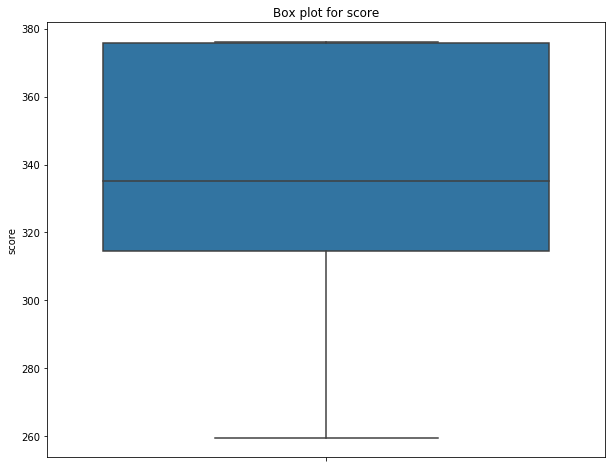

In [ ]:
#  box plot for the score card for the whole dataset
plt.figure(figsize=(10,8))

plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

No outliers detected in the above graph, scorecard seems to be in good shape

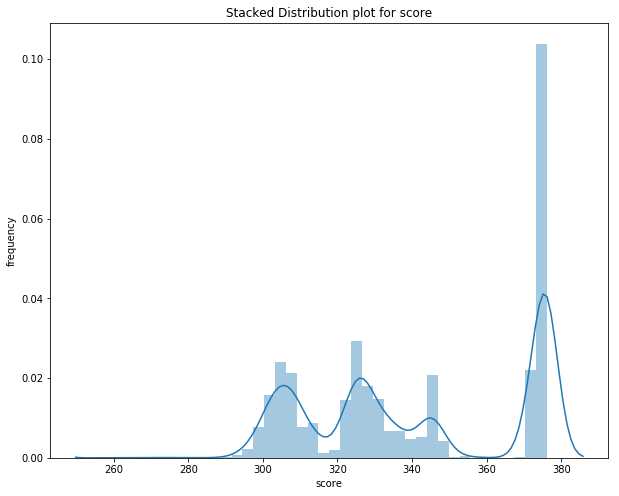

In [ ]:
# stack plot for the whole dataset
plt.figure(figsize=(10,8))
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard['score'])
plt.ylabel('frequency')
plt.show()

Majority of the customers falls in the range of 290 to 350

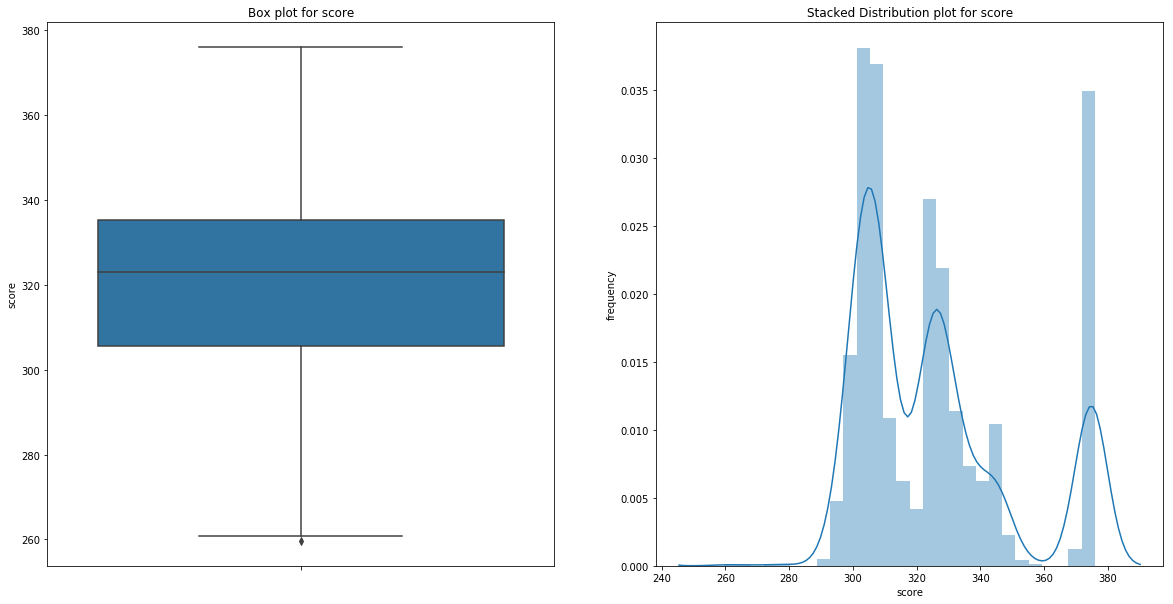

In [ ]:
## plotting  for dafault cases
plt.figure(figsize=(20,10))

scorecard_default = scorecard[scorecard["Performance Tag"] == 1]

plt.subplot(1, 2, 1)
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard_default)

plt.subplot(1, 2, 2)
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard_default['score'])
plt.ylabel('frequency')
plt.show()

Above graph shows that majority of the defaulters have score cards randing from from 290 to 350.

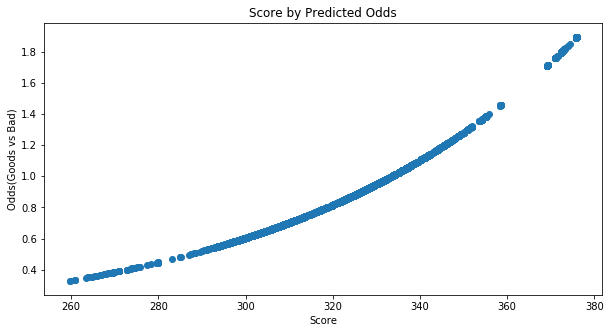

In [ ]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='odds',
            data=scorecard)

plt.title('Score by Predicted Odds')
plt.xlabel('Score')
plt.ylabel('Odds(Goods vs Bad)');

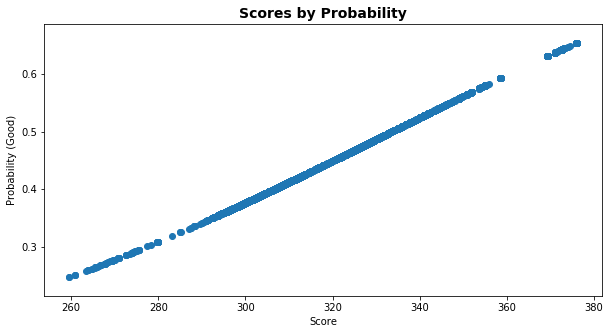

In [ ]:
# Plot Scores Against Probabilities
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='probs',
            data=scorecard)

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

# Scorecard for rejected applicants

In [ ]:
# lets build the scorecard from the co-efficients by multiplying the co-efficients of the features to their respective woe values

scorecard_rejected = rejected_master_woe[model_params_idx.index].apply(lambda x: x*model_params_idx['coeff'] ,axis=1)
scorecard_rejected.head()

Age  Gender  Marital Status  No of dependents  Income  Education  \
0 -0.0     0.0            -0.0              -0.0    -0.0       -0.0   
1  0.0    -0.0             0.0               0.0    -0.0       -0.0   
2  0.0     0.0             0.0              -0.0    -0.0        0.0   
3 -0.0     0.0             0.0              -0.0    -0.0       -0.0   
4  0.0    -0.0             0.0               0.0    -0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.001746   
1        -0.0                0.0                          -0.000133   
2        -0.0                0.0                           0.000613   
3         0.0                0.0                           0.000613   
4         0.0                0.0                           0.000613   

   No of months in current company             ...              \
0                             -0.0             ...               
1                              0.0             ...               
2                              0.0             ...               
3                              0.0             ...               
4                              0.0             ...               

   No of trades opened in last 6 months  \
0                                  -0.0   
1                                  -0.0   
2                                  -0.0   
3                                  -0.0   
4                                  -0.0   

   No of trades opened in last 12 months  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   No of PL trades opened in last 6 months  \
0                                     -0.0   
1                                     -0.0   
2                                     -0.0   
3                                     -0.0   
4                                     -0.0   

   No of PL trades opened in last 12 months  \
0                                  0.084194   
1                                  0.266948   
2                                  0.266948   
3                                  0.266948   
4                                  0.220090   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                           0.012198                
1                                           0.031316                
2                                          -0.040542                
3                                           0.024195                
4                                           0.031316                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.002559                 
1                                          -0.003199                 
2                                          -0.001919                 
3                                          -0.003199                 
4                                          -0.003839                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                        -0.0                 -0.0                -0.0   
1                        -0.0                 -0.0                -0.0   
2                        -0.0                 -0.0                -0.0   
3                        -0.0                 -0.0                -0.0   
4                        -0.0                 -0.0                -0.0   

   Presence of open auto loan  
0                        -0.0  
1                        -0.0  
2                        -0.0  
3                        -0.0  
4                         0.0  

[5 rows x 27 columns]

In [ ]:
# Get Logit Values
scorecard_rejected['logit'] = scorecard_rejected[list(scorecard_rejected.columns)].sum(axis=1) + intercept

In [ ]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard_rejected['odds'] = np.exp(-scorecard_rejected['logit'])
scorecard_rejected['probs'] = scorecard_rejected['odds'] / (scorecard_rejected['odds'] + 1)

In [ ]:
# Score
scorecard_rejected['score'] = offset - (factor * scorecard_rejected['logit'])

In [ ]:
# Add Back Performance_Tag
scorecard_rejected['Performance Tag'] = rejected_master_woe['Performance Tag']
scorecard_rejected.head()

Age  Gender  Marital Status  No of dependents  Income  Education  \
0 -0.0     0.0            -0.0              -0.0    -0.0       -0.0   
1  0.0    -0.0             0.0               0.0    -0.0       -0.0   
2  0.0     0.0             0.0              -0.0    -0.0        0.0   
3 -0.0     0.0             0.0              -0.0    -0.0       -0.0   
4  0.0    -0.0             0.0               0.0    -0.0        0.0   

   Profession  Type of residence  No of months in current residence  \
0         0.0                0.0                          -0.001746   
1        -0.0                0.0                          -0.000133   
2        -0.0                0.0                           0.000613   
3         0.0                0.0                           0.000613   
4         0.0                0.0                           0.000613   

   No of months in current company       ...         \
0                             -0.0       ...          
1                              0.0       ...          
2                              0.0       ...          
3                              0.0       ...          
4                              0.0       ...          

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                          -0.002559                 
1                                          -0.003199                 
2                                          -0.001919                 
3                                          -0.003199                 
4                                          -0.003839                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                        -0.0                 -0.0                -0.0   
1                        -0.0                 -0.0                -0.0   
2                        -0.0                 -0.0                -0.0   
3                        -0.0                 -0.0                -0.0   
4                        -0.0                 -0.0                -0.0   

   Presence of open auto loan     logit      odds     probs       score  \
0                        -0.0  0.297161  0.742924  0.426252  313.818473   
1                        -0.0  0.437812  0.645447  0.392262  304.473851   
2                        -0.0  0.546873  0.578757  0.366590  297.227986   
3                        -0.0  0.581284  0.559180  0.358637  294.941759   
4                         0.0  0.540899  0.582225  0.367978  297.624876   

   Performance Tag  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  

[5 rows x 32 columns]

In [ ]:
## checking distribution of scores
print(scorecard_rejected.score.min())
print(scorecard_rejected.score.max())
print(scorecard_rejected.score.mean())
print(scorecard_rejected.score.median())

262.2871388296703
354.43176395182155
303.04790894901436
302.2601325795436


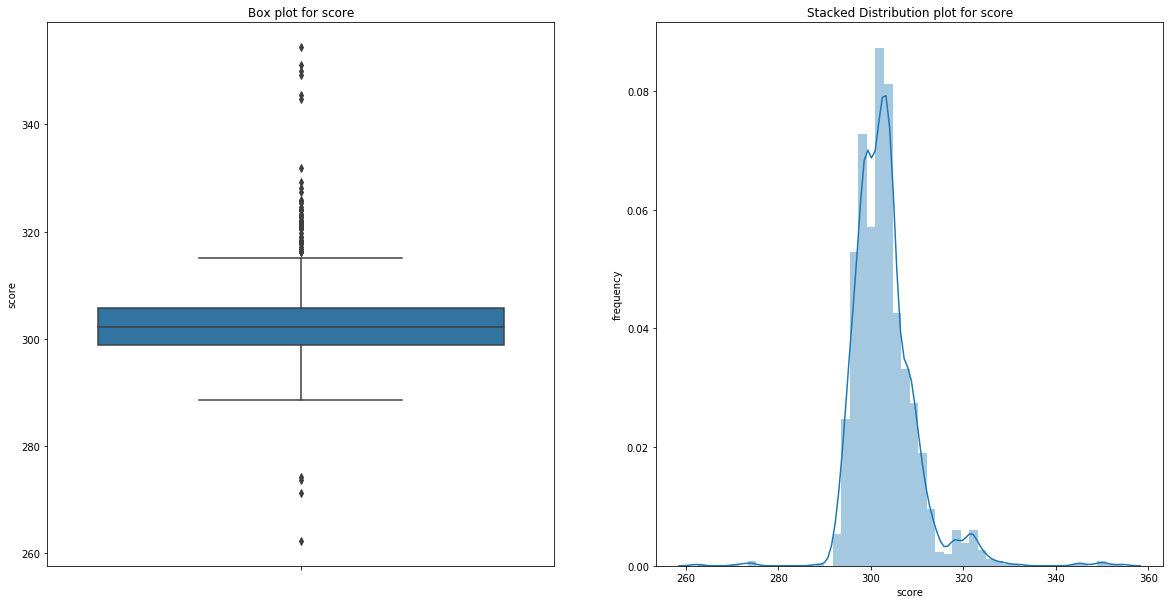

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard_rejected)

plt.subplot(1, 2, 2)
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard_rejected['score'])
plt.ylabel('frequency')
plt.show()

Most of the rejected applicants had score card in a range of 295 to 335

In [ ]:
# lets keep the cutoff as 310
(len(scorecard_rejected[scorecard_rejected['score'] < 310])/len(scorecard_rejected))*100

89.05263157894737

If cutoff is kept at 310, almost 89% of the defaulters would not get the credit card because only 11% of the applicants have score of more than 310

In [ ]:
# lets check the side effect of this cutoff by analysing the approved customers from the master scorecard
(len(scorecard[((scorecard['score'] < 310) & (scorecard["Performance Tag"] == 0))])/len(scorecard[scorecard["Performance Tag"]==0]))*100

21.034070531978482

Cut off of 310 impacts 21% of the approved customers because 21% of the customers who were granted credit card have score of less than 310.

# Recommended Cut off : 310


## Remarks
    1.Customers with a score less than 310 would not be granted credit card.    
    2.Cutoff of 310 correctly identifies almost 89% of the bad customers.     
    3.If we consider the scorecard built for the master dataset, then almost 21% of the good customers are not going to get      the credit card.    
    4. If we reduce the cutoff from 310 to a lower number then it will defeat the purpose of doing this exercise of identifying the bad cusomers.    
    5. Though, if Bank is ready to take the risk they may reduce the cutoff by 5 points, keeping it to 305. A cutoff of 305     
       would correctly identify 76% of the bad customers, and will impact around 2.5% good customers.

# Financial Benefits of the model

As mentioned in the problem statement, in the past few years CredX experienced an increase in credit loss.
So, the main objective of doing this whole exercise was to mitigate this credit risk by acquiring the right customers.

Another important point is, Bank does not only loose money by giving credit card to the bad customers, it may also loose
business(eventually money) by not giving credit cart to the good customers. So, the Machine Learning model should have strong predictive power to discriminate between good and the bad customers. Model should be be to correctly identify majority of the bad customers, at the same time, it should also ensure that good customers are not denied the credit card.

A good model will have following benefits:

    1.Saves manual efforts of assessing each and every application as the model can process hundreds of applications in no time.
    2.Prevents manual error as the whole process is automated.
    3.No chance of underwriters taking bribes to approve an application, also model would not be biased towards any cast,regligion etc.
    
Total number of Customers = 71292 (remember we removed three duplicate reports)

Approved Customers = 69867 (there were 1425 records with null values for performance tag, 71292-1425 = 69867)

Default Customers = 2947 (Customers with Performance Tag 1)

Lets make some assumptions in order to calculate the actual profit and loss :

1) Customer Acquisition Cost (including paper work, phone calls cost, service tax etc.) - 50 USD 2) Credit Card Limit = 49,950 USD (taking odd number so that the money at risk is a round figure) 3) Money at Risk per customer = 49,950 + 50 = 50,000 USD

Total Money at Risk (Defaulted Customers) = 50,000 × 2947 = 14,73,50,000‬ USD

Money Machine Model can save:
The best Model we built has a recall of 74%, hence it can save 74% of 14,73,50,000‬ USD:

### Money Saved = (14,73,50,000‬ * 74)/100 = 10,90,39,000‬ USD
### Money Lost = 14,73,50,000‬ USD - 10,90,39,000‬ USD = 3,83,11,000 USD

### Model built is saving almost 35% of the Loss.